In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
from matplotlib import pyplot as plt
import seaborn as sns
# sns.set(rc={'figure.figsize':(11.7,8.27)})

import gzip

In [2]:
acc_w_totals = pd.read_csv('../../accepted_2007_to_2018Q4.csv.gz',
                           compression='gzip',
                           header=0,
                           sep=',',
                           quotechar='"')
acc_w_totals

C:\Users\tdcho\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


id  member_id  \
0                                                68407277        NaN   
1                                                68355089        NaN   
2                                                68341763        NaN   
3                                                66310712        NaN   
4                                                68476807        NaN   
...                                                   ...        ...   
2260696                                          88985880        NaN   
2260697                                          88224441        NaN   
2260698                                          88215728        NaN   
2260699  Total amount funded in policy code 1: 1465324575        NaN   
2260700   Total amount funded in policy code 2: 521953170        NaN   

         loan_amnt  funded_amnt  funded_amnt_inv        term  int_rate  \
0           3600.0       3600.0           3600.0   36 months     13.99   
1          24700.0      24700.0          24700.0   36 months     11.99   
2          20000.0      20000.0          20000.0   60 months     10.78   
3          35000.0      35000.0          35000.0   60 months     14.85   
4          10400.0      10400.0          10400.0   60 months     22.45   
...            ...          ...              ...         ...       ...   
2260696    40000.0      40000.0          40000.0   60 months     10.49   
2260697    24000.0      24000.0          24000.0   60 months     14.49   
2260698    14000.0      14000.0          14000.0   60 months     14.49   
2260699        NaN          NaN              NaN         NaN       NaN   
2260700        NaN          NaN              NaN         NaN       NaN   

         installment grade sub_grade                    emp_title emp_length  \
0             123.03     C        C4                      leadman  10+ years   
1             820.28     C        C1                     Engineer  10+ years   
2             432.66     B        B4                 truck driver  10+ years   
3             829.90     C        C5  Information Systems Officer  10+ years   
4             289.91     F        F1          Contract Specialist    3 years   
...              ...   ...       ...                          ...        ...   
2260696       859.56     B        B3              Vice President     9 years   
2260697       564.56     C        C4              Program Manager    6 years   
2260698       329.33     C        C4  Customer Service Technician  10+ years   
2260699          NaN   NaN       NaN                          NaN        NaN   
2260700          NaN   NaN       NaN                          NaN        NaN   

        home_ownership  annual_inc verification_status   issue_d  loan_status  \
0             MORTGAGE     55000.0        Not Verified  Dec-2015   Fully Paid   
1             MORTGAGE     65000.0        Not Verified  Dec-2015   Fully Paid   
2             MORTGAGE     63000.0        Not Verified  Dec-2015   Fully Paid   
3             MORTGAGE    110000.0     Source Verified  Dec-2015      Current   
4             MORTGAGE    104433.0     Source Verified  Dec-2015   Fully Paid   
...                ...         ...                 ...       ...          ...   
2260696       MORTGAGE    227000.0            Verified  Oct-2016      Current   
2260697           RENT    110000.0        Not Verified  Oct-2016  Charged Off   
2260698       MORTGAGE     95000.0            Verified  Oct-2016      Current   
2260699            NaN         NaN                 NaN       NaN          NaN   
2260700            NaN         NaN                 NaN       NaN          NaN   

        pymnt_plan                                                url desc  \
0                n  https://lendingclub.com/browse/loanDetail.acti...  NaN   
1                n  https://lendingclub.com/browse/loanDetail.acti...  NaN   
2                n  https://lendingclub.com/browse/loanDetail.acti...  NaN   
3                n  https://lendingclub.com/browse/loan

In [3]:
# we will remove those rows
rows_to_drop_id = list(acc_w_totals[acc_w_totals['id'].str.contains('Total|Loans', na=False)].index)
print('We will be dropping', len(rows_to_drop_id), 'rows')
print('\n')

acc = acc_w_totals.drop(rows_to_drop_id)
acc

We will be dropping 33 rows




id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0        68407277        NaN     3600.0       3600.0           3600.0   
1        68355089        NaN    24700.0      24700.0          24700.0   
2        68341763        NaN    20000.0      20000.0          20000.0   
3        66310712        NaN    35000.0      35000.0          35000.0   
4        68476807        NaN    10400.0      10400.0          10400.0   
...           ...        ...        ...          ...              ...   
2260694  89885898        NaN    24000.0      24000.0          24000.0   
2260695  88977788        NaN    24000.0      24000.0          24000.0   
2260696  88985880        NaN    40000.0      40000.0          40000.0   
2260697  88224441        NaN    24000.0      24000.0          24000.0   
2260698  88215728        NaN    14000.0      14000.0          14000.0   

               term  int_rate  installment grade sub_grade  \
0         36 months     13.99       123.03     C        C4   
1         36 months     11.99       820.28     C        C1   
2         60 months     10.78       432.66     B        B4   
3         60 months     14.85       829.90     C        C5   
4         60 months     22.45       289.91     F        F1   
...             ...       ...          ...   ...       ...   
2260694   60 months     12.79       543.50     C        C1   
2260695   60 months     10.49       515.74     B        B3   
2260696   60 months     10.49       859.56     B        B3   
2260697   60 months     14.49       564.56     C        C4   
2260698   60 months     14.49       329.33     C        C4   

                           emp_title emp_length home_ownership  annual_inc  \
0                            leadman  10+ years       MORTGAGE     55000.0   
1                           Engineer  10+ years       MORTGAGE     65000.0   
2                       truck driver  10+ years       MORTGAGE     63000.0   
3        Information Systems Officer  10+ years       MORTGAGE    110000.0   
4                Contract Specialist    3 years       MORTGAGE    104433.0   
...                              ...        ...            ...         ...   
2260694                Unit Operator    7 years       MORTGAGE     95000.0   
2260695       Database Administrator  10+ years       MORTGAGE    108000.0   
2260696              Vice President     9 years       MORTGAGE    227000.0   
2260697              Program Manager    6 years           RENT    110000.0   
2260698  Customer Service Technician  10+ years       MORTGAGE     95000.0   

        verification_status   issue_d  loan_status pymnt_plan  \
0              Not Verified  Dec-2015   Fully Paid          n   
1              Not Verified  Dec-2015   Fully Paid          n   
2              Not Verified  Dec-2015   Fully Paid          n   
3           Source Verified  Dec-2015      Current          n   
4           Source Verified  Dec-2015   Fully Paid          n   
...                     ...       ...          ...        ...   
2260694     Source Verified  Oct-2016      Current          n   
2260695        Not Verified  Oct-2016      Current          n   
2260696            Verified  Oct-2016      Current          n   
2260697        Not Verified  Oct-2016  Charged Off          n   
2260698            Verified  Oct-2016      Current          n   

                                                       url desc  \
0        https://lendingclub.com/browse/loanDetail.acti...  NaN   
1        https://lendingclub.com/browse/loanDetail.acti...  NaN   
2        https://lendingclub.com/browse/loanDetail.acti...  NaN   
3        https://lendingclub.com/browse/loanDetail.acti...  NaN   
4        https://lendingclub.com/browse/loanDetail.acti...  NaN   
...                                                    ...  ...   
2260694  https://lendingclub.com/browse/loanDetail.acti...  NaN   
2260695  https://lendingclub.com/browse/loanDetail.acti...  NaN   
2260696  https://lendingclub.com/browse/loanDetail.acti...  NaN   
22606

In [4]:
acc.describe()

member_id     loan_amnt   funded_amnt  funded_amnt_inv      int_rate  \
count        0.0  2.260668e+06  2.260668e+06     2.260668e+06  2.260668e+06   
mean         NaN  1.504693e+04  1.504166e+04     1.502344e+04  1.309283e+01   
std          NaN  9.190245e+03  9.188413e+03     9.192332e+03  4.832138e+00   
min          NaN  5.000000e+02  5.000000e+02     0.000000e+00  5.310000e+00   
25%          NaN  8.000000e+03  8.000000e+03     8.000000e+03  9.490000e+00   
50%          NaN  1.290000e+04  1.287500e+04     1.280000e+04  1.262000e+01   
75%          NaN  2.000000e+04  2.000000e+04     2.000000e+04  1.599000e+01   
max          NaN  4.000000e+04  4.000000e+04     4.000000e+04  3.099000e+01   

        installment    annual_inc           dti   delinq_2yrs  fico_range_low  \
count  2.260668e+06  2.260664e+06  2.258957e+06  2.260639e+06    2.260668e+06   
mean   4.458068e+02  7.799243e+04  1.882420e+01  3.068792e-01    6.985882e+02   
std    2.671735e+02  1.126962e+05  1.418333e+01  8.672303e-01    3.301038e+01   
min    4.930000e+00  0.000000e+00 -1.000000e+00  0.000000e+00    6.100000e+02   
25%    2.516500e+02  4.600000e+04  1.189000e+01  0.000000e+00    6.750000e+02   
50%    3.779900e+02  6.500000e+04  1.784000e+01  0.000000e+00    6.900000e+02   
75%    5.933200e+02  9.300000e+04  2.449000e+01  0.000000e+00    7.150000e+02   
max    1.719830e+03  1.100000e+08  9.990000e+02  5.800000e+01    8.450000e+02   

       fico_range_high  inq_last_6mths  mths_since_last_delinq  \
count     2.260668e+06    2.260638e+06            1.102166e+06   
mean      7.025884e+02    5.768354e-01            3.454092e+01   
std       3.301124e+01    8.859632e-01            2.190047e+01   
min       6.140000e+02    0.000000e+00            0.000000e+00   
25%       6.790000e+02    0.000000e+00            1.600000e+01   
50%       6.940000e+02    0.000000e+00            3.100000e+01   
75%       7.190000e+02    1.000000e+00            5.000000e+01   
max       8.500000e+02    3.300000e+01            2.260000e+02   

       mths_since_last_record      open_acc       pub_rec     revol_bal  \
count           359156.000000  2.260639e+06  2.260639e+06  2.260668e+06   
mean                72.312842  1.161240e+01  1.975278e-01  1.665846e+04   
std                 26.464094  5.640861e+00  5.705150e-01  2.294831e+04   
min                  0.000000  0.000000e+00  0.000000e+00  0.000000e+00   
25%                 55.000000  8.000000e+00  0.000000e+00  5.950000e+03   
50%                 74.000000  1.100000e+01  0.000000e+00  1.132400e+04   
75%                 92.000000  1.400000e+01  0.000000e+00  2.024600e+04   
max                129.000000  1.010000e+02  8.600000e+01  2.904836e+06   

         revol_util     total_acc     out_prncp  out_prncp_inv   total_pymnt  \
count  2.258866e+06  2.260639e+06  2.260668e+06   2.260668e+06  2.260668e+06   
mean   5.033770e+01  2.416255e+01  4.206891e+03   4.205965e+03  1.208256e+04   
std    2.471307e+01  1.198753e+01  7.343239e+03   7.342333e+03  9.901383e+03   
min    0.000000e+00  1.000000e+00  0.000000e+00   0.000000e+00  0.000000e+00   
25%    3.150000e+01  1.500000e+01  0.000000e+00   0.000000e+00  4.546458e+03   
50%    5.030000e+01  2.200000e+01  0.000000e+00   0.000000e+00  9.329720e+03   
75%    6.940000e+01  3.100000e+01  6.149940e+03   6.146310e+03  1.694087e+04   
max    8.923000e+02  1.760000e+02  4.000000e+04   4.000000e+04  6.329688e+04   

       total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
count     2.260668e+06     2.260668e+06   2.260668e+06        2.260668e+06   
mean      1.206439e+04     9.505772e+03   2.431388e+03        1.518453e+00   
std       9.896992e+03     8.321852e+03   2.679738e+03        1.184159e+01   
min       0.000000e+00     0.000000e+00   0.000000e+00       -9.500000e-09   
25%       4.531800e+03     3.000000e+03   7.281875e+02        0.000000e+00   
50%       9.309675e+03     7.000000e+03   1.525940e+03        0.000000e+00   
75%       1.691671e+04     

### Checking if last_credit_pull_d is after or before the issue_d

In [5]:
acc['issue_d_dt'] = pd.DatetimeIndex(acc['issue_d'])
acc['last_credit_pull_d_dt'] = pd.DatetimeIndex(acc['issue_d'])

acc[['issue_d_dt', 'last_credit_pull_d_dt']]

issue_d_dt last_credit_pull_d_dt
0       2015-12-01            2015-12-01
1       2015-12-01            2015-12-01
2       2015-12-01            2015-12-01
3       2015-12-01            2015-12-01
4       2015-12-01            2015-12-01
...            ...                   ...
2260694 2016-10-01            2016-10-01
2260695 2016-10-01            2016-10-01
2260696 2016-10-01            2016-10-01
2260697 2016-10-01            2016-10-01
2260698 2016-10-01            2016-10-01

[2260668 rows x 2 columns]

In [6]:
acc[acc['issue_d_dt']>acc['last_credit_pull_d_dt']][['issue_d_dt', 'last_credit_pull_d_dt']]

Empty DataFrame
Columns: [issue_d_dt, last_credit_pull_d_dt]
Index: []

### Checking if last_pymnt_d is after or before the issue_d

In [7]:
acc['last_pymnt_d_dt'] = pd.DatetimeIndex(acc['last_pymnt_d'])

acc[acc['issue_d_dt']>=acc['last_pymnt_d_dt']][['issue_d_dt', 'last_pymnt_d_dt']]

issue_d_dt last_pymnt_d_dt
9697    2015-12-01      2015-12-01
9751    2015-12-01      2015-12-01
10598   2015-12-01      2015-12-01
11137   2015-12-01      2015-12-01
11160   2015-12-01      2015-12-01
...            ...             ...
2259921 2016-10-01      2016-10-01
2260012 2016-10-01      2016-10-01
2260198 2016-10-01      2016-10-01
2260476 2016-10-01      2016-10-01
2260645 2016-10-01      2016-10-01

[8965 rows x 2 columns]

### Previewing the grades associated to see if there is any pattern

<AxesSubplot:xlabel='grade'>

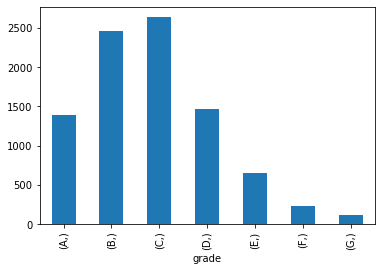

In [8]:
acc[acc['issue_d_dt']>=acc['last_pymnt_d_dt']][['grade']].value_counts().sort_index().plot(kind='bar')

### Checking if there is a diff between loan_amnt and funded_amnt

In [9]:
acc[acc['loan_amnt']>=acc['funded_amnt']][['loan_amnt', 'funded_amnt']]

loan_amnt  funded_amnt
0           3600.0       3600.0
1          24700.0      24700.0
2          20000.0      20000.0
3          35000.0      35000.0
4          10400.0      10400.0
...            ...          ...
2260694    24000.0      24000.0
2260695    24000.0      24000.0
2260696    40000.0      40000.0
2260697    24000.0      24000.0
2260698    14000.0      14000.0

[2260668 rows x 2 columns]

In [10]:
acc[acc['loan_amnt']>acc['funded_amnt']][['loan_amnt', 'funded_amnt']]

loan_amnt  funded_amnt
684043     18000.0      10000.0
684121     20000.0      10000.0
684370     20000.0      10000.0
1611940    17500.0       8950.0
1611945    12500.0       8925.0
...            ...          ...
1939366    20000.0      13675.0
1939368    17500.0      16800.0
1939369    35000.0      22550.0
1939372    20000.0      12675.0
1939378    12000.0       7775.0

[2065 rows x 2 columns]

### diff between out_prncp vs funded_amnt

In [11]:
acc[acc['out_prncp']>=acc['funded_amnt']][['out_prncp', 'funded_amnt']]

out_prncp  funded_amnt
1353978    30000.0      30000.0
1354296    20975.0      20975.0
1355614    14000.0      14000.0
1355836    20000.0      20000.0
1355961    32000.0      32000.0
...            ...          ...
1433698    40000.0      40000.0
1434953     8000.0       8000.0
1445045    15000.0      15000.0
1448644     7800.0       7800.0
1480574    22000.0      22000.0

[105 rows x 2 columns]

In [12]:
acc[acc['out_prncp']<acc['funded_amnt']][['out_prncp', 'funded_amnt']]

out_prncp  funded_amnt
0             0.00       3600.0
1             0.00      24700.0
2             0.00      20000.0
3         15897.65      35000.0
4             0.00      10400.0
...            ...          ...
2260694   14287.39      24000.0
2260695   13951.42      24000.0
2260696   23252.59      40000.0
2260697       0.00      24000.0
2260698    8456.12      14000.0

[2260563 rows x 2 columns]

In [13]:
acc[acc['pymnt_plan']=='y'][['hardship_flag']]

hardship_flag
6609                Y
12455               Y
17788               Y
41395               Y
43594               Y
...               ...
2257080             Y
2257193             Y
2258227             Y
2258892             Y
2260426             Y

[620 rows x 1 columns]

# Question 1

# MUST REMOVE DATE AND DO GROUPBY WITH DATES

In [14]:
acc['issue_d']

0          Dec-2015
1          Dec-2015
2          Dec-2015
3          Dec-2015
4          Dec-2015
             ...   
2260694    Oct-2016
2260695    Oct-2016
2260696    Oct-2016
2260697    Oct-2016
2260698    Oct-2016
Name: issue_d, Length: 2260668, dtype: object

In [15]:
acc['year'] = pd.DatetimeIndex(acc['issue_d']).year
acc['year']

0          2015
1          2015
2          2015
3          2015
4          2015
           ... 
2260694    2016
2260695    2016
2260696    2016
2260697    2016
2260698    2016
Name: year, Length: 2260668, dtype: int64

In [16]:
acc[acc['year']==2015]

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0       68407277        NaN     3600.0       3600.0           3600.0   
1       68355089        NaN    24700.0      24700.0          24700.0   
2       68341763        NaN    20000.0      20000.0          20000.0   
3       66310712        NaN    35000.0      35000.0          35000.0   
4       68476807        NaN    10400.0      10400.0          10400.0   
...          ...        ...        ...          ...              ...   
421090  36371250        NaN    10000.0      10000.0          10000.0   
421091  36441262        NaN    24000.0      24000.0          24000.0   
421092  36271333        NaN    13000.0      13000.0          13000.0   
421093  36490806        NaN    12000.0      12000.0          12000.0   
421094  36271262        NaN    20000.0      20000.0          20000.0   

              term  int_rate  installment grade sub_grade  \
0        36 months     13.99       123.03     C        C4   
1        36 months     11.99       820.28     C        C1   
2        60 months     10.78       432.66     B        B4   
3        60 months     14.85       829.90     C        C5   
4        60 months     22.45       289.91     F        F1   
...            ...       ...          ...   ...       ...   
421090   36 months     11.99       332.10     B        B5   
421091   36 months     11.99       797.03     B        B5   
421092   60 months     15.99       316.07     D        D2   
421093   60 months     19.99       317.86     E        E3   
421094   36 months     11.99       664.20     B        B5   

                              emp_title emp_length home_ownership  annual_inc  \
0                               leadman  10+ years       MORTGAGE     55000.0   
1                              Engineer  10+ years       MORTGAGE     65000.0   
2                          truck driver  10+ years       MORTGAGE     63000.0   
3           Information Systems Officer  10+ years       MORTGAGE    110000.0   
4                   Contract Specialist    3 years       MORTGAGE    104433.0   
...                                 ...        ...            ...         ...   
421090                 Office Assistant    8 years           RENT     31000.0   
421091          Director of Maintenance  10+ years       MORTGAGE     79000.0   
421092         Radiologist Technologist    5 years           RENT     35000.0   
421093                          Painter     1 year           RENT     64400.0   
421094  Manager Hotel Operations Oasis   10+ years           RENT    100000.0   

       verification_status   issue_d  loan_status pymnt_plan  \
0             Not Verified  Dec-2015   Fully Paid          n   
1             Not Verified  Dec-2015   Fully Paid          n   
2             Not Verified  Dec-2015   Fully Paid          n   
3          Source Verified  Dec-2015      Current          n   
4          Source Verified  Dec-2015   Fully Paid          n   
...                    ...       ...          ...        ...   
421090            Verified  Jan-2015   Fully Paid          n   
421091            Verified  Jan-2015   Fully Paid          n   
421092            Verified  Jan-2015  Charged Off          n   
421093     Source Verified  Jan-2015  Charged Off          n   
421094            Verified  Jan-2015   Fully Paid          n   

                                                      url desc  \
0       https://lendingclub.com/browse/loanDetail.acti...  NaN   
1       https://lendingclub.com/browse/loanDetail.acti...  NaN   
2       https://lendingclub.com/browse/loanDetail.acti...  NaN   
3       https://lendingclub.com/browse/loanDetail.acti...  NaN   
4       https://lendingclub.com/browse/loanDetail.acti...  NaN   
...                                                   ...  ...   
421090  https://lendingclub.com/browse/loanDetail.acti...  NaN   
421091  https://lendingclub.com/browse/loanDetail.acti...  NaN   
421092  https://lendingclub.com/browse/loanDetail.acti...  NaN   
421093  https:

### Bullet 1

## Year vs Count of Loan Amount

2007


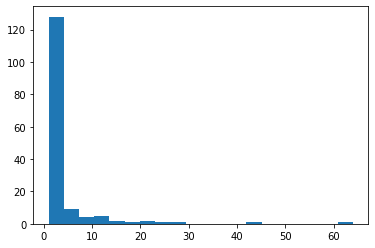

********************
2008


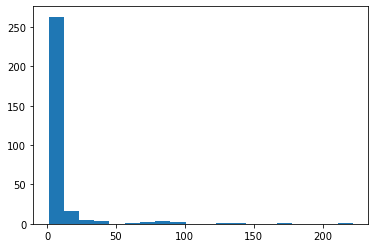

********************
2009


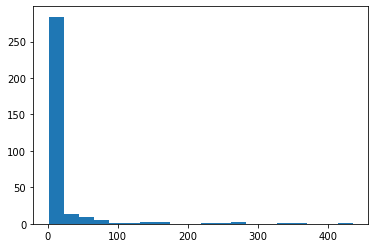

********************
2010


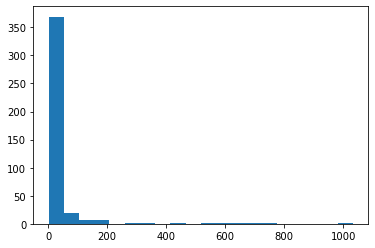

********************
2011


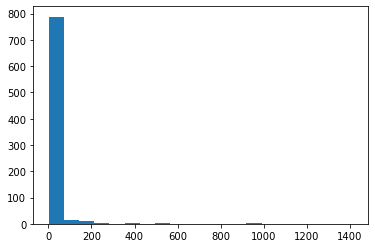

********************
2012


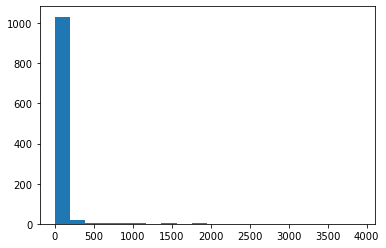

********************
2013


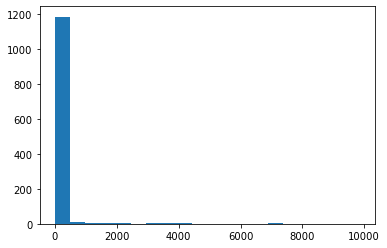

********************
2014


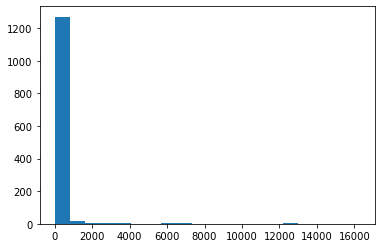

********************
2015


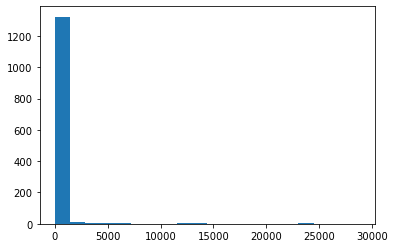

********************
2016


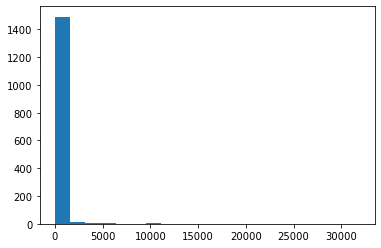

********************
2017


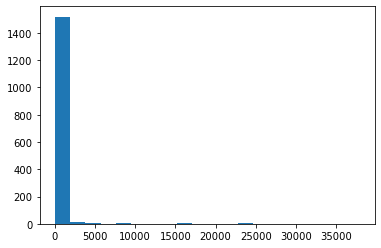

********************
2018


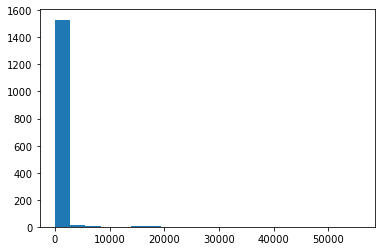

********************


In [17]:
acc_sortby_issueyear = acc.sort_values('year')
acc_issueyear_list = sorted(list(acc_sortby_issueyear['year'].unique()))
acc_purpose_list = sorted(list(acc_sortby_issueyear['purpose'].unique()))
acc_subgrade_list = sorted(list(acc_sortby_issueyear['sub_grade'].unique()))

for acc_year in acc_issueyear_list:
    print(acc_year)
    plt.figure()
    plt.hist(acc_sortby_issueyear[acc_sortby_issueyear['year']==acc_year]\
             ['loan_amnt'].value_counts(), bins=20)
    plt.show()
    print('*'*20)

## Year vs total sum of loans

<AxesSubplot:xlabel='year'>

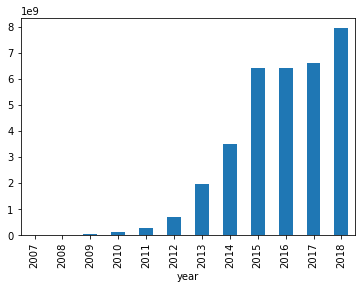

In [18]:
acc.groupby('year')['loan_amnt'].sum().plot.bar()

## Year vs count of loans

<AxesSubplot:>

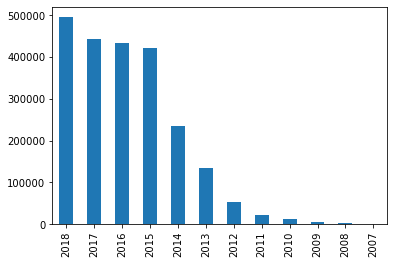

In [19]:
acc_sortby_issueyear['year'].value_counts().plot.bar()

### Bullet 2

In [20]:
acc['id'].count()

2260668

In [21]:
np.sum(acc['loan_amnt'])

34016115925.0

In [22]:
acc['purpose'].unique()

array(['debt_consolidation', 'small_business', 'home_improvement',
       'major_purchase', 'credit_card', 'other', 'house', 'vacation',
       'car', 'medical', 'moving', 'renewable_energy', 'wedding',
       'educational'], dtype=object)

### Bullet 3

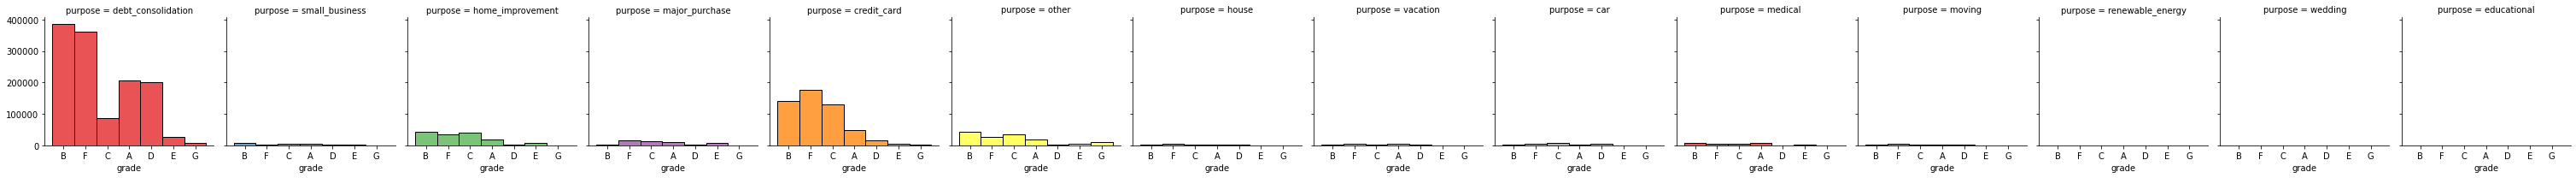

In [23]:
# these do not work that well bc the sizes are difficult to adjust

patterngrid = sns.FacetGrid(data=acc, 
                            col='purpose',
                            hue='purpose',
                            palette="Set1")
patterngrid.map(sns.histplot, 'grade', kde=False)

array([[<AxesSubplot:title={'center':'car'}>,
        <AxesSubplot:title={'center':'credit_card'}>,
        <AxesSubplot:title={'center':'debt_consolidation'}>,
        <AxesSubplot:title={'center':'educational'}>],
       [<AxesSubplot:title={'center':'home_improvement'}>,
        <AxesSubplot:title={'center':'house'}>,
        <AxesSubplot:title={'center':'major_purchase'}>,
        <AxesSubplot:title={'center':'medical'}>],
       [<AxesSubplot:title={'center':'moving'}>,
        <AxesSubplot:title={'center':'other'}>,
        <AxesSubplot:title={'center':'renewable_energy'}>,
        <AxesSubplot:title={'center':'small_business'}>],
       [<AxesSubplot:title={'center':'vacation'}>,
        <AxesSubplot:title={'center':'wedding'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

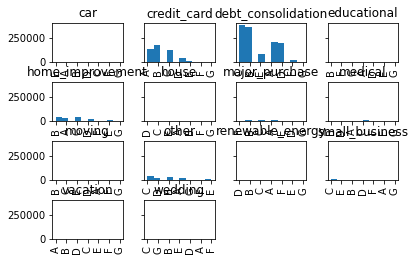

In [24]:
# these do not work that well bc the sizes are difficult to adjust

acc.grade.hist(by=acc.purpose, sharey=True)

In [25]:
acc.purpose.value_counts()

debt_consolidation    1277877
credit_card            516971
home_improvement       150457
other                  139440
major_purchase          50445
medical                 27488
small_business          24689
car                     24013
vacation                15525
moving                  15403
house                   14136
wedding                  2355
renewable_energy         1445
educational               424
Name: purpose, dtype: int64

# HOW TO SET ALPHABETICAL ORDER FOR THE GRAPH?

## Purpose vs Grade

car


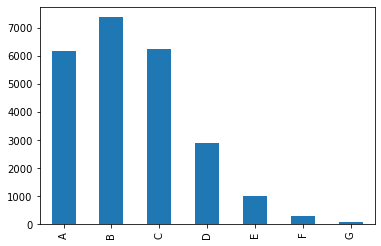

********************
credit_card


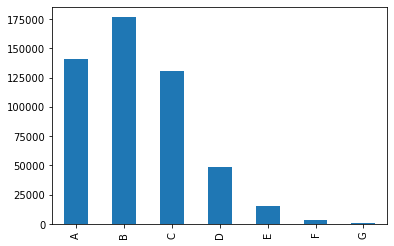

********************
debt_consolidation


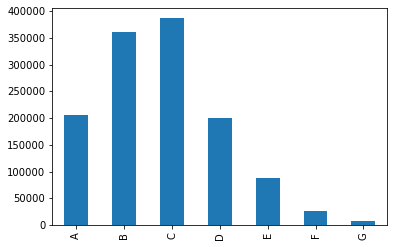

********************
educational


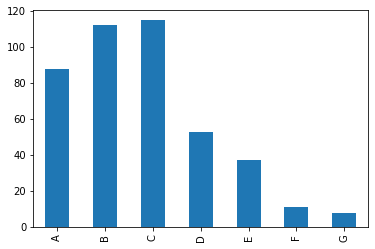

********************
home_improvement


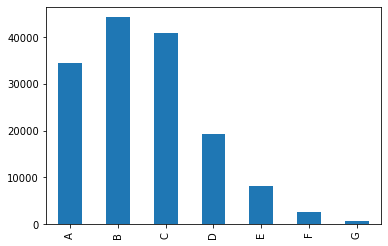

********************
house


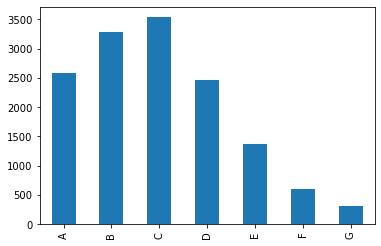

********************
major_purchase


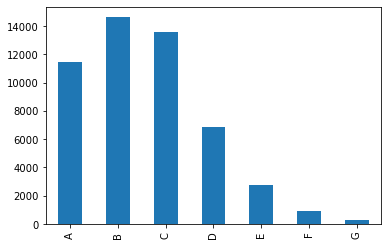

********************
medical


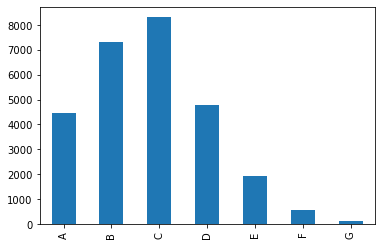

********************
moving


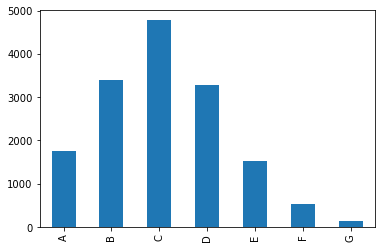

********************
other


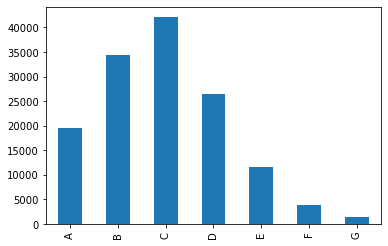

********************
renewable_energy


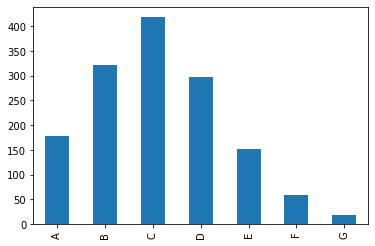

********************
small_business


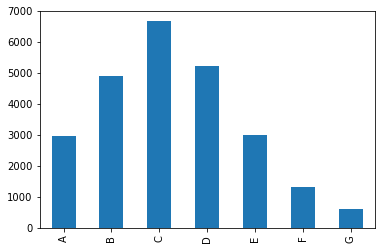

********************
vacation


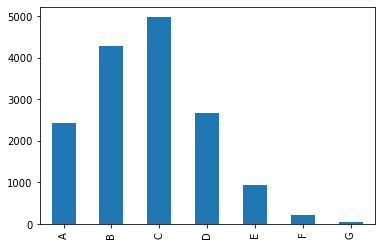

********************
wedding


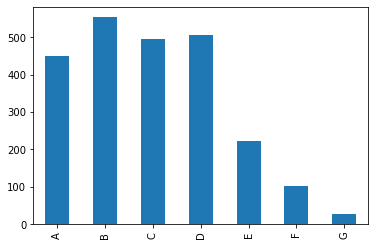

********************


In [26]:
acc_purpose_list = sorted(list(acc['purpose'].unique()))

for acc_purp in acc_purpose_list:
    print(acc_purp)
    plt.figure()
    acc[acc['purpose']==acc_purp]\
    ['grade'].value_counts().sort_index().plot(kind='bar')
    plt.show()
    print('*'*20)

## Purpose vs Subgrade

car


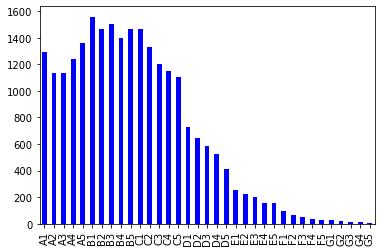

********************
credit_card


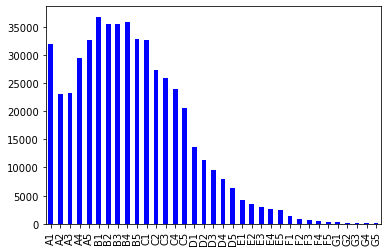

********************
debt_consolidation


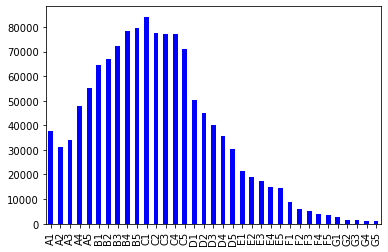

********************
educational


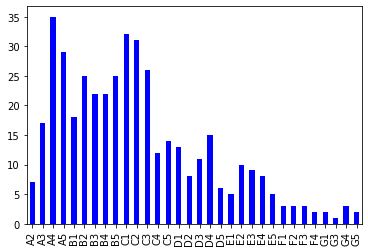

********************
home_improvement


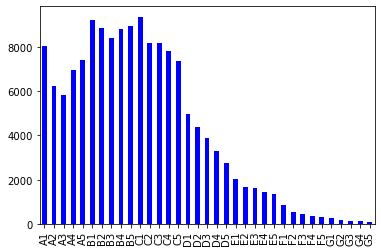

********************
house


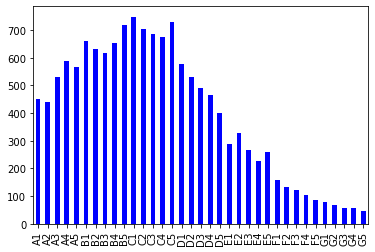

********************
major_purchase


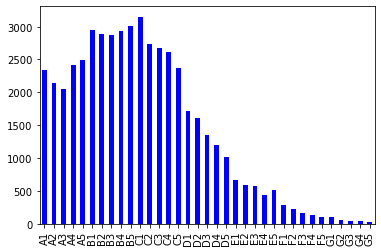

********************
medical


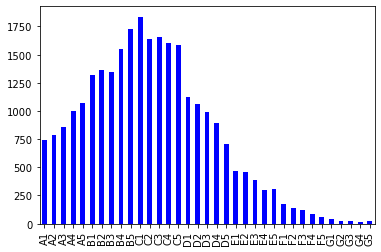

********************
moving


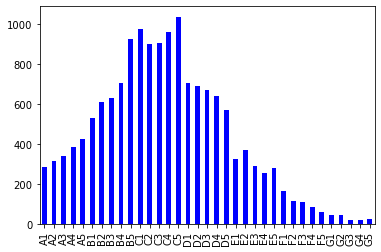

********************
other


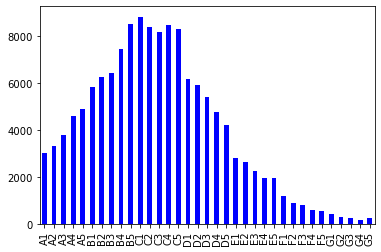

********************
renewable_energy


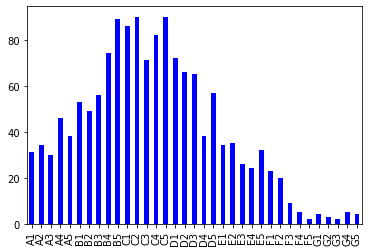

********************
small_business


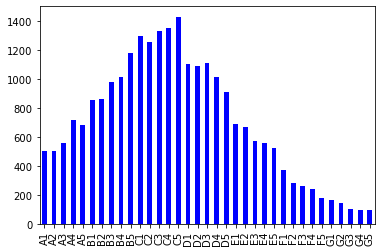

********************
vacation


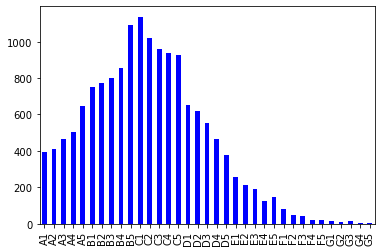

********************
wedding


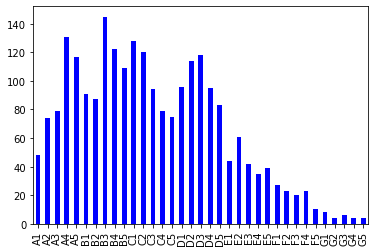

********************


In [27]:
acc_purpose_list = sorted(list(acc['purpose'].unique()))

for acc_purp in acc_purpose_list:
    print(acc_purp)
    plt.figure()
    acc[acc['purpose']==acc_purp]['sub_grade'].value_counts().sort_index().plot.bar(color='b')
    plt.show()
    print('*'*20)

In [28]:
acc['purpose'].value_counts(normalize=True)

debt_consolidation    0.565265
credit_card           0.228681
home_improvement      0.066554
other                 0.061681
major_purchase        0.022314
medical               0.012159
small_business        0.010921
car                   0.010622
vacation              0.006867
moving                0.006813
house                 0.006253
wedding               0.001042
renewable_energy      0.000639
educational           0.000188
Name: purpose, dtype: float64

In [29]:
acc[acc['grade']=='A']['purpose'].value_counts(normalize=True).sort_index()

car                   0.014239
credit_card           0.324479
debt_consolidation    0.475527
educational           0.000203
home_improvement      0.079736
house                 0.005956
major_purchase        0.026456
medical               0.010297
moving                0.004032
other                 0.045196
renewable_energy      0.000413
small_business        0.006843
vacation              0.005586
wedding               0.001037
Name: purpose, dtype: float64

A


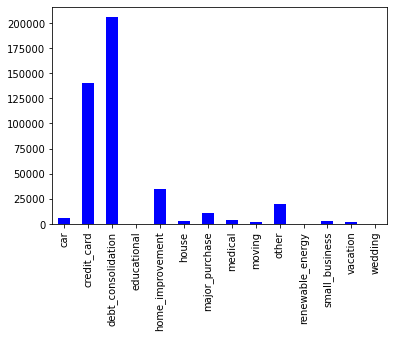

********************
B


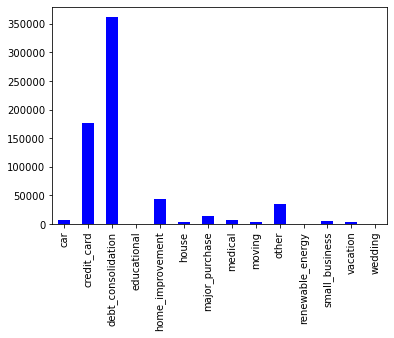

********************
C


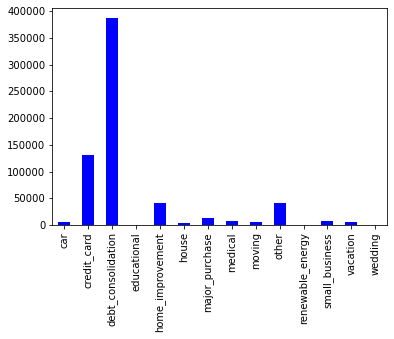

********************
D


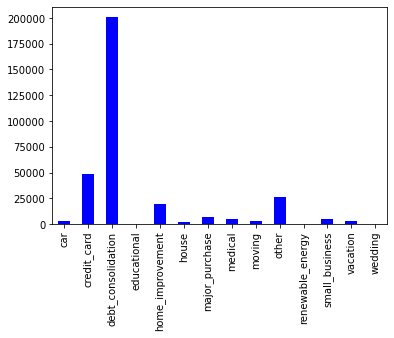

********************
E


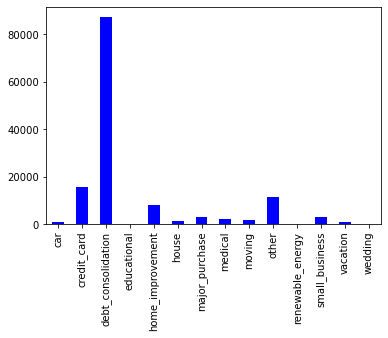

********************
F


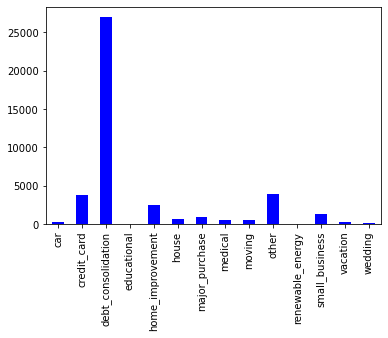

********************
G


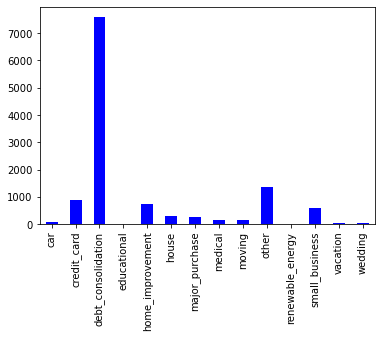

********************


In [30]:
acc_grade_list = sorted(list(acc['grade'].unique()))

for acc_grade in acc_grade_list:
    print(acc_grade)
    plt.figure()
    acc[acc['grade']==acc_grade]['purpose'].value_counts().sort_index().plot.bar(color='b')
    plt.show()
    print('*'*20)

A


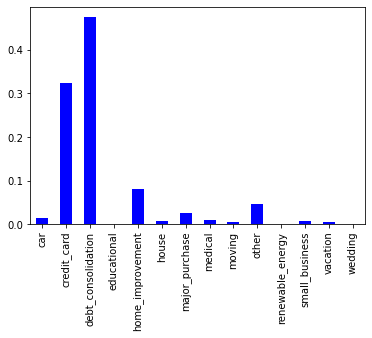

********************
B


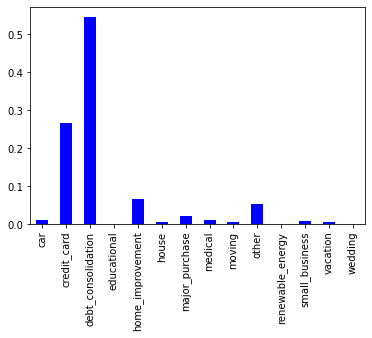

********************
C


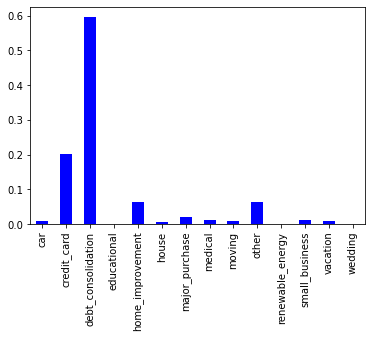

********************
D


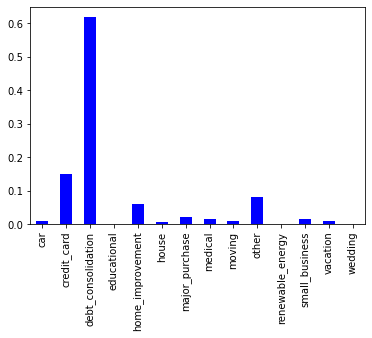

********************
E


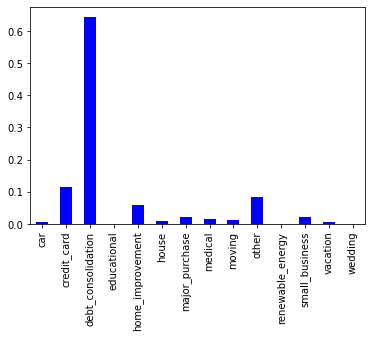

********************
F


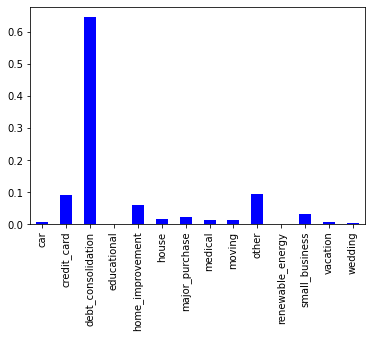

********************
G


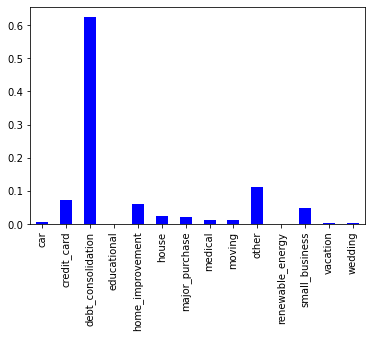

********************


In [31]:
acc_grade_list = sorted(list(acc['grade'].unique()))

for acc_grade in acc_grade_list:
    print(acc_grade)
    plt.figure()
    acc[acc['grade']==acc_grade]['purpose'].value_counts(normalize=True).sort_index().plot.bar(color='b')
    plt.show()
    print('*'*20)

### Bullet 4

2007


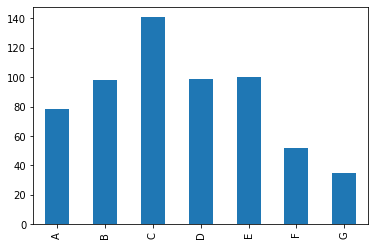

********************
2008


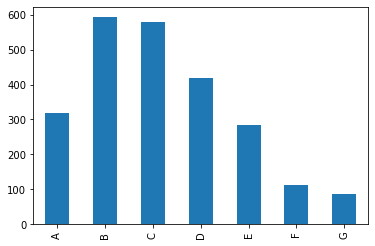

********************
2009


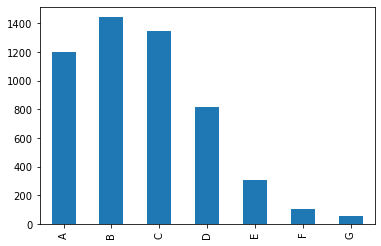

********************
2010


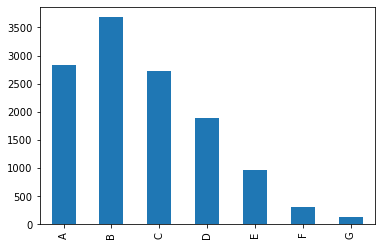

********************
2011


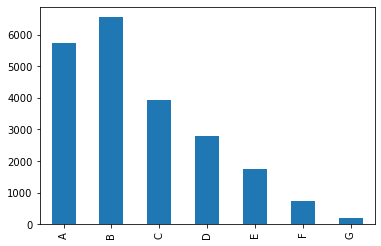

********************
2012


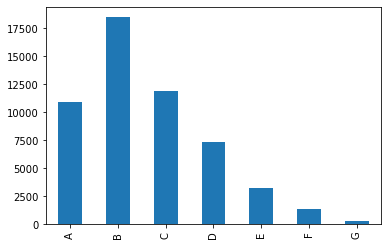

********************
2013


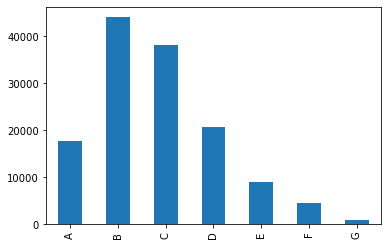

********************
2014


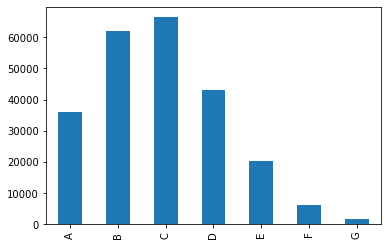

********************
2015


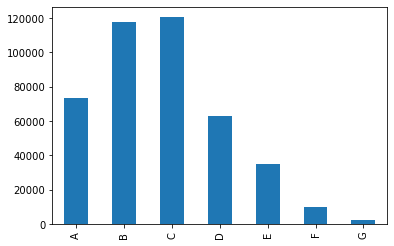

********************
2016


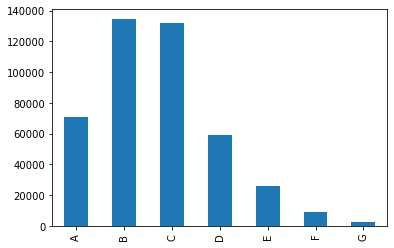

********************
2017


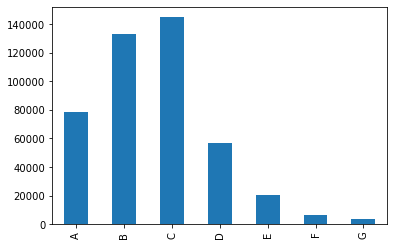

********************
2018


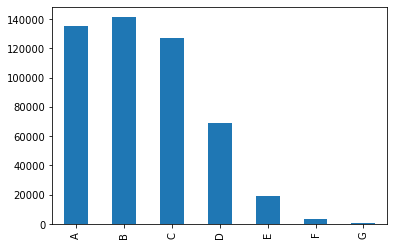

********************


In [32]:
acc_issueyear_list = sorted(list(acc['year'].unique()))

for acc_year in acc_issueyear_list:
    print(acc_year)
    plt.figure()
    acc[acc['year']==acc_year]['grade'].value_counts().sort_index().plot.bar()
    plt.show()
    print('*'*20)

2007


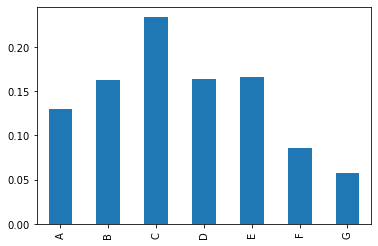

********************
2008


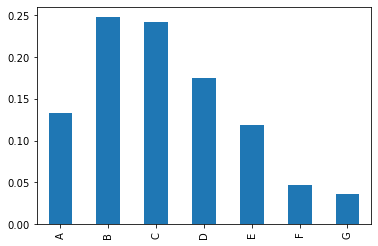

********************
2009


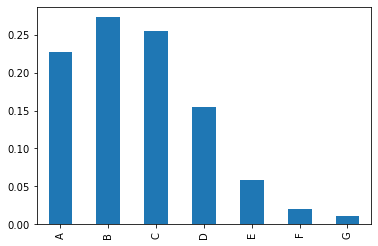

********************
2010


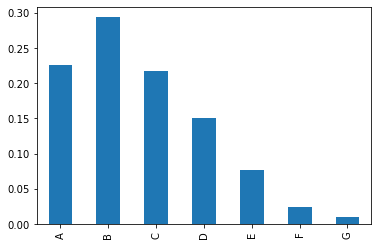

********************
2011


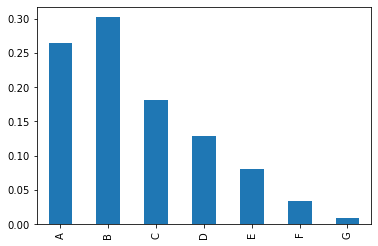

********************
2012


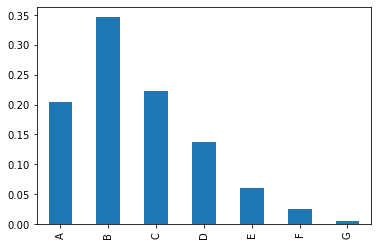

********************
2013


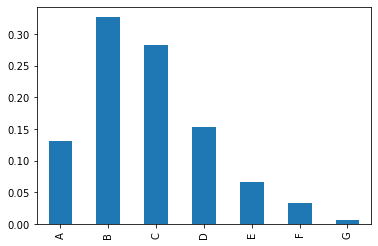

********************
2014


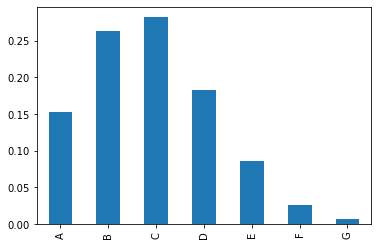

********************
2015


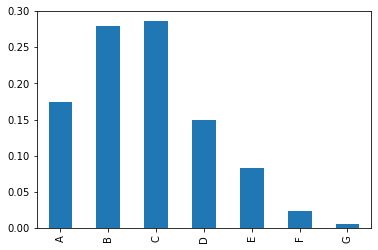

********************
2016


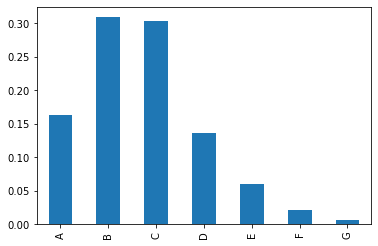

********************
2017


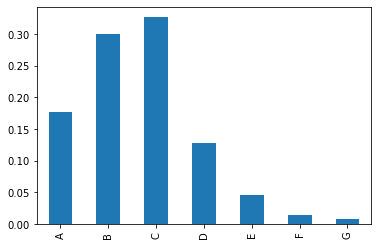

********************
2018


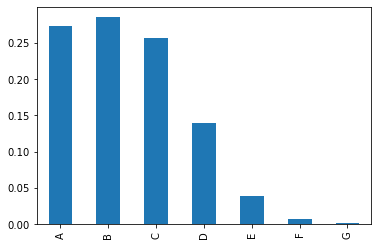

********************


In [33]:
acc_issueyear_list = sorted(list(acc['year'].unique()))

for acc_year in acc_issueyear_list:
    print(acc_year)
    plt.figure()
    acc[acc['year']==acc_year]['grade'].value_counts(normalize=True).sort_index().plot.bar()
    plt.show()
    print('*'*20)

### Bullet 5

2007
car


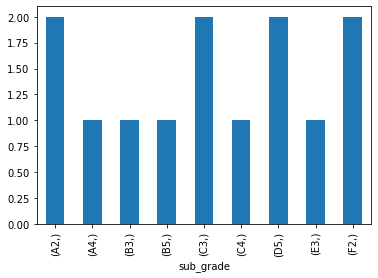

credit_card


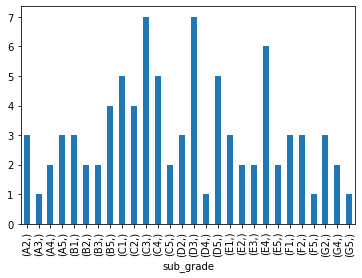

debt_consolidation


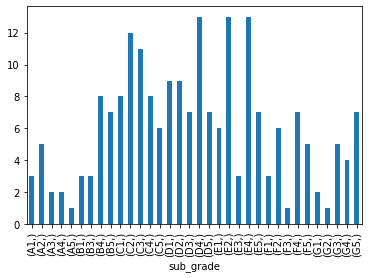

educational


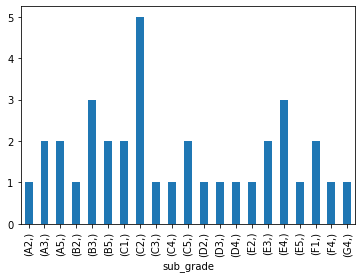

home_improvement


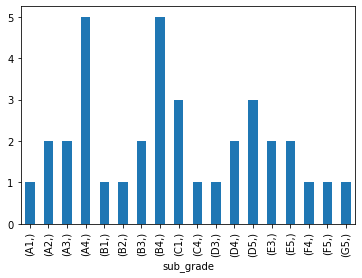

house


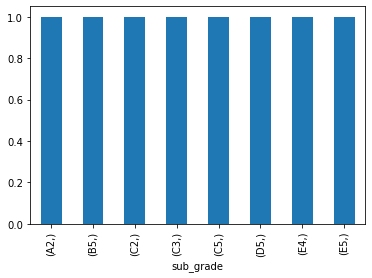

major_purchase


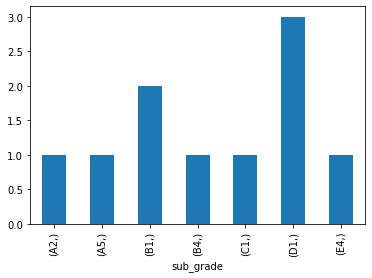

medical


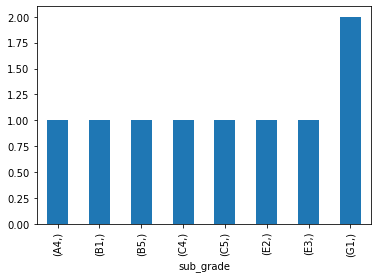

moving


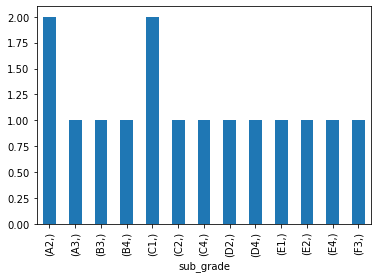

other


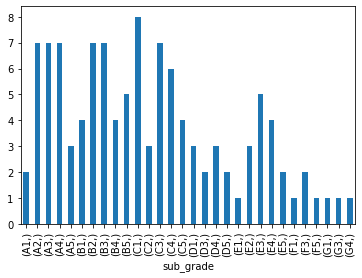

renewable_energy


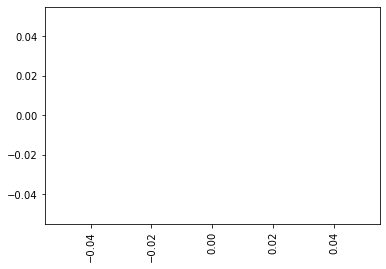

small_business


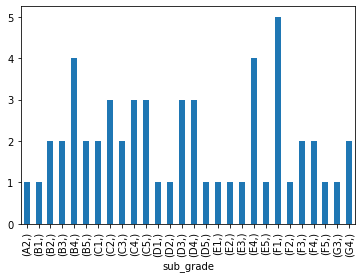

vacation


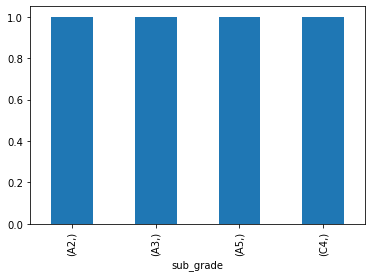

wedding


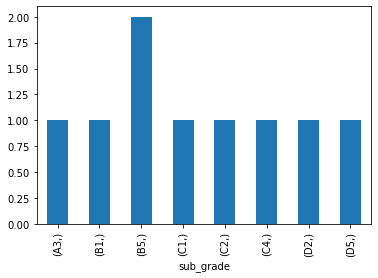

********************
2008
car


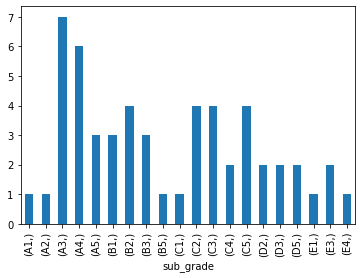

credit_card


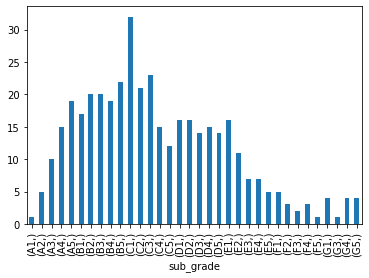

debt_consolidation


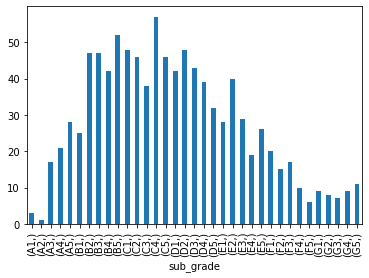

educational


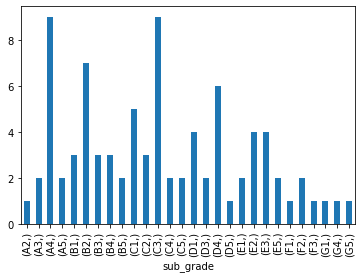

home_improvement


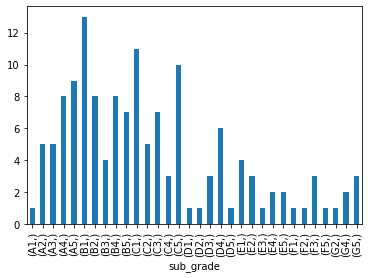

house


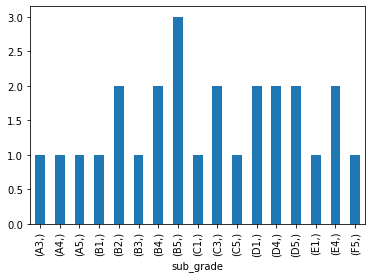

major_purchase


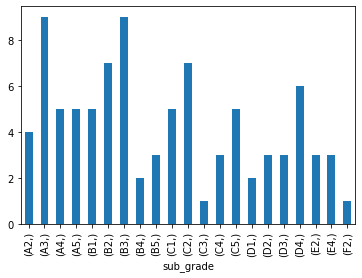

medical


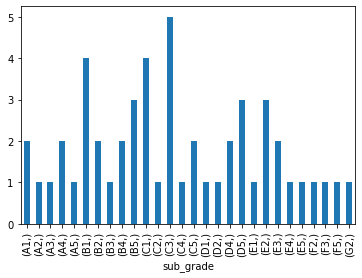

moving


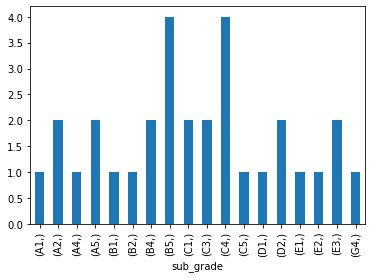

other


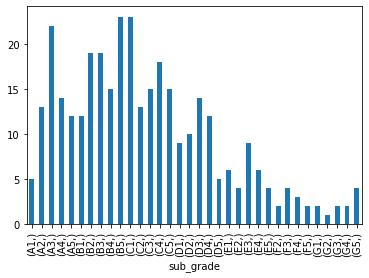

renewable_energy


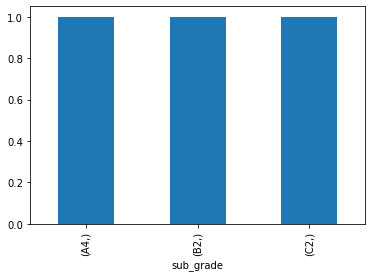

small_business


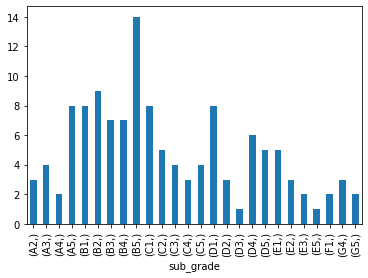

vacation


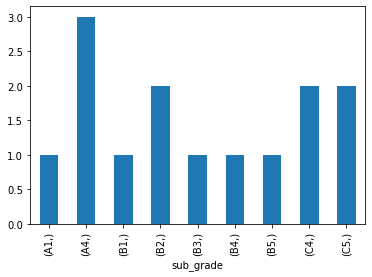

wedding


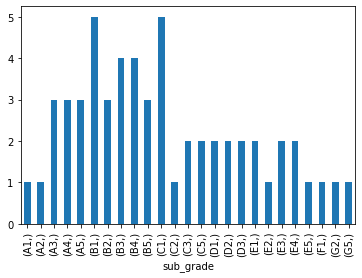

********************
2009
car


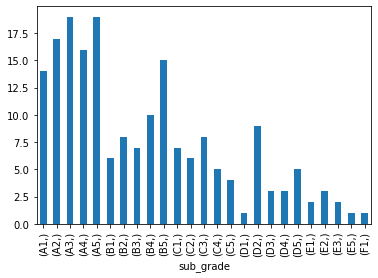

credit_card


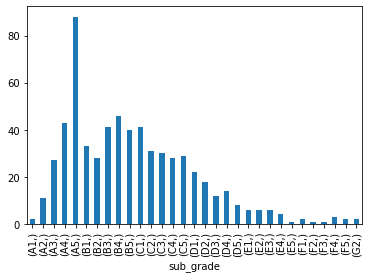

debt_consolidation


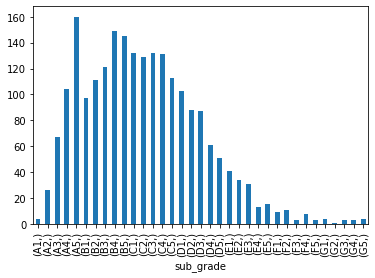

educational


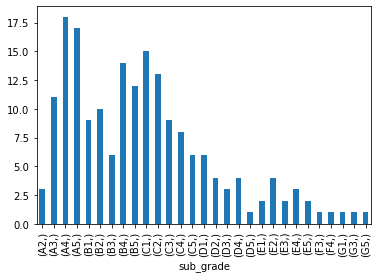

home_improvement


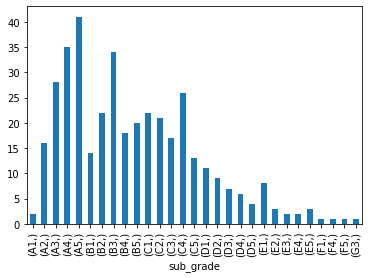

house


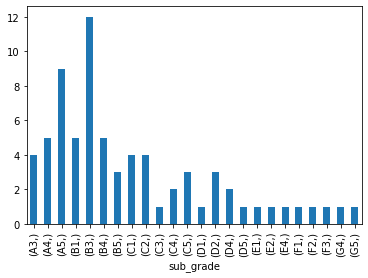

major_purchase


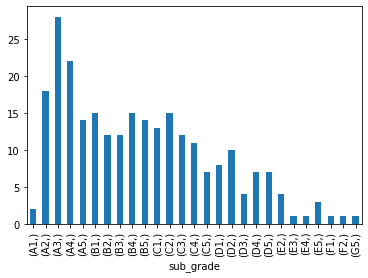

medical


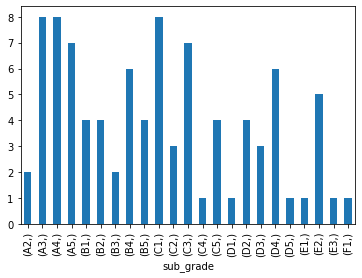

moving


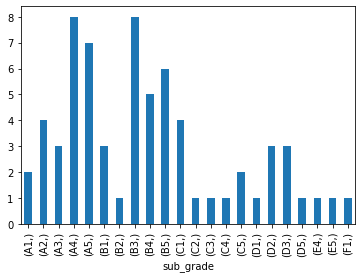

other


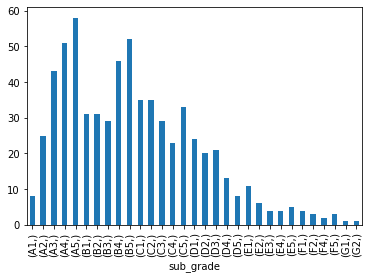

renewable_energy


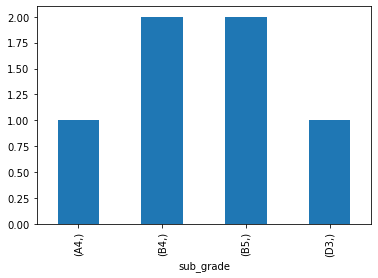

small_business


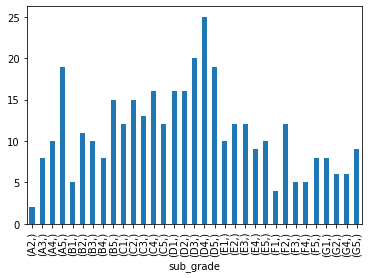

vacation


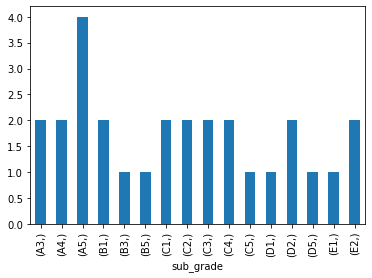

wedding


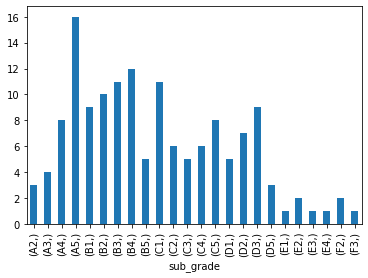

********************
2010
car


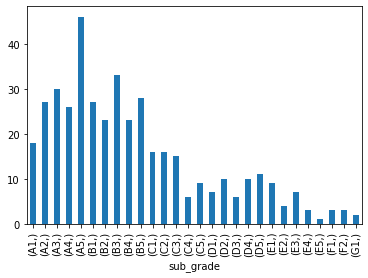

credit_card


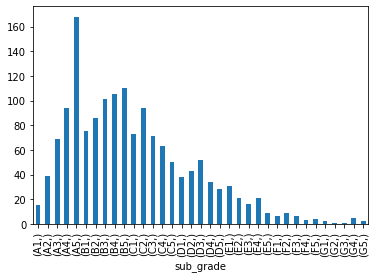

debt_consolidation


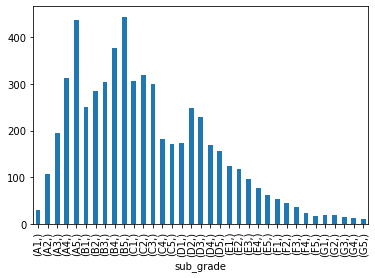

educational


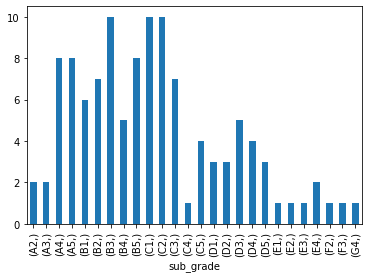

home_improvement


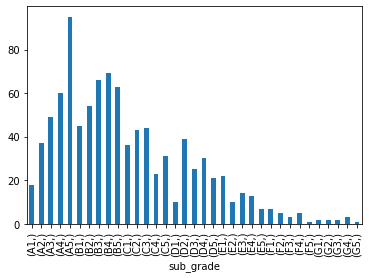

house


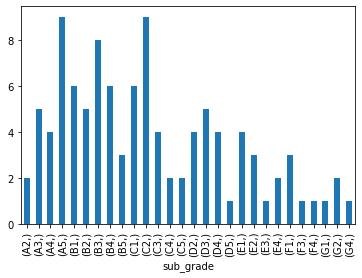

major_purchase


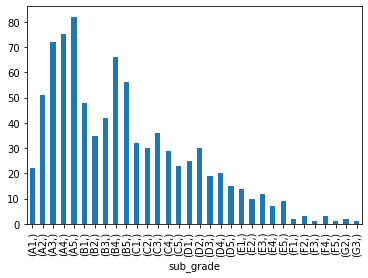

medical


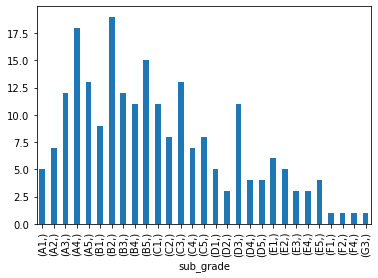

moving


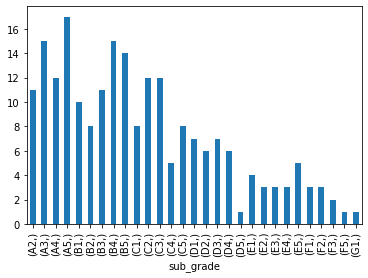

other


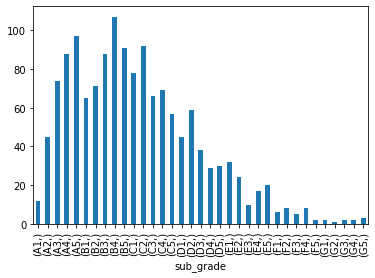

renewable_energy


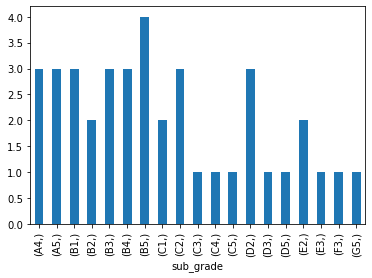

small_business


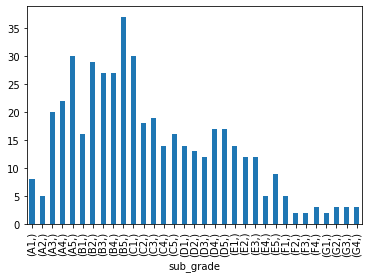

vacation


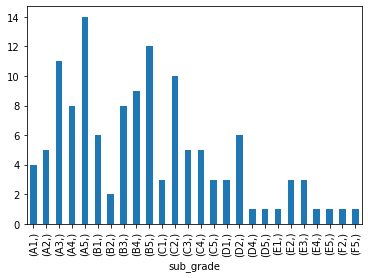

wedding


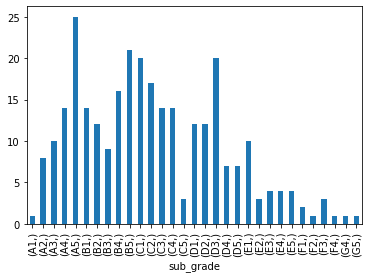

********************
2011
car


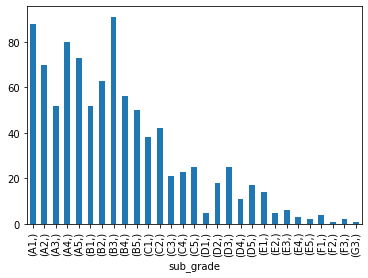

credit_card


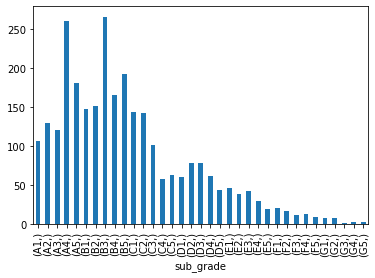

debt_consolidation


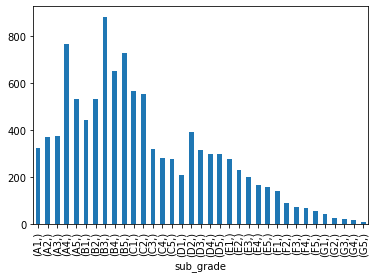

educational


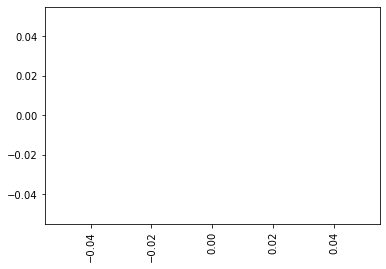

home_improvement


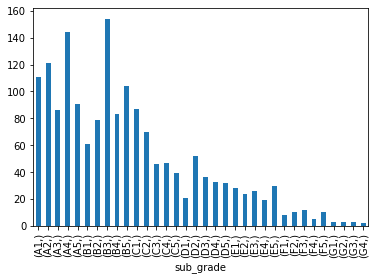

house


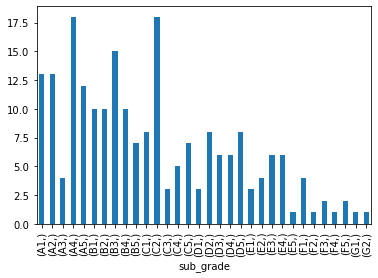

major_purchase


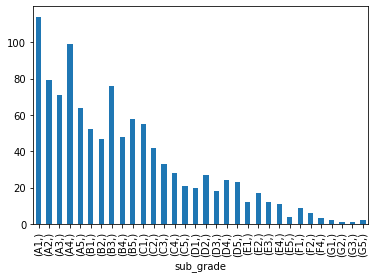

medical


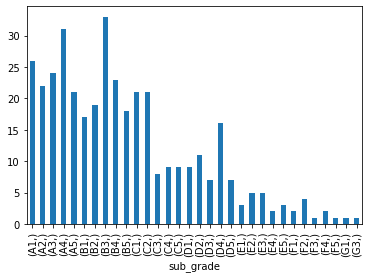

moving


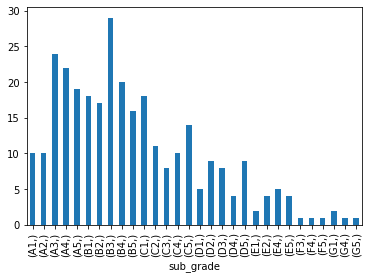

other


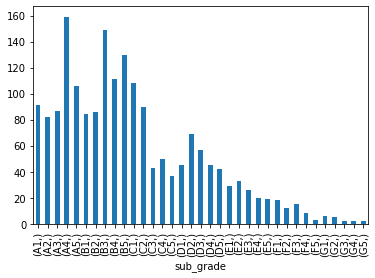

renewable_energy


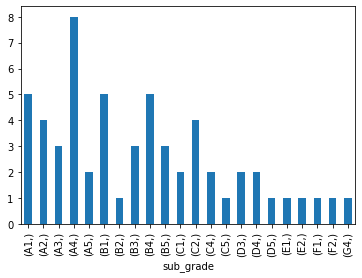

small_business


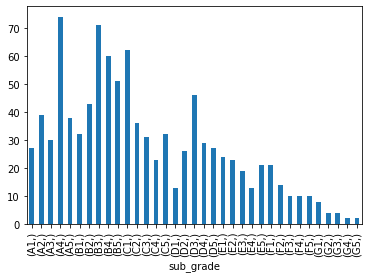

vacation


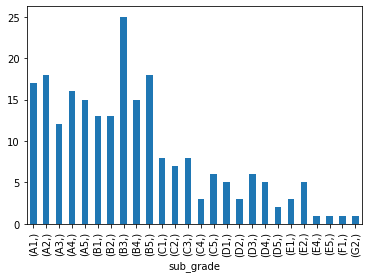

wedding


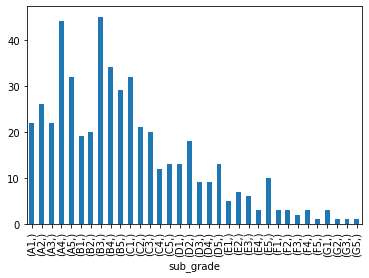

********************
2012
car


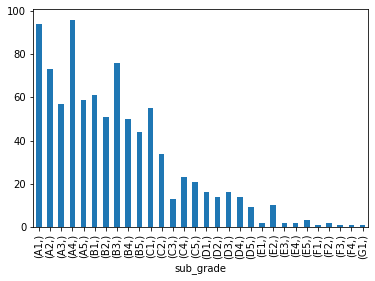

credit_card


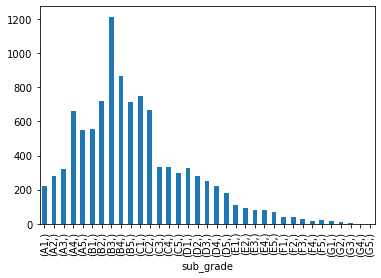

debt_consolidation


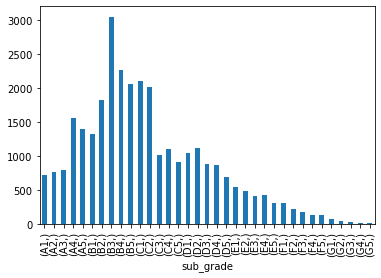

educational


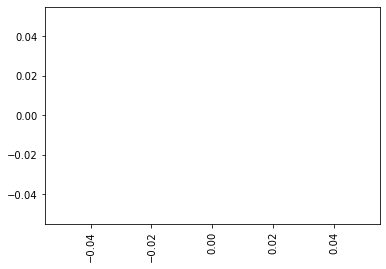

home_improvement


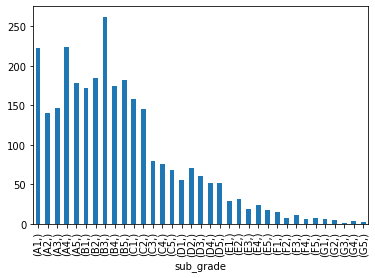

house


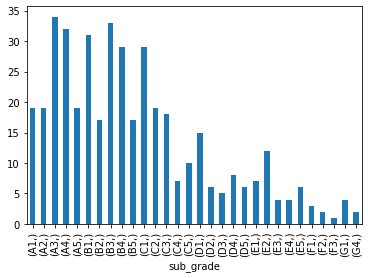

major_purchase


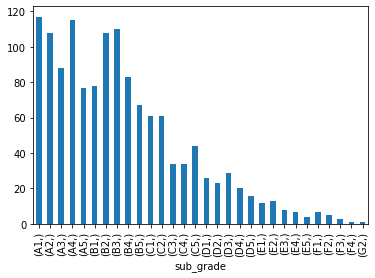

medical


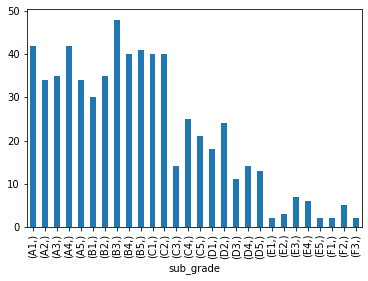

moving


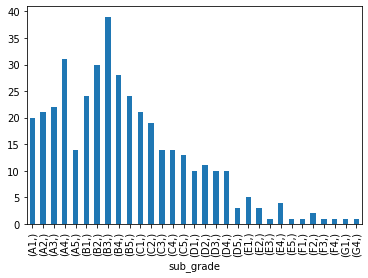

other


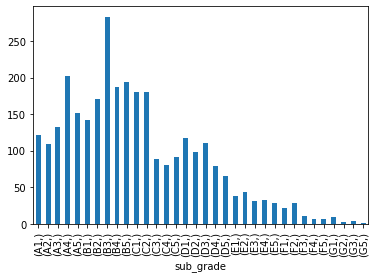

renewable_energy


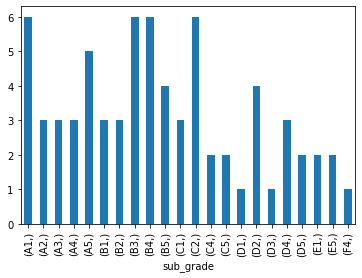

small_business


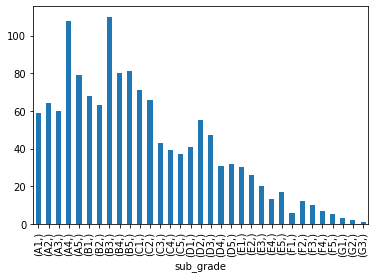

vacation


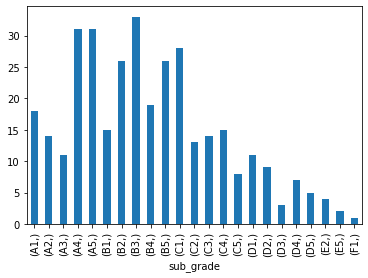

wedding


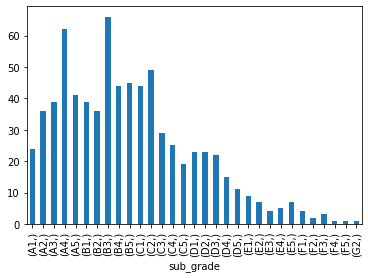

********************
2013
car


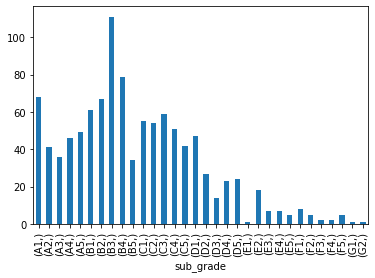

credit_card


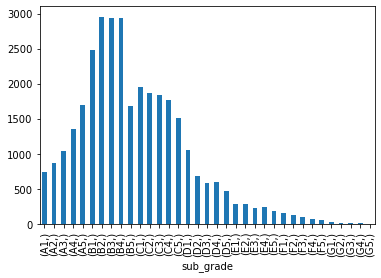

debt_consolidation


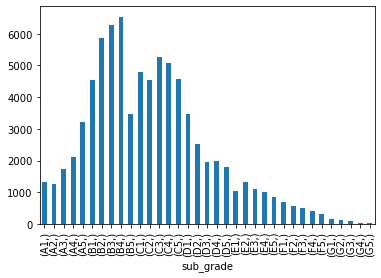

educational


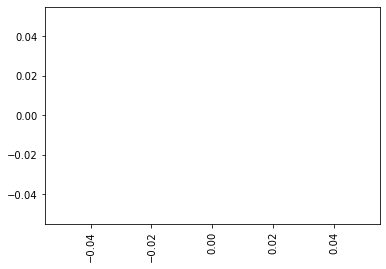

home_improvement


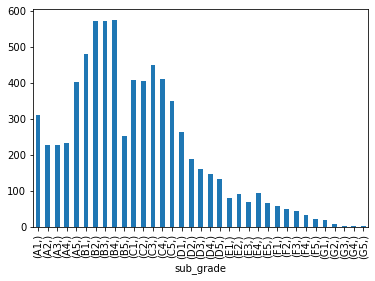

house


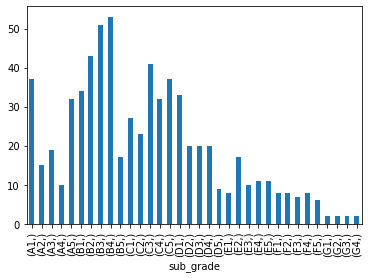

major_purchase


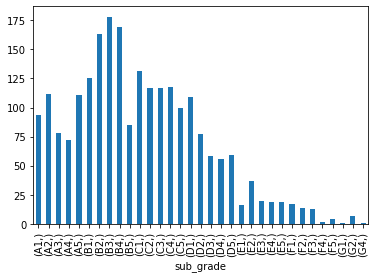

medical


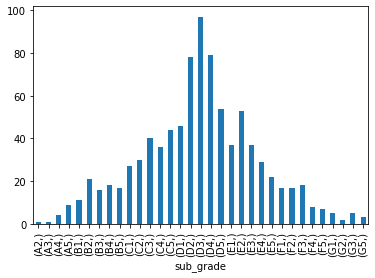

moving


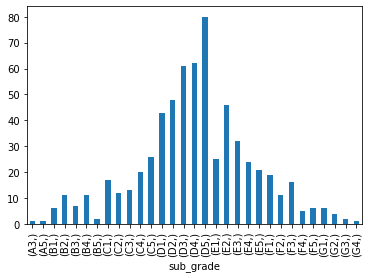

other


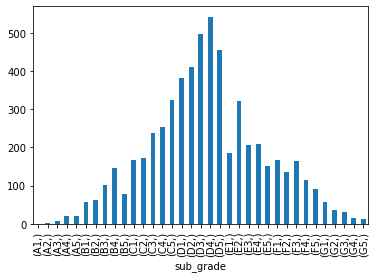

renewable_energy


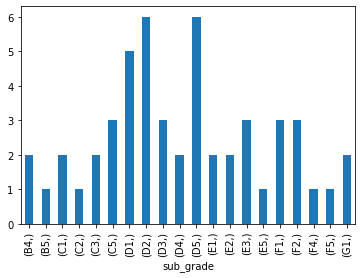

small_business


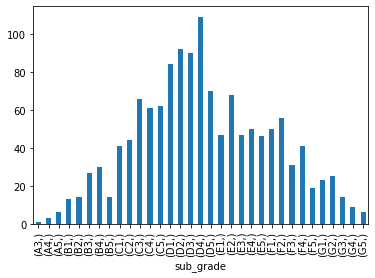

vacation


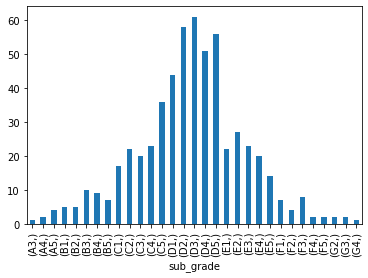

wedding


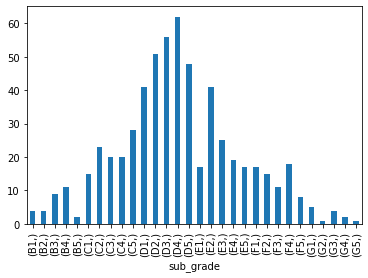

********************
2014
car


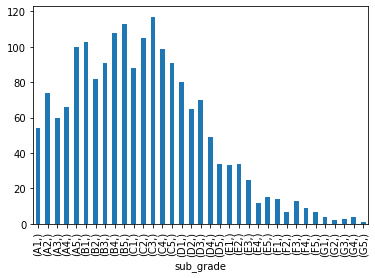

credit_card


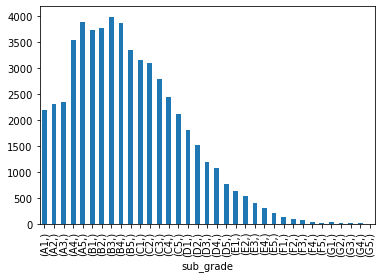

debt_consolidation


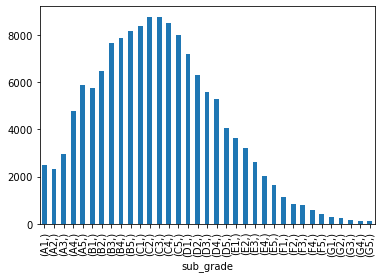

educational


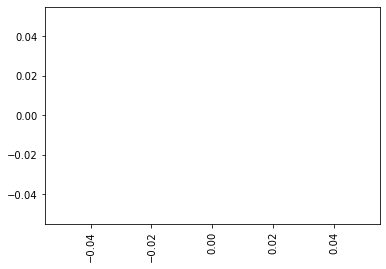

home_improvement


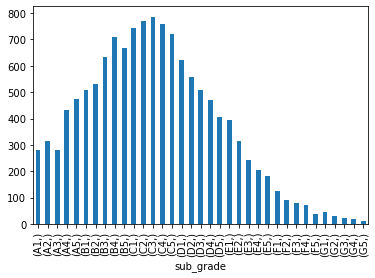

house


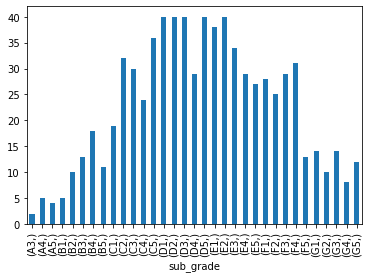

major_purchase


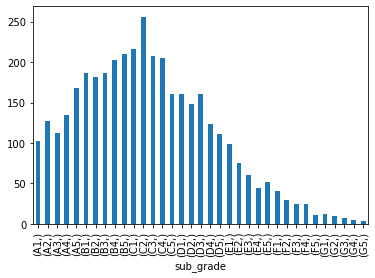

medical


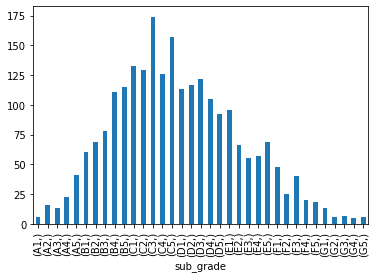

moving


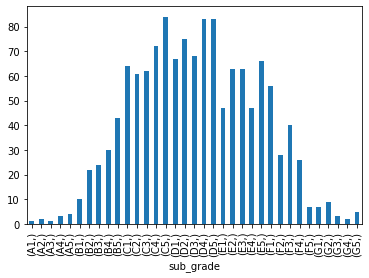

other


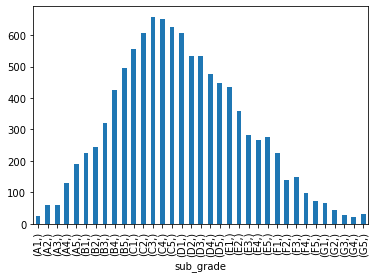

renewable_energy


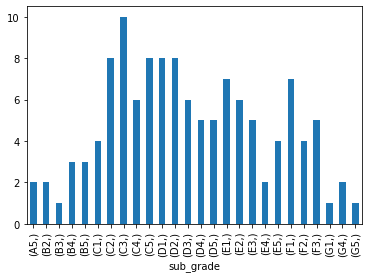

small_business


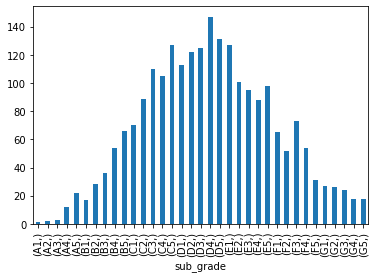

vacation


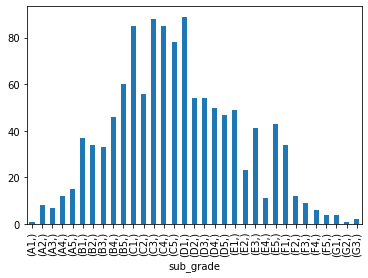

wedding


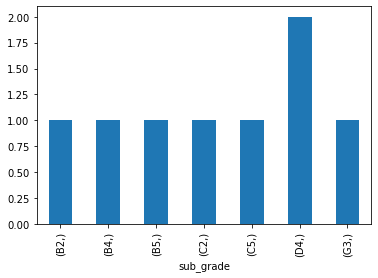

********************
2015
car


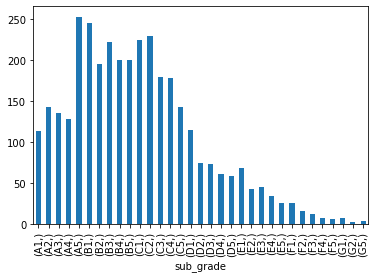

credit_card


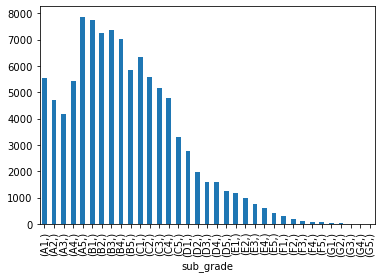

debt_consolidation


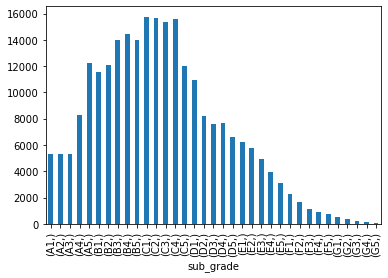

educational


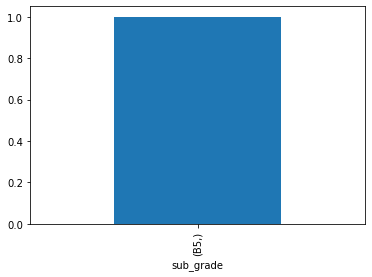

home_improvement


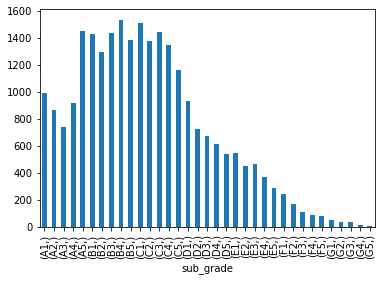

house


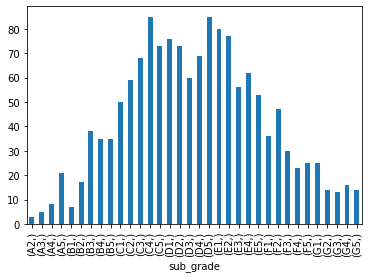

major_purchase


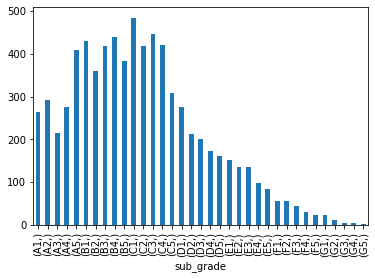

medical


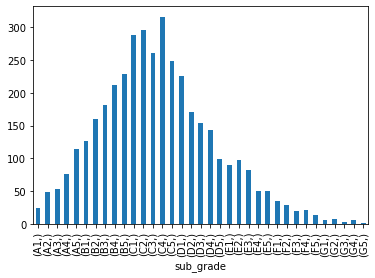

moving


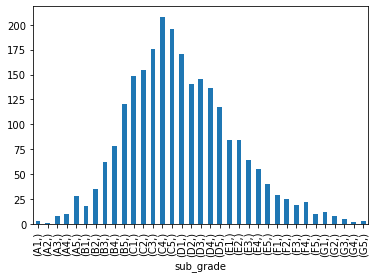

other


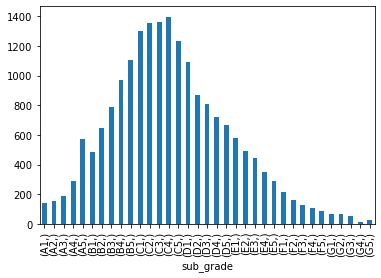

renewable_energy


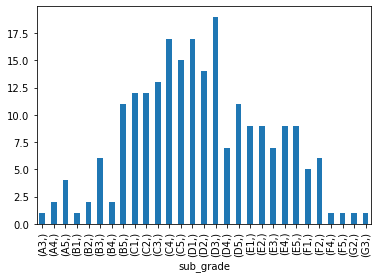

small_business


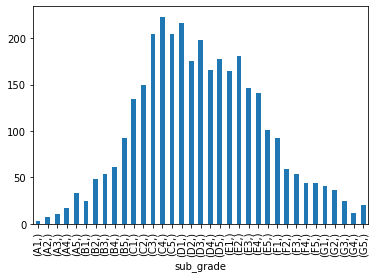

vacation


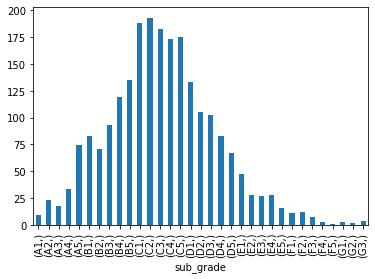

wedding


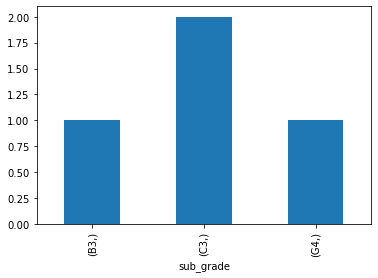

********************
2016
car


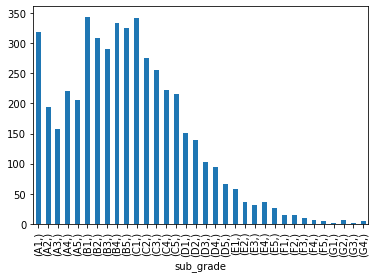

credit_card


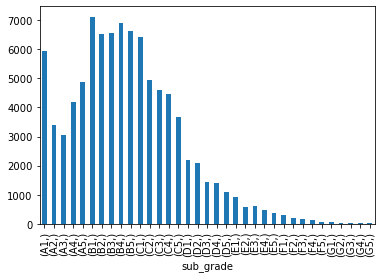

debt_consolidation


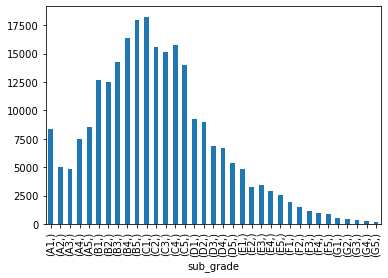

educational


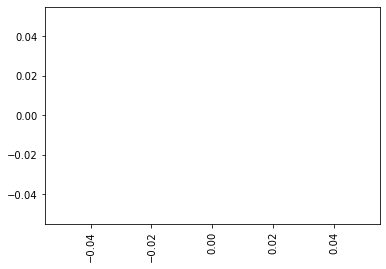

home_improvement


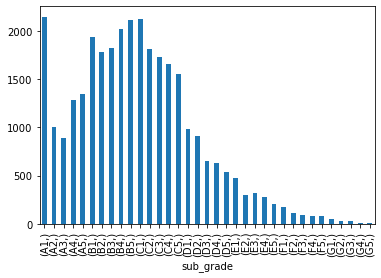

house


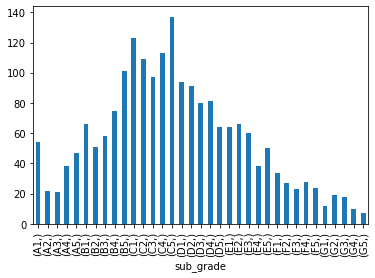

major_purchase


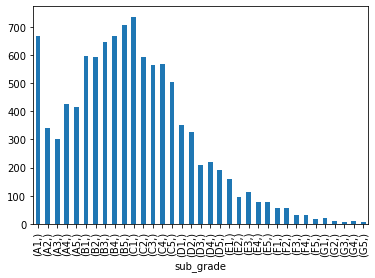

medical


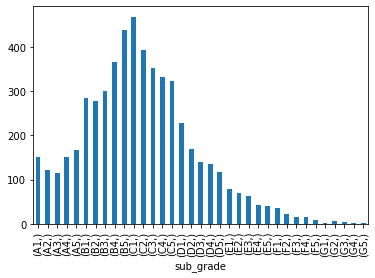

moving


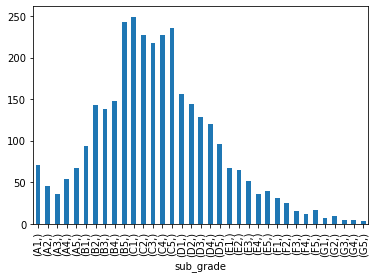

other


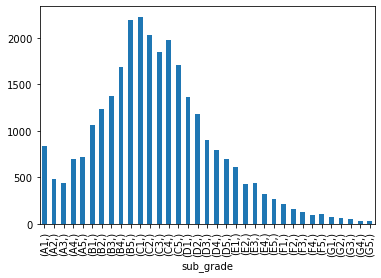

renewable_energy


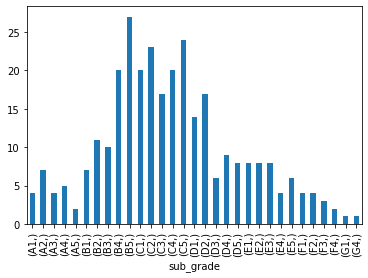

small_business


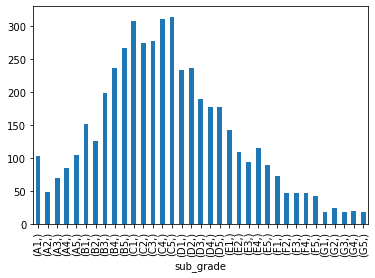

vacation


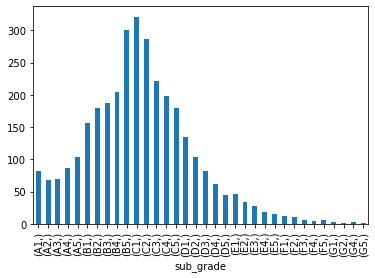

wedding


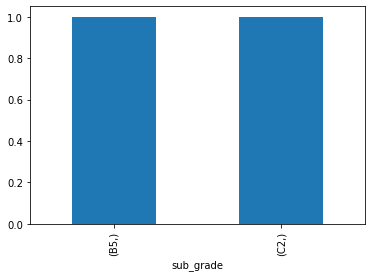

********************
2017
car


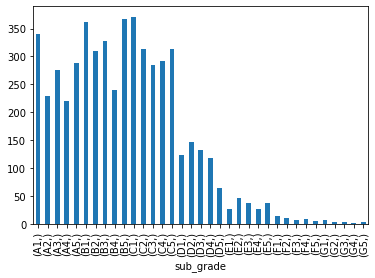

credit_card


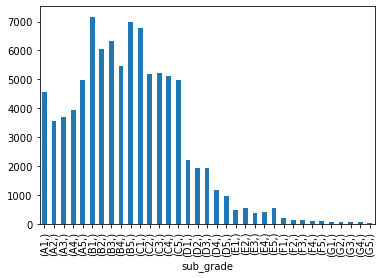

debt_consolidation


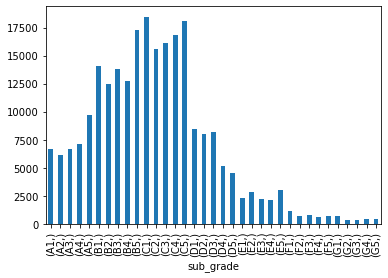

educational


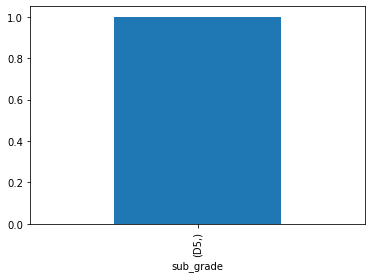

home_improvement


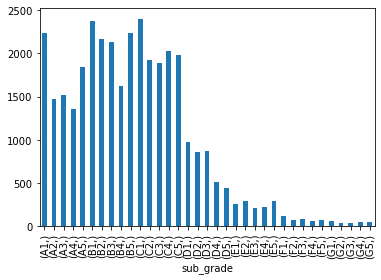

house


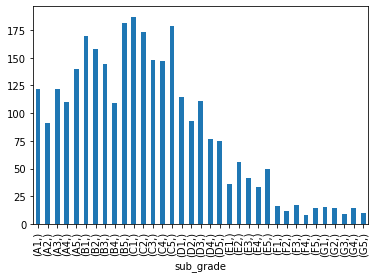

major_purchase


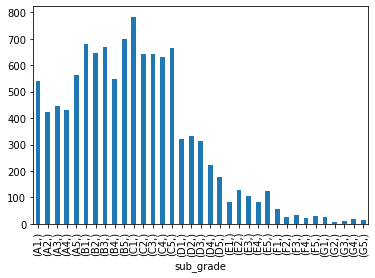

medical


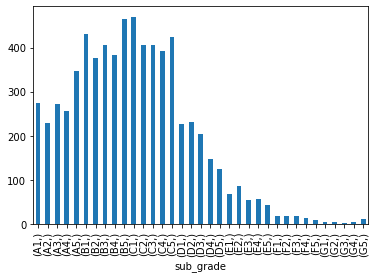

moving


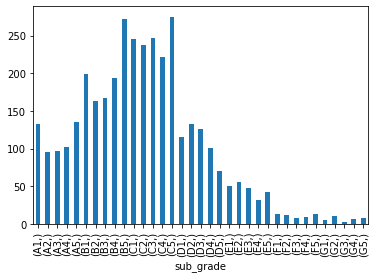

other


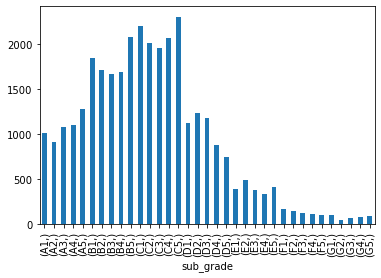

renewable_energy


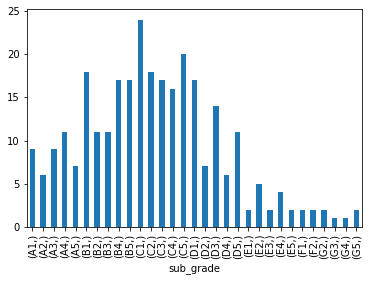

small_business


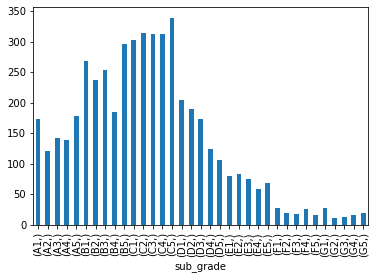

vacation


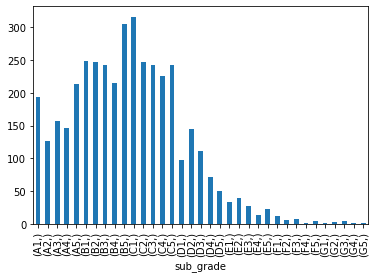

wedding


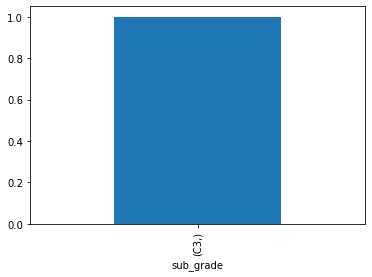

********************
2018
car


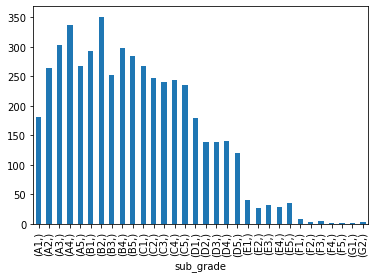

credit_card


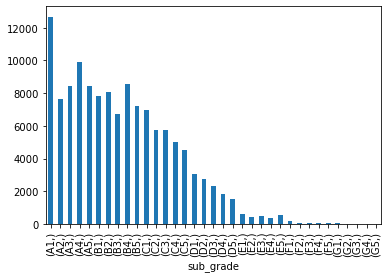

debt_consolidation


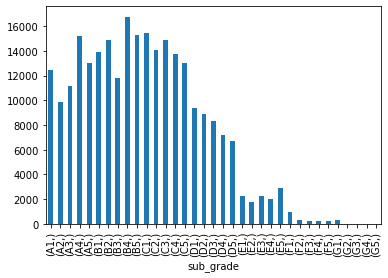

educational


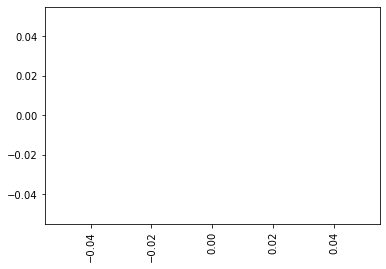

home_improvement


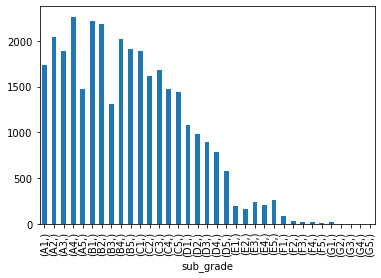

house


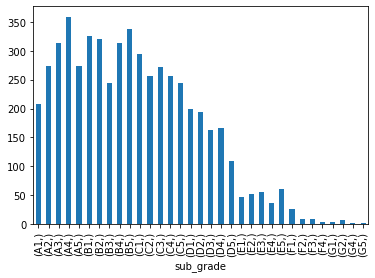

major_purchase


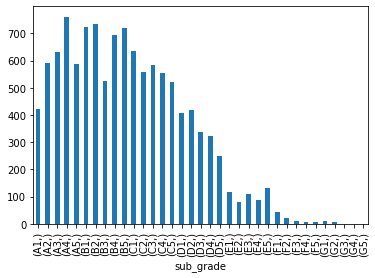

medical


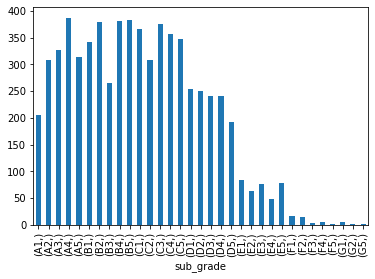

moving


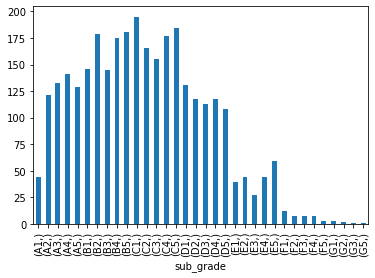

other


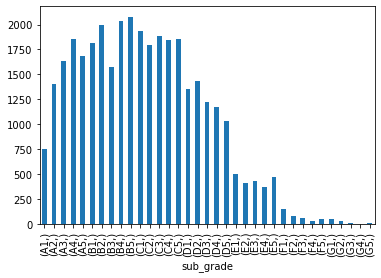

renewable_energy


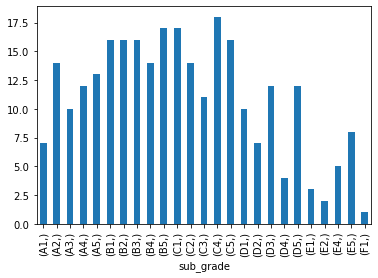

small_business


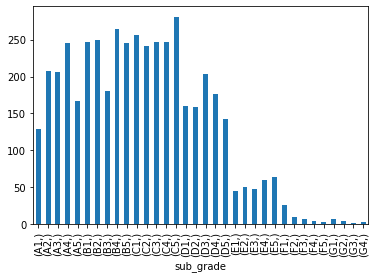

vacation


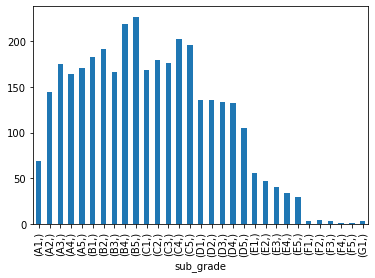

wedding


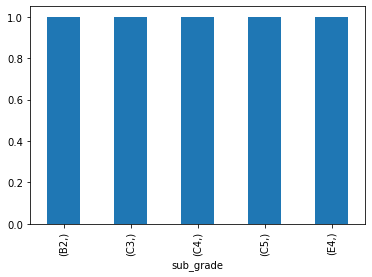

********************


In [34]:
acc_issueyear_list = sorted(list(acc['year'].unique()))
acc_purpose_list = sorted(list(acc['purpose'].unique()))
acc_subgrade_list = sorted(list(acc['sub_grade'].unique()))

for acc_year in acc_issueyear_list:
    print(acc_year)
    for acc_purp in acc_purpose_list:
        print(acc_purp)
        plt.figure()
        try:
            acc[(acc['year']==acc_year) &\
                (acc['purpose']==acc_purp)]\
            [['sub_grade']].value_counts().sort_index().plot(kind='bar')
        except:
            pass
        plt.show()
    print('*'*20)

# Question 2

### Bullet 1

In [35]:
acc['loan_amnt'].value_counts()

10000.0    187236
20000.0    131006
15000.0    123226
12000.0    121681
35000.0     86285
            ...  
550.0           1
725.0           1
750.0           1
925.0           1
850.0           1
Name: loan_amnt, Length: 1572, dtype: int64

(array([1.549e+03, 9.000e+00, 2.000e+00, 5.000e+00, 3.000e+00, 0.000e+00,
        3.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([1.000000e+00, 1.872450e+04, 3.744800e+04, 5.617150e+04,
        7.489500e+04, 9.361850e+04, 1.123420e+05, 1.310655e+05,
        1.497890e+05, 1.685125e+05, 1.872360e+05]),
 <BarContainer object of 10 artists>)

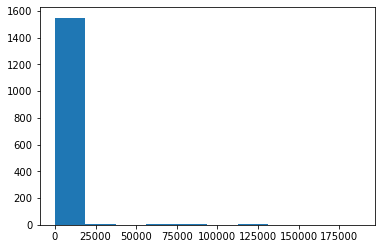

In [36]:
plt.hist(acc['loan_amnt'].value_counts(), bins=10)

### Bullet 2

car
Charged Off


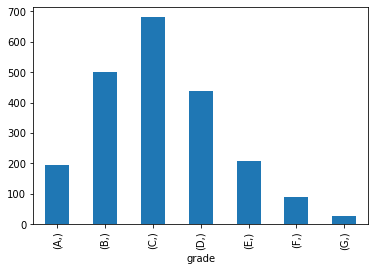

Current


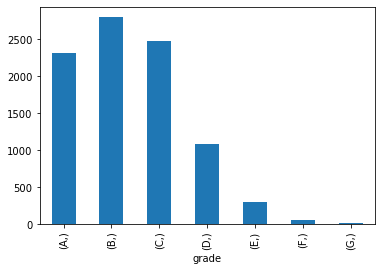

Default


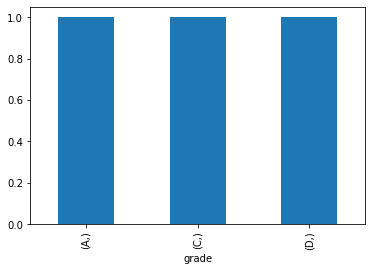

Does not meet the credit policy. Status:Charged Off


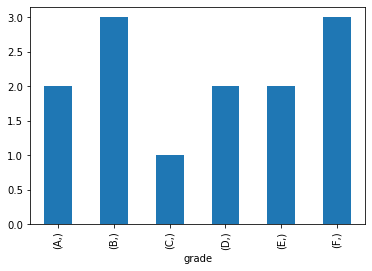

Does not meet the credit policy. Status:Fully Paid


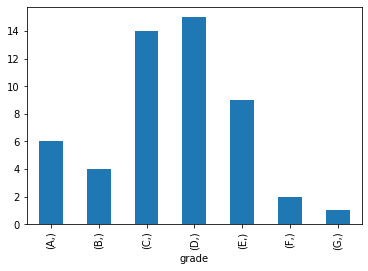

Fully Paid


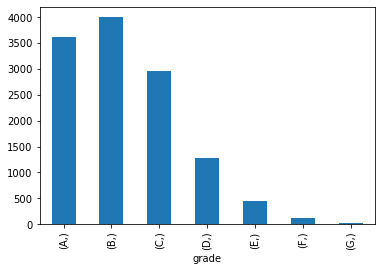

In Grace Period


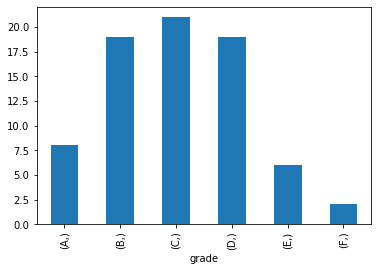

Late (16-30 days)


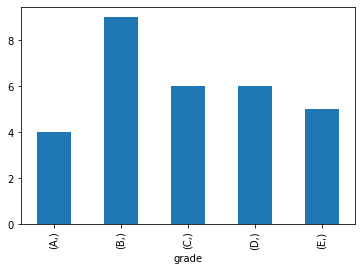

Late (31-120 days)


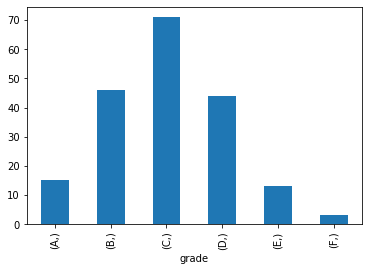

********************
credit_card
Charged Off


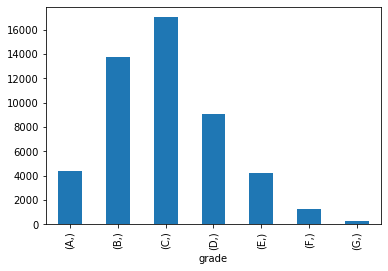

Current


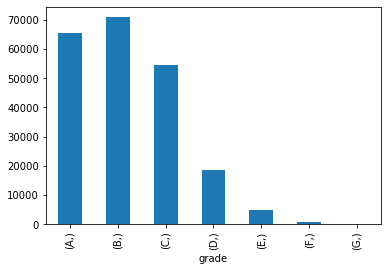

Default


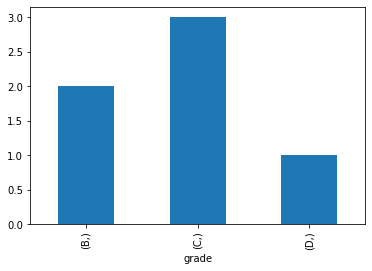

Does not meet the credit policy. Status:Charged Off


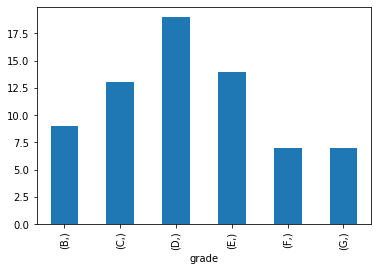

Does not meet the credit policy. Status:Fully Paid


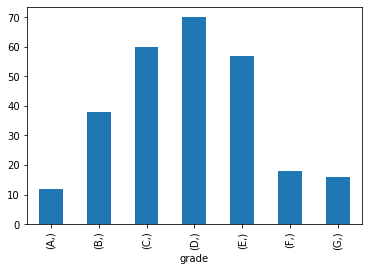

Fully Paid


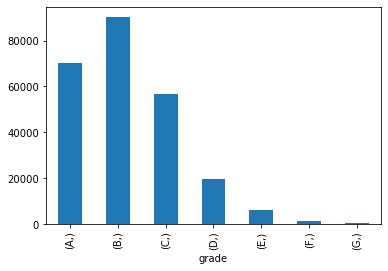

In Grace Period


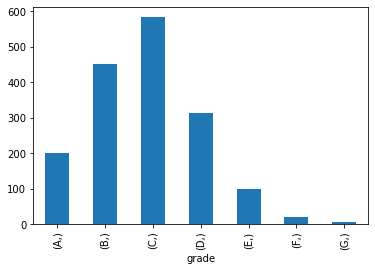

Late (16-30 days)


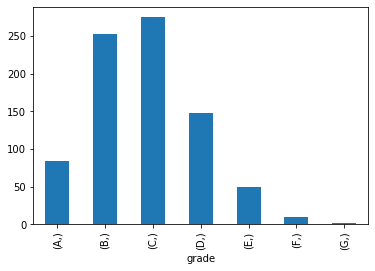

Late (31-120 days)


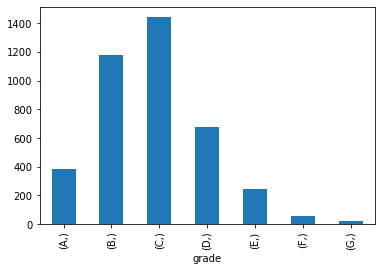

********************
debt_consolidation
Charged Off


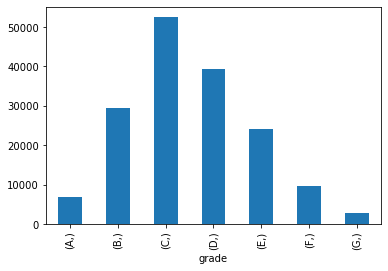

Current


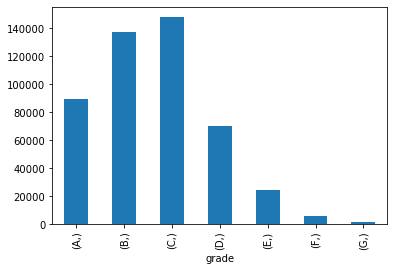

Default


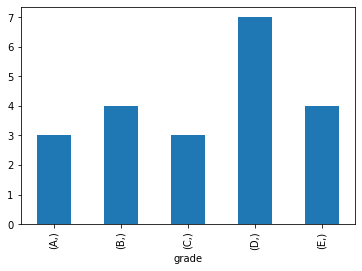

Does not meet the credit policy. Status:Charged Off


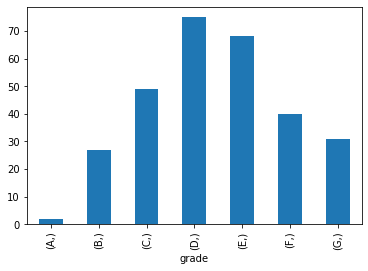

Does not meet the credit policy. Status:Fully Paid


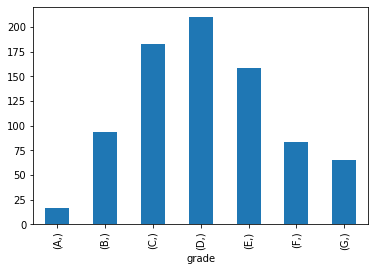

Fully Paid


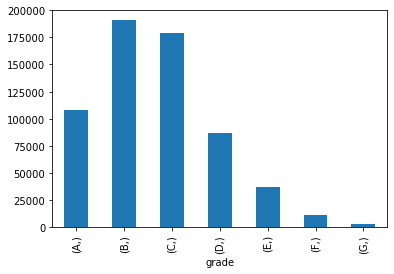

In Grace Period


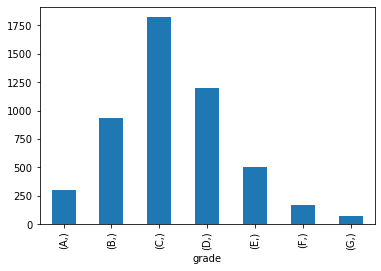

Late (16-30 days)


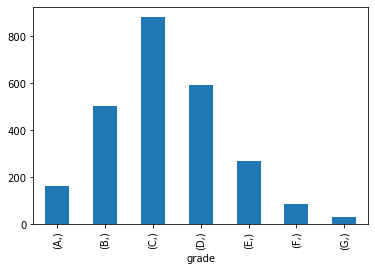

Late (31-120 days)


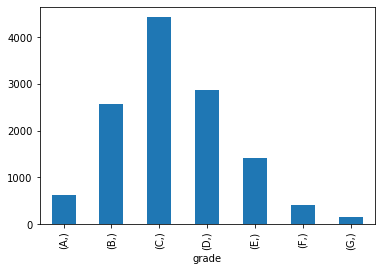

********************
educational
Charged Off


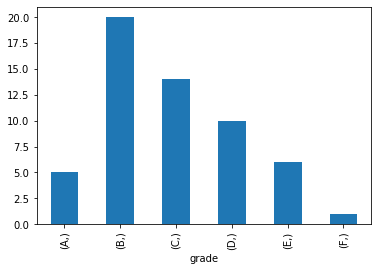

Current


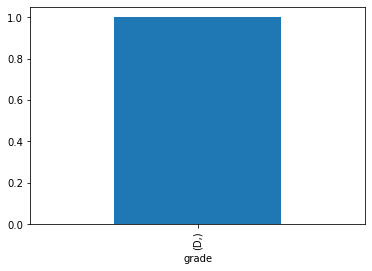

Default


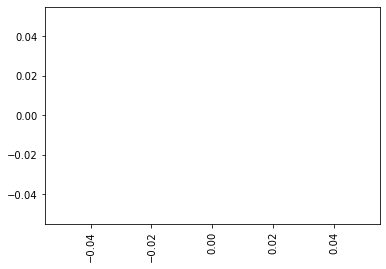

Does not meet the credit policy. Status:Charged Off


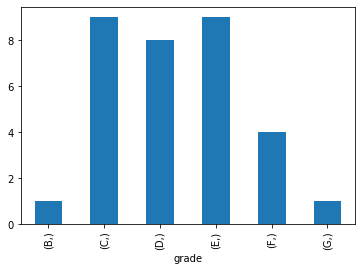

Does not meet the credit policy. Status:Fully Paid


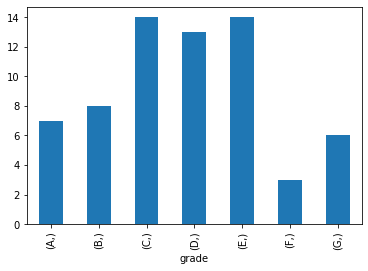

Fully Paid


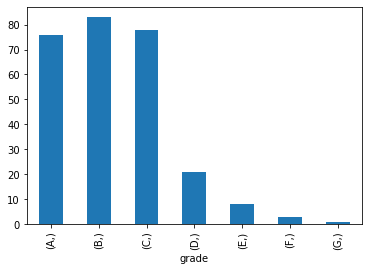

In Grace Period


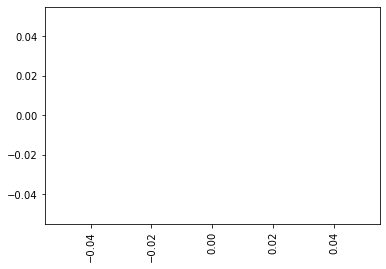

Late (16-30 days)


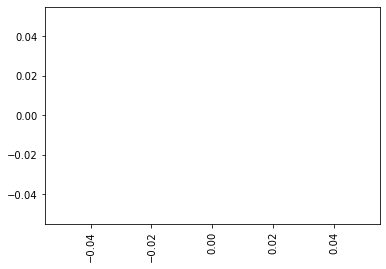

Late (31-120 days)


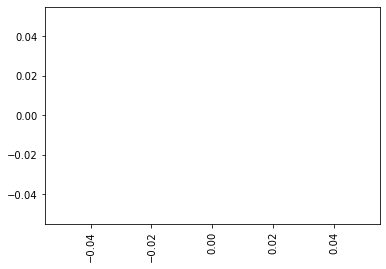

********************
home_improvement
Charged Off


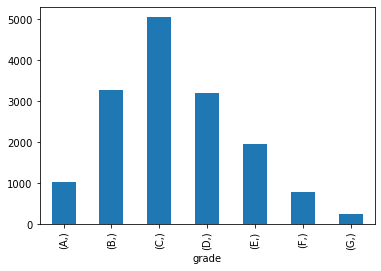

Current


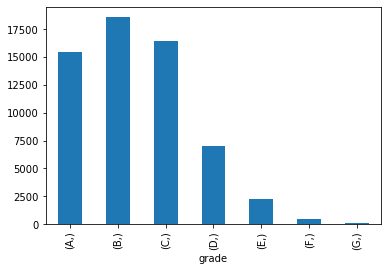

Default


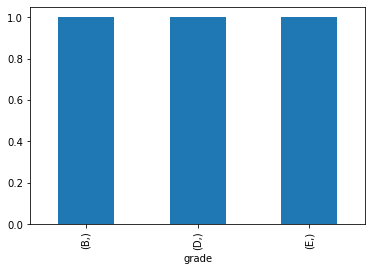

Does not meet the credit policy. Status:Charged Off


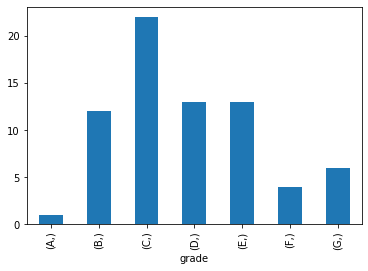

Does not meet the credit policy. Status:Fully Paid


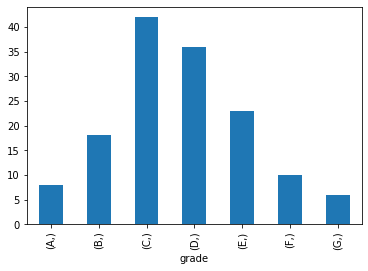

Fully Paid


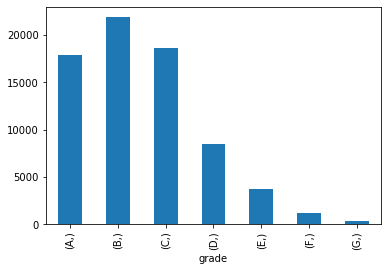

In Grace Period


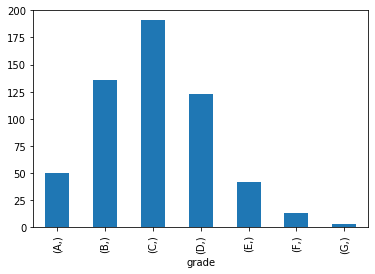

Late (16-30 days)


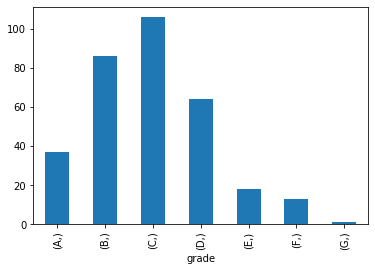

Late (31-120 days)


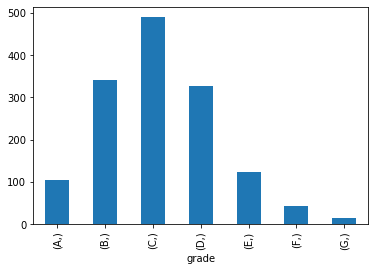

********************
house
Charged Off


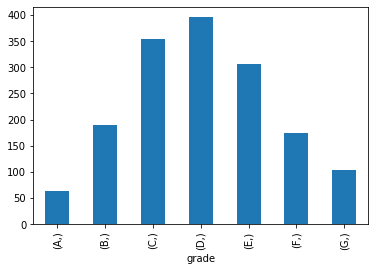

Current


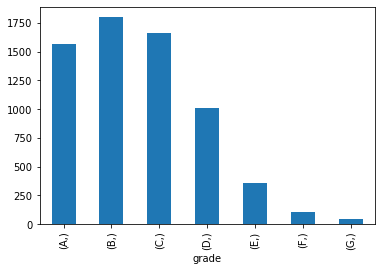

Default


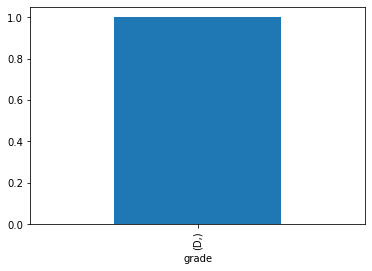

Does not meet the credit policy. Status:Charged Off


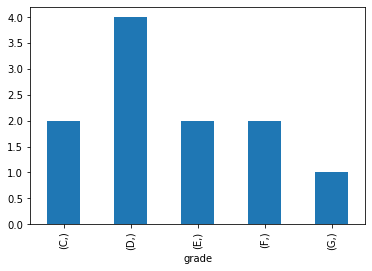

Does not meet the credit policy. Status:Fully Paid


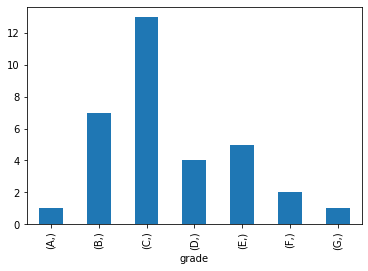

Fully Paid


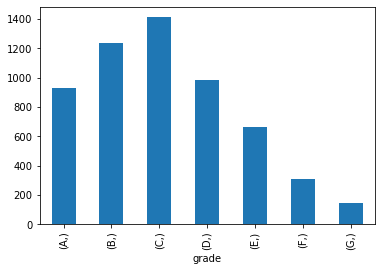

In Grace Period


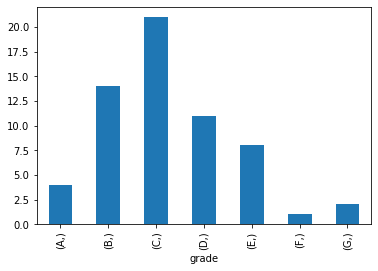

Late (16-30 days)


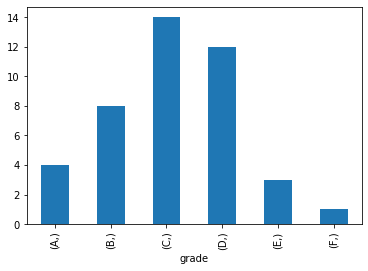

Late (31-120 days)


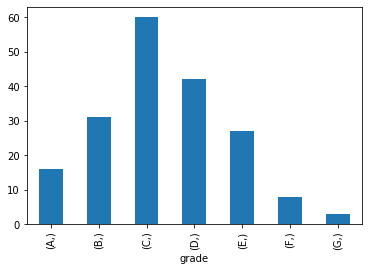

********************
major_purchase
Charged Off


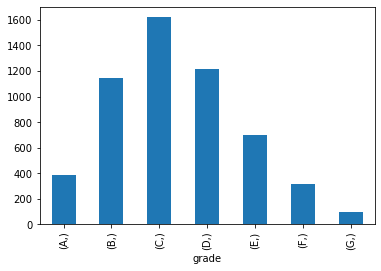

Current


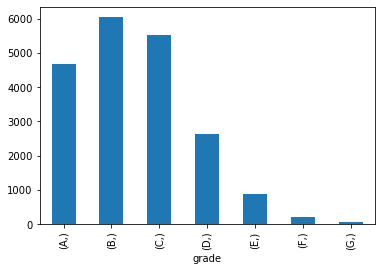

Default


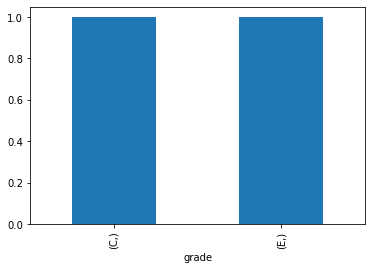

Does not meet the credit policy. Status:Charged Off


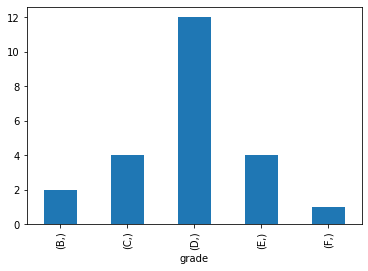

Does not meet the credit policy. Status:Fully Paid


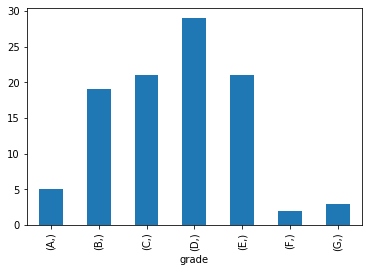

Fully Paid


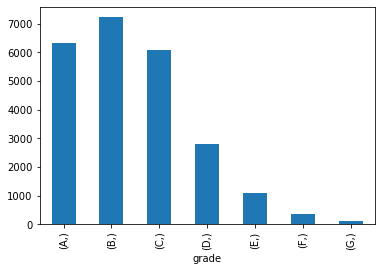

In Grace Period


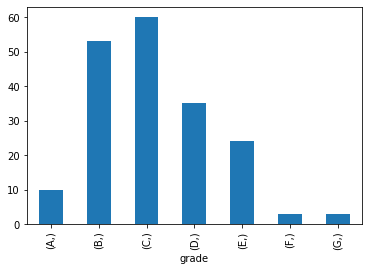

Late (16-30 days)


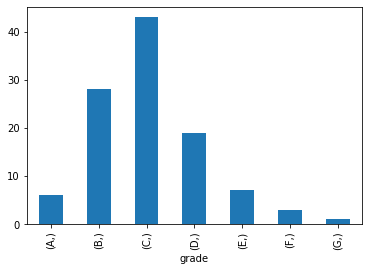

Late (31-120 days)


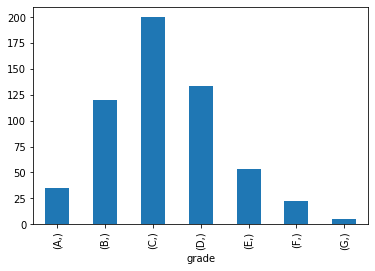

********************
medical
Charged Off


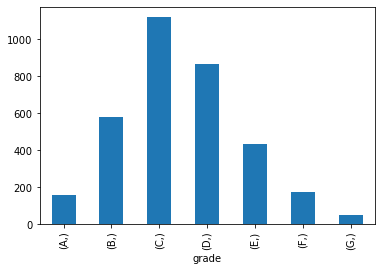

Current


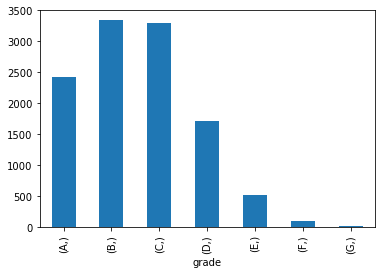

Default


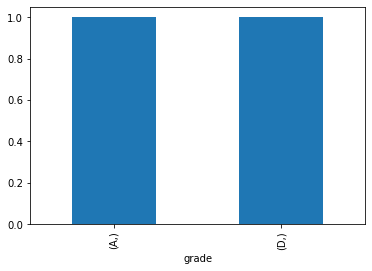

Does not meet the credit policy. Status:Charged Off


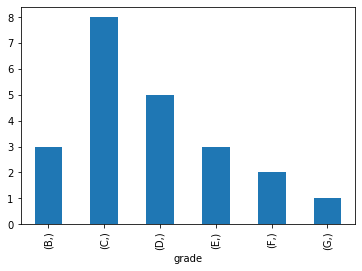

Does not meet the credit policy. Status:Fully Paid


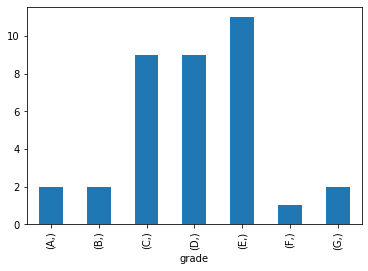

Fully Paid


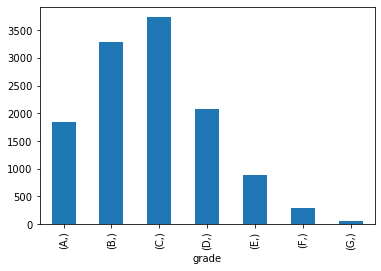

In Grace Period


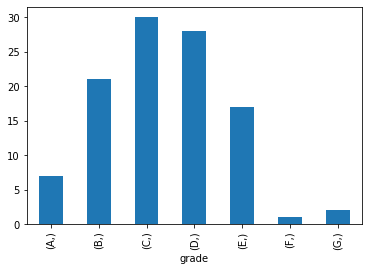

Late (16-30 days)


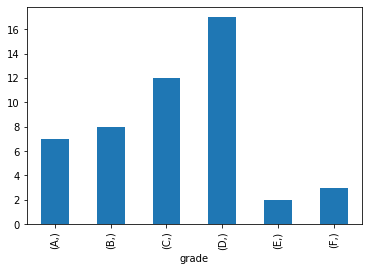

Late (31-120 days)


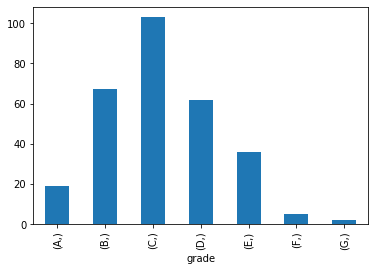

********************
moving
Charged Off


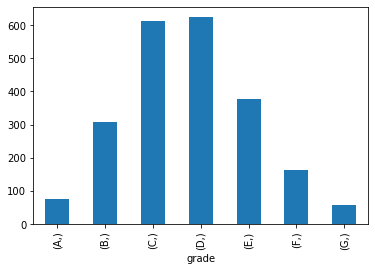

Current


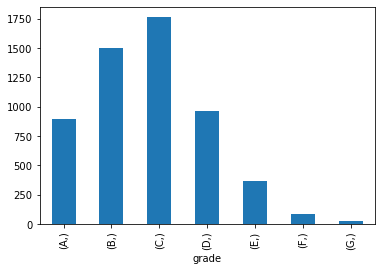

Default


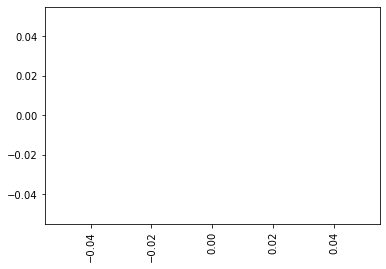

Does not meet the credit policy. Status:Charged Off


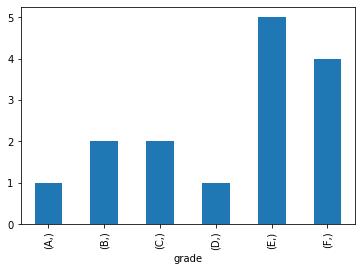

Does not meet the credit policy. Status:Fully Paid


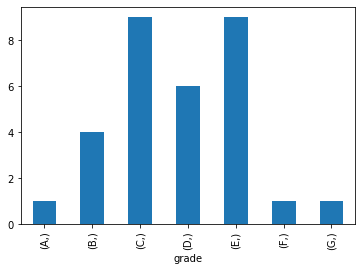

Fully Paid


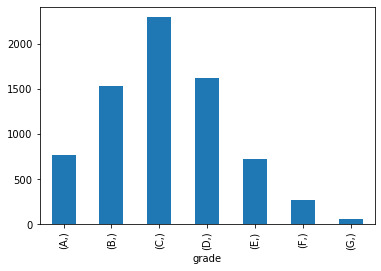

In Grace Period


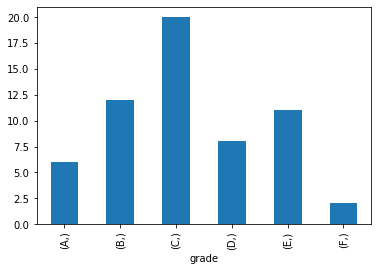

Late (16-30 days)


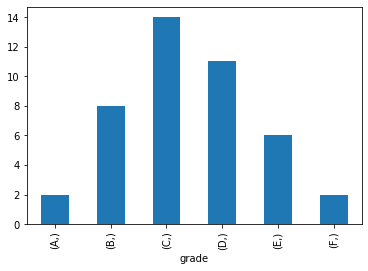

Late (31-120 days)


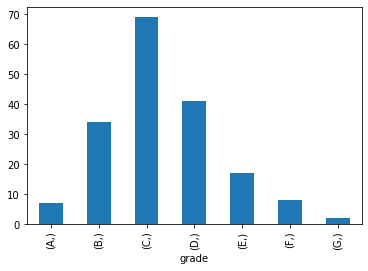

********************
other
Charged Off


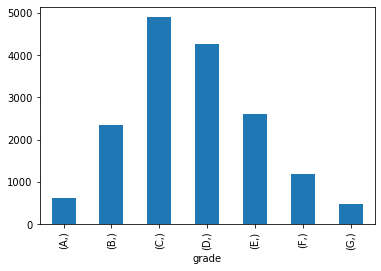

Current


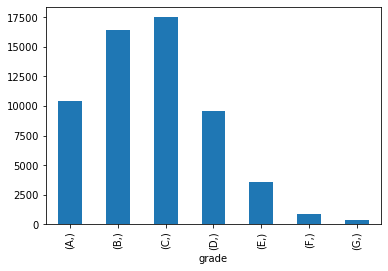

Default


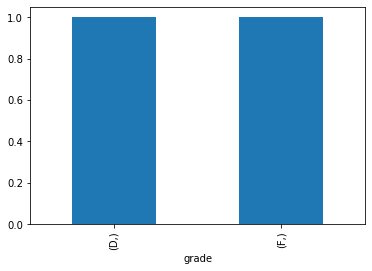

Does not meet the credit policy. Status:Charged Off


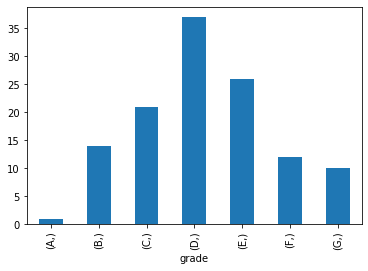

Does not meet the credit policy. Status:Fully Paid


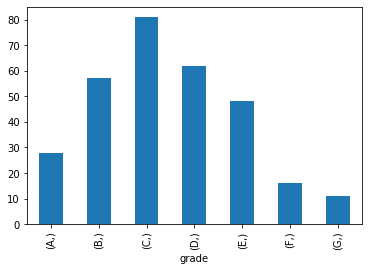

Fully Paid


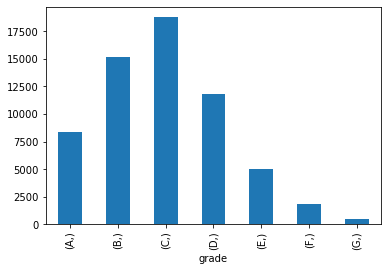

In Grace Period


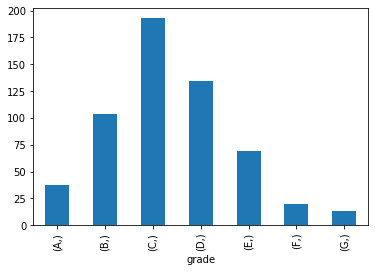

Late (16-30 days)


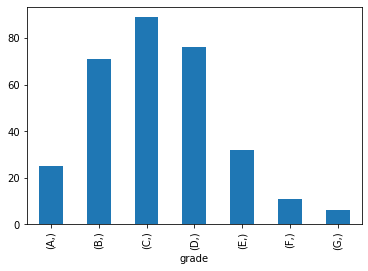

Late (31-120 days)


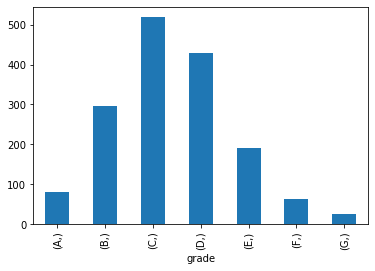

********************
renewable_energy
Charged Off


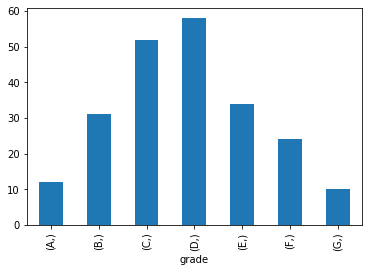

Current


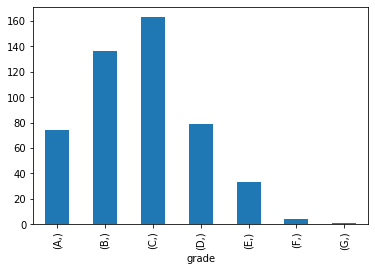

Default


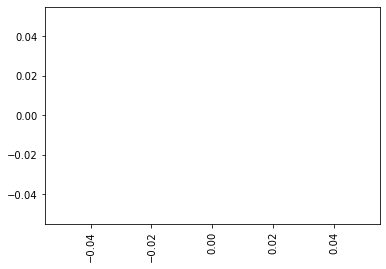

Does not meet the credit policy. Status:Charged Off


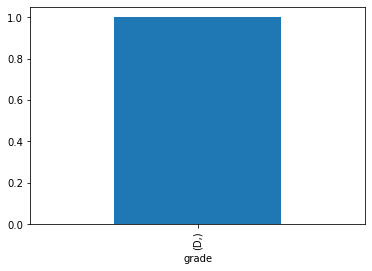

Does not meet the credit policy. Status:Fully Paid


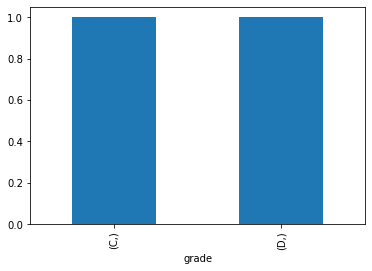

Fully Paid


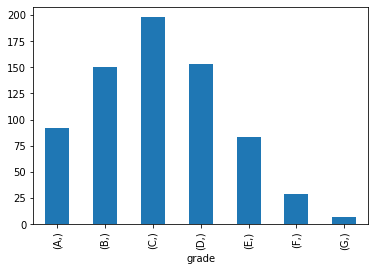

In Grace Period


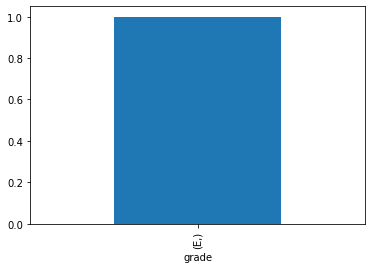

Late (16-30 days)


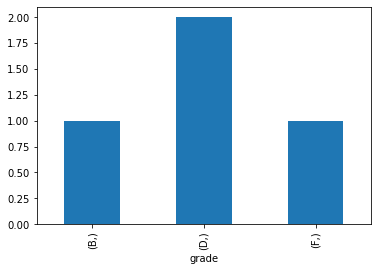

Late (31-120 days)


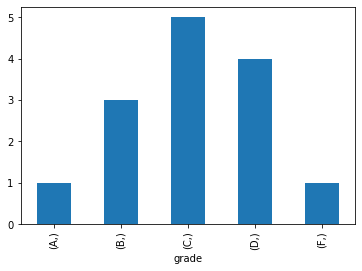

********************
small_business
Charged Off


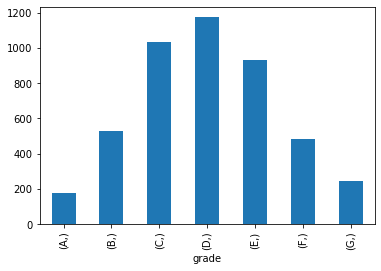

Current


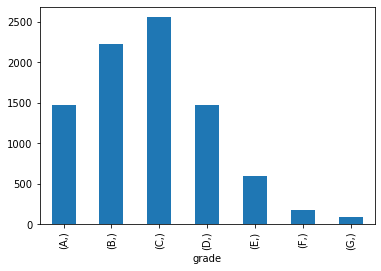

Default


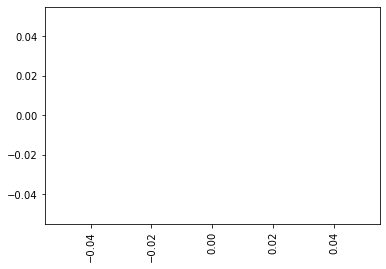

Does not meet the credit policy. Status:Charged Off


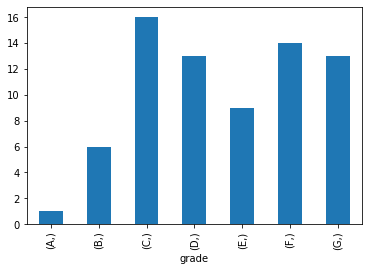

Does not meet the credit policy. Status:Fully Paid


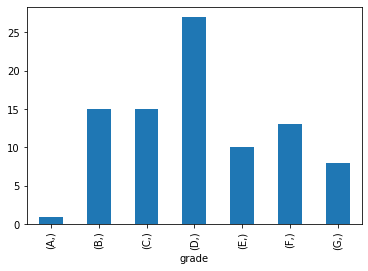

Fully Paid


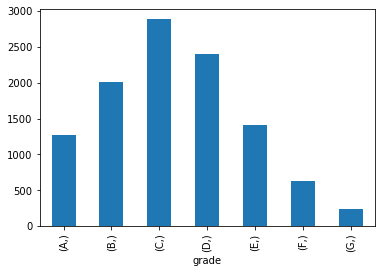

In Grace Period


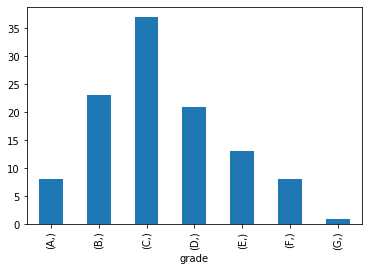

Late (16-30 days)


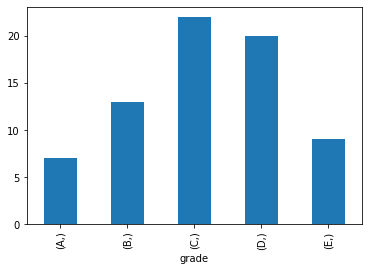

Late (31-120 days)


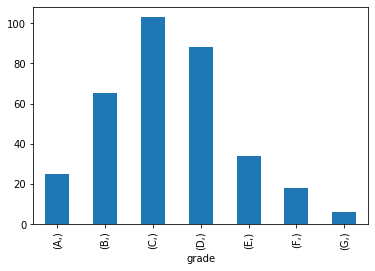

********************
vacation
Charged Off


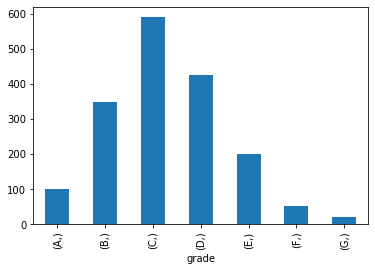

Current


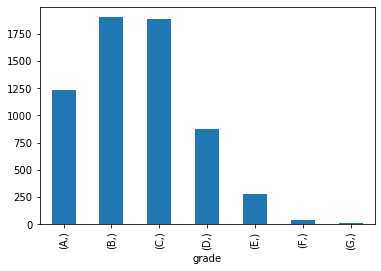

Default


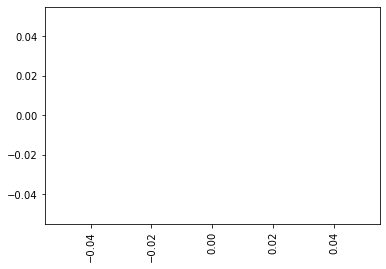

Does not meet the credit policy. Status:Charged Off


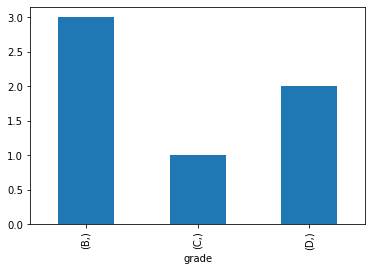

Does not meet the credit policy. Status:Fully Paid


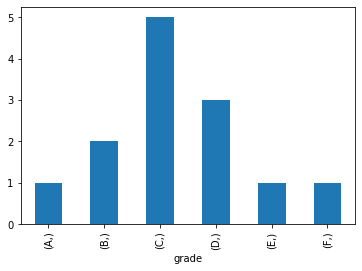

Fully Paid


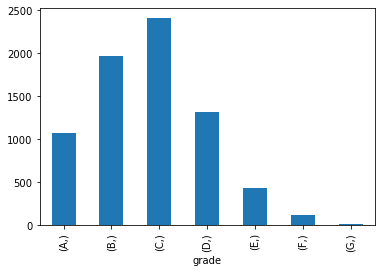

In Grace Period


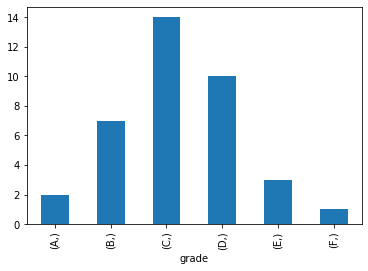

Late (16-30 days)


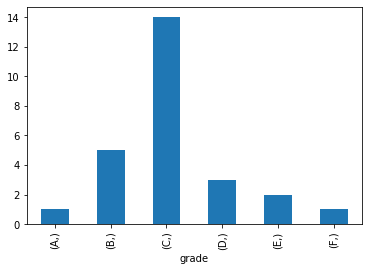

Late (31-120 days)


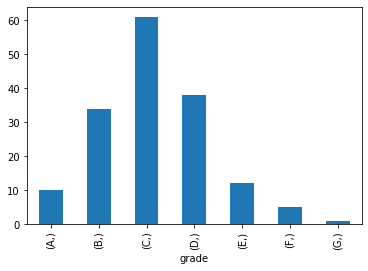

********************
wedding
Charged Off


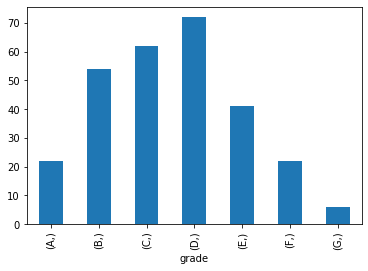

Current


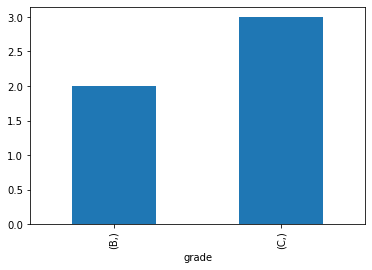

Default


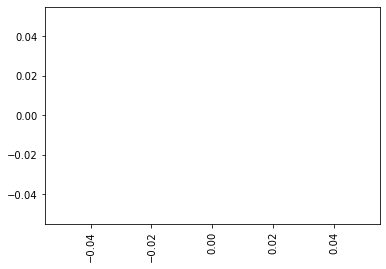

Does not meet the credit policy. Status:Charged Off


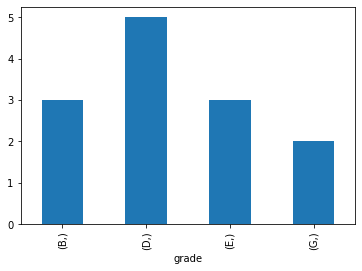

Does not meet the credit policy. Status:Fully Paid


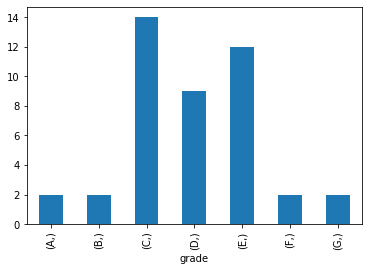

Fully Paid


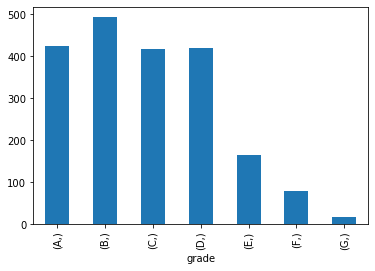

In Grace Period


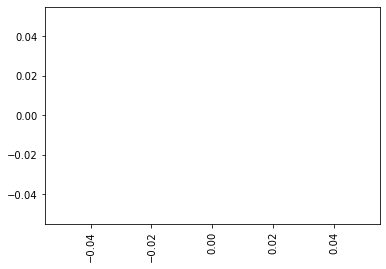

Late (16-30 days)


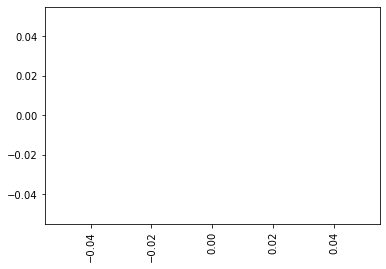

Late (31-120 days)


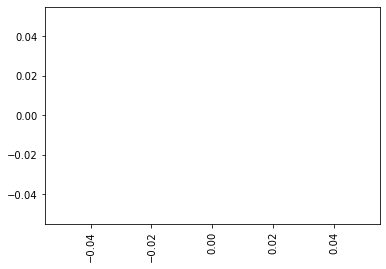

********************


In [37]:
acc_issueyear_list = sorted(list(acc['year'].unique()))
acc_purpose_list = sorted(list(acc['purpose'].unique()))
acc_status_list = sorted(list(acc['loan_status'].unique()))

for acc_purp in acc_purpose_list:
    print(acc_purp)
    for acc_status in acc_status_list:
        print(acc_status)
        plt.figure()
        try:
            acc[(acc['loan_status']==acc_status) &\
                (acc['purpose']==acc_purp)]\
            [['grade']].value_counts().sort_index().plot(kind='bar')
        except:
            pass
        plt.show()
    print('*'*20)

### Bullet 3

In [38]:
fundedamnt_median = acc['funded_amnt'].median()
fundedamnt_mean = acc['funded_amnt'].mean()

In [39]:
acc[acc['funded_amnt']>fundedamnt_median][['loan_status']]

loan_status
1         Fully Paid
2         Fully Paid
3            Current
6         Fully Paid
7         Fully Paid
...              ...
2260694      Current
2260695      Current
2260696      Current
2260697  Charged Off
2260698      Current

[1130110 rows x 1 columns]

<AxesSubplot:xlabel='loan_status'>

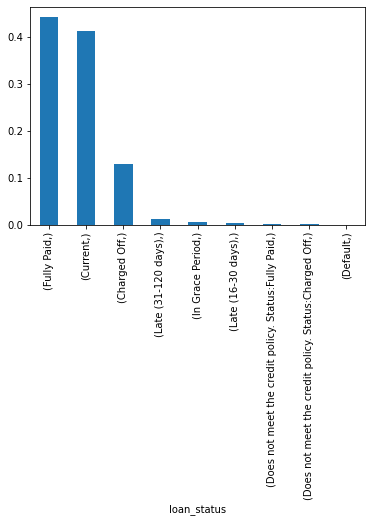

In [40]:
acc[acc['funded_amnt']>fundedamnt_median]\
[['loan_status']].value_counts(normalize=True).plot(kind='bar')

<AxesSubplot:xlabel='loan_status'>

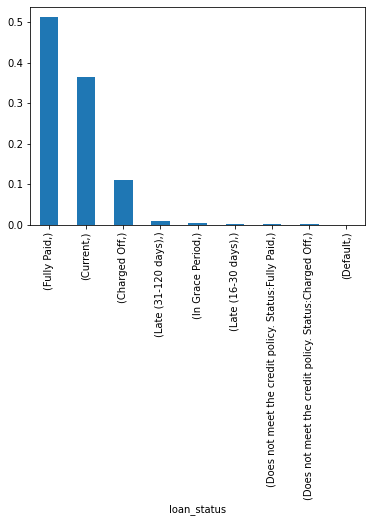

In [41]:
acc[acc['funded_amnt']<=fundedamnt_median]\
[['loan_status']].value_counts(normalize=True).plot(kind='bar')

# Question 3

## Bullet 1

In [42]:
acc['int_rate']

0          13.99
1          11.99
2          10.78
3          14.85
4          22.45
           ...  
2260694    12.79
2260695    10.49
2260696    10.49
2260697    14.49
2260698    14.49
Name: int_rate, Length: 2260668, dtype: float64

In [43]:
intrate_mean = acc['int_rate'].mean()
intrate_median = acc['int_rate'].median()

<AxesSubplot:xlabel='grade'>

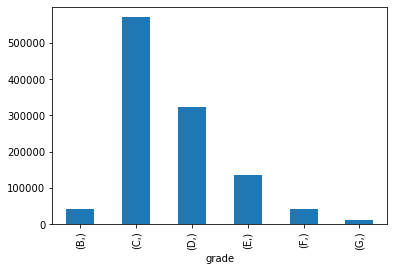

In [44]:
# we see no 'A' grades

acc[acc['int_rate']>intrate_median][['grade']].value_counts().sort_index().plot(kind='bar')

<AxesSubplot:xlabel='grade'>

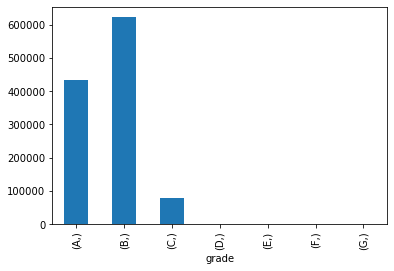

In [45]:
# we see nothing below 'C' grades

acc[acc['int_rate']<=intrate_median][['grade']].value_counts().sort_index().plot(kind='bar')

<AxesSubplot:xlabel='sub_grade'>

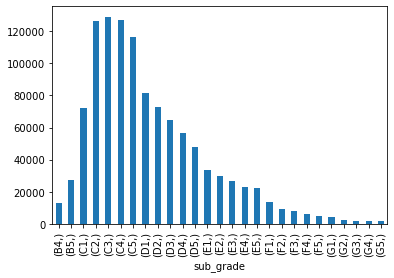

In [46]:
# we see no 'A' grades

acc[acc['int_rate']>intrate_median][['sub_grade']].value_counts().sort_index().plot(kind='bar')

<AxesSubplot:xlabel='sub_grade'>

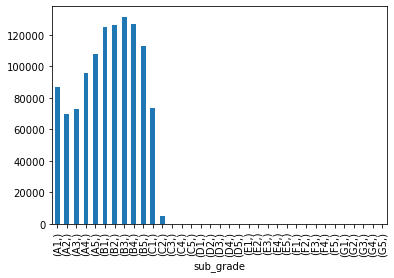

In [47]:
# we see nothing below 'C' grades

acc[acc['int_rate']<=intrate_median][['sub_grade']].value_counts().sort_index().plot(kind='bar')

<AxesSubplot:xlabel='term'>

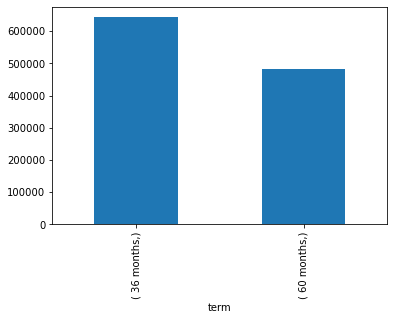

In [48]:
acc[acc['int_rate']>intrate_median][['term']].value_counts().sort_index().plot(kind='bar')

<AxesSubplot:xlabel='term'>

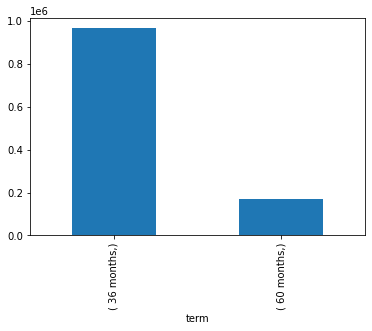

In [49]:
acc[acc['int_rate']<=intrate_median][['term']].value_counts().sort_index().plot(kind='bar')

## Bullet 2

# MUST CHANGE ORDER TO SORT CHRONOLOGICALLY

In [56]:
acc[(acc['int_rate']>intrate_median)][['int_rate', 'grade', 'issue_d']]

int_rate grade   issue_d
0           13.99     C  Dec-2015
3           14.85     C  Dec-2015
4           22.45     F  Dec-2015
5           13.44     C  Dec-2015
10          12.88     C  Dec-2015
...           ...   ...       ...
2260691     14.49     C  Oct-2016
2260692     12.79     C  Oct-2016
2260694     12.79     C  Oct-2016
2260697     14.49     C  Oct-2016
2260698     14.49     C  Oct-2016

[1125642 rows x 3 columns]

<AxesSubplot:xlabel='year'>

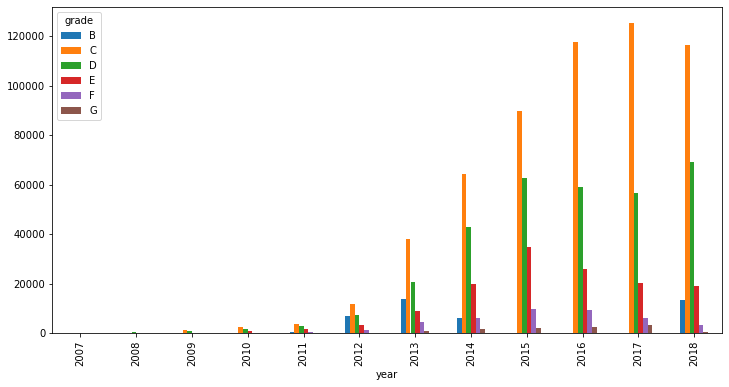

In [82]:
# # we see no 'A' grades

list_issue_d = sorted(list(acc['year'].unique()))
acc_intrate = acc[['int_rate', 'grade', 'year']]

acc_intrate[(acc_intrate['int_rate']>intrate_median)].groupby('year')\
        ['grade'].value_counts().unstack('grade').sort_index().plot(kind='bar', figsize=(12, 6))

# Question 4

## Bullet 1

In [52]:
acc['loan_status'].unique()

array(['Fully Paid', 'Current', 'Charged Off', 'In Grace Period',
       'Late (31-120 days)', 'Late (16-30 days)', 'Default',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

<AxesSubplot:xlabel='loan_status,term'>

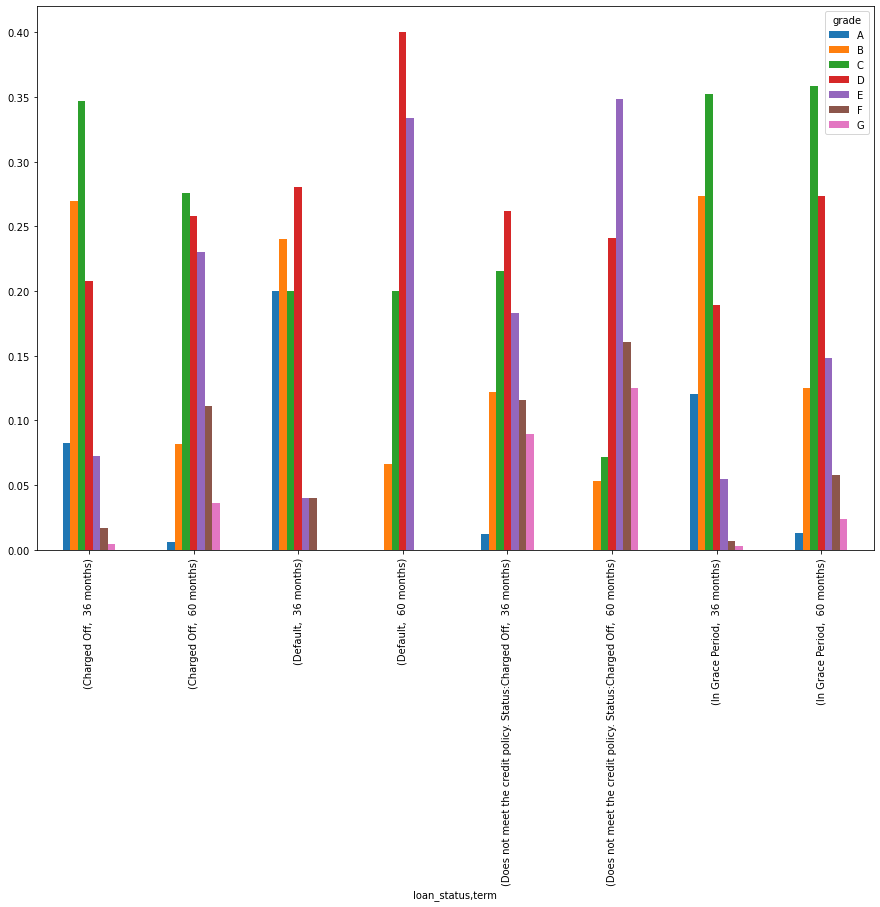

In [53]:
# drop loan status with 'Fully Paid'
acc_list_notfullypaid = list(acc[acc['loan_status'].str.contains('Fully Paid|Current|Late', na=False)].index)
acc_notfullypaid = acc.drop(acc_list_notfullypaid)
acc_sub_notfullypaid = acc_notfullypaid[['int_rate', 'grade', 'sub_grade', 'loan_status', 'term']]

# drop loan status not fully paid or current
acc_list_fullypaid = list(acc[~acc['loan_status'].str.contains('Fully Paid|Current|Late', na=False)].index)
acc_fullypaid = acc.drop(acc_list_fullypaid)
acc_sub_fullypaid = acc_fullypaid[['int_rate', 'grade', 'sub_grade', 'loan_status', 'term']]

acc_sub_notfullypaid.groupby(['loan_status', 'term'])\
['grade'].value_counts(normalize=True).unstack('grade').sort_index().plot(kind='bar', figsize =(15, 10))

<AxesSubplot:xlabel='loan_status'>

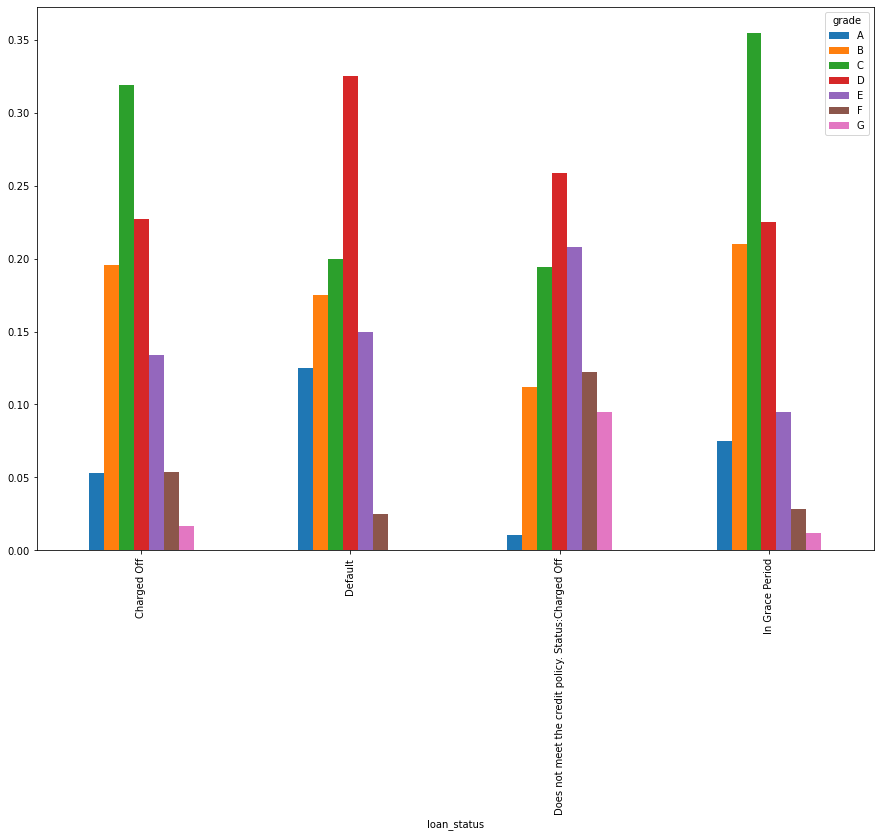

In [54]:
acc_sub_notfullypaid.groupby(['loan_status'])\
['grade'].value_counts(normalize=True).unstack('grade').sort_index().plot(kind='bar', figsize =(15, 10))

## Bullet 2

In [55]:
acc_sub_fullypaid.groupby(['loan_status'])['grade'].value_counts(normalize=True)

loan_status                                         grade
Current                                             B        0.299326
                                                    C        0.291133
                                                    A        0.222629
                                                    D        0.131089
                                                    E        0.043356
                                                    F        0.009661
                                                    G        0.002807
Does not meet the credit policy. Status:Fully Paid  D        0.248491
                                                    C        0.241952
                                                    E        0.190141
                                                    B        0.135312
                                                    F        0.077465
                                                    G        0.061368
                                

<AxesSubplot:xlabel='loan_status,term'>

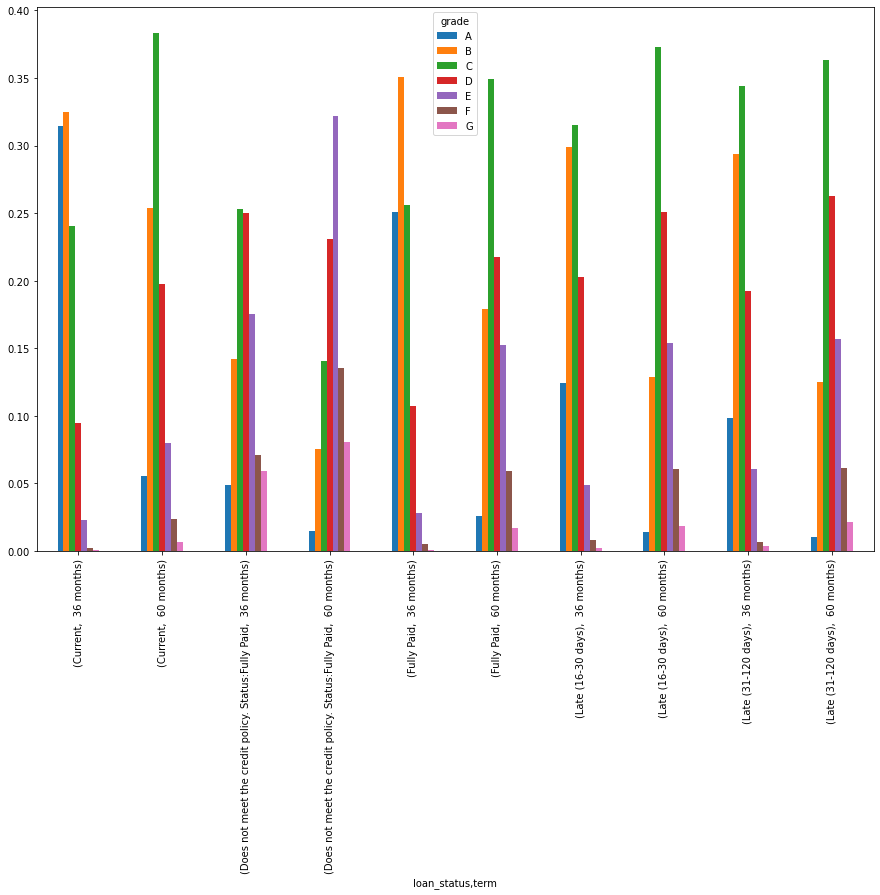

In [56]:
acc_sub_fullypaid.groupby(['loan_status', 'term'])\
['grade'].value_counts(normalize=True).unstack('grade').sort_index().plot(kind='bar', figsize=(15,10))

<AxesSubplot:xlabel='loan_status'>

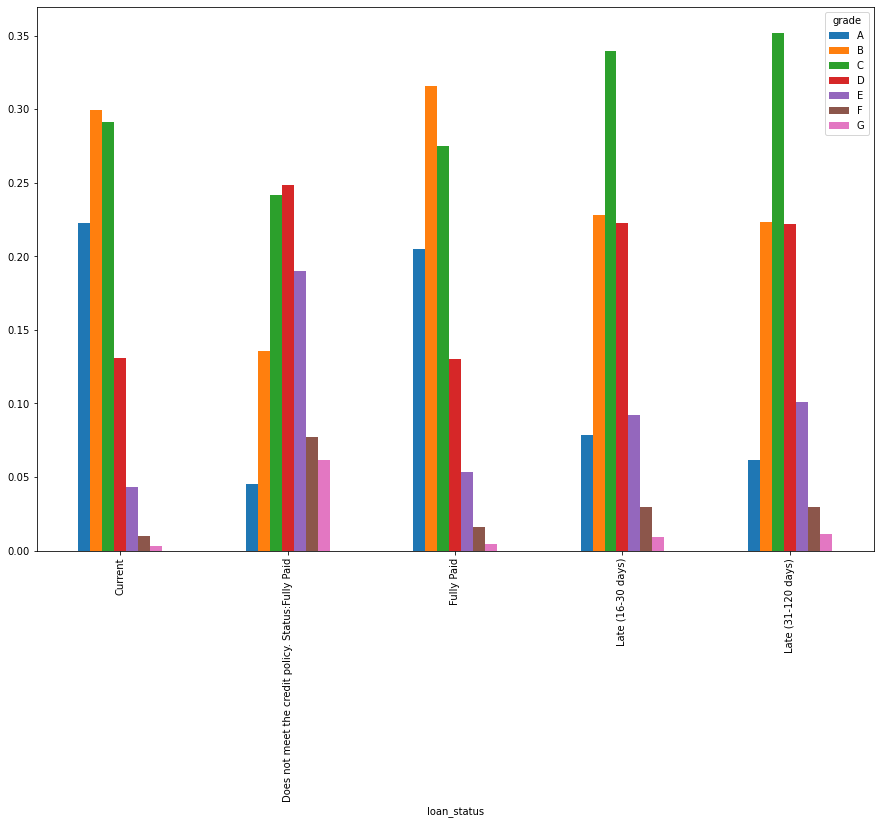

In [57]:
acc_sub_fullypaid.groupby(['loan_status'])\
['grade'].value_counts(normalize=True).unstack('grade').sort_index().plot(kind='bar', figsize=(15,10))

## Bullet 3

In [58]:
acc_ratehike = acc[['int_rate', 'grade', 'sub_grade', 'loan_status', 'term']]

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(1, 0, '(A,  36 months)'),
  Text(2, 0, '(A,  60 months)'),
  Text(3, 0, '(B,  36 months)'),
  Text(4, 0, '(B,  60 months)'),
  Text(5, 0, '(C,  36 months)'),
  Text(6, 0, '(C,  60 months)'),
  Text(7, 0, '(D,  36 months)'),
  Text(8, 0, '(D,  60 months)'),
  Text(9, 0, '(E,  36 months)'),
  Text(10, 0, '(E,  60 months)'),
  Text(11, 0, '(F,  36 months)'),
  Text(12, 0, '(F,  60 months)'),
  Text(13, 0, '(G,  36 months)'),
  Text(14, 0, '(G,  60 months)')])

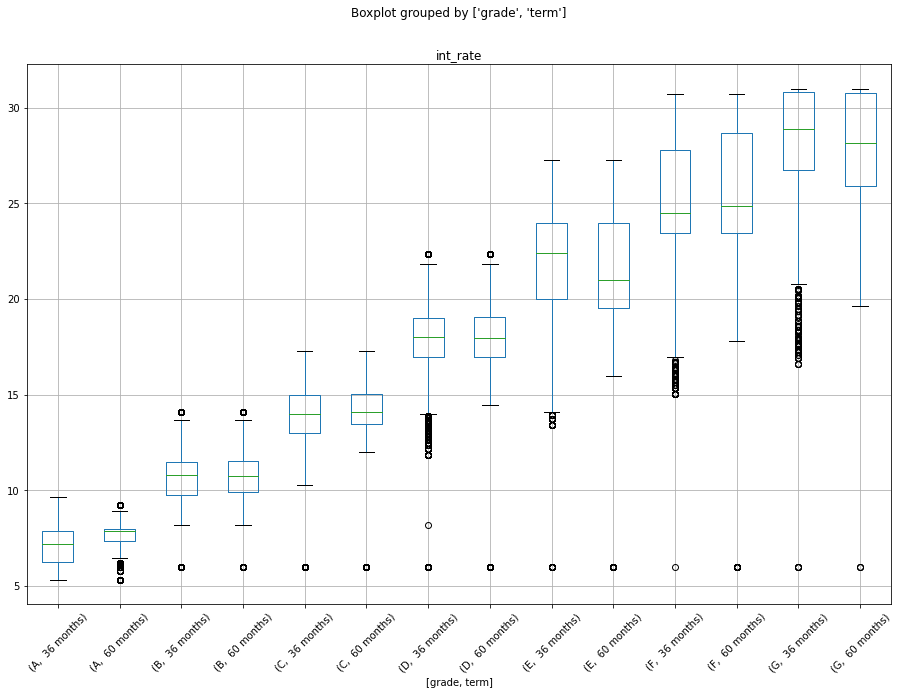

In [59]:
acc_ratehike = acc[['int_rate', 'grade', 'sub_grade', 'loan_status', 'term']]

acc_ratehike.boxplot(by=['grade', 'term'], column='int_rate', figsize=(15, 10))
plt.xticks(rotation=45)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
        52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
        69, 70]),
 [Text(1, 0, '(A1,  36 months)'),
  Text(2, 0, '(A1,  60 months)'),
  Text(3, 0, '(A2,  36 months)'),
  Text(4, 0, '(A2,  60 months)'),
  Text(5, 0, '(A3,  36 months)'),
  Text(6, 0, '(A3,  60 months)'),
  Text(7, 0, '(A4,  36 months)'),
  Text(8, 0, '(A4,  60 months)'),
  Text(9, 0, '(A5,  36 months)'),
  Text(10, 0, '(A5,  60 months)'),
  Text(11, 0, '(B1,  36 months)'),
  Text(12, 0, '(B1,  60 months)'),
  Text(13, 0, '(B2,  36 months)'),
  Text(14, 0, '(B2,  60 months)'),
  Text(15, 0, '(B3,  36 months)'),
  Text(16, 0, '(B3,  60 months)'),
  Text(17, 0, '(B4,  36 months)'),
  Text(18, 0, '(B4,  60 months)'),
  Text(19, 0, '(B5,  36 months)'),
  Text(20, 0, '(B5,  6

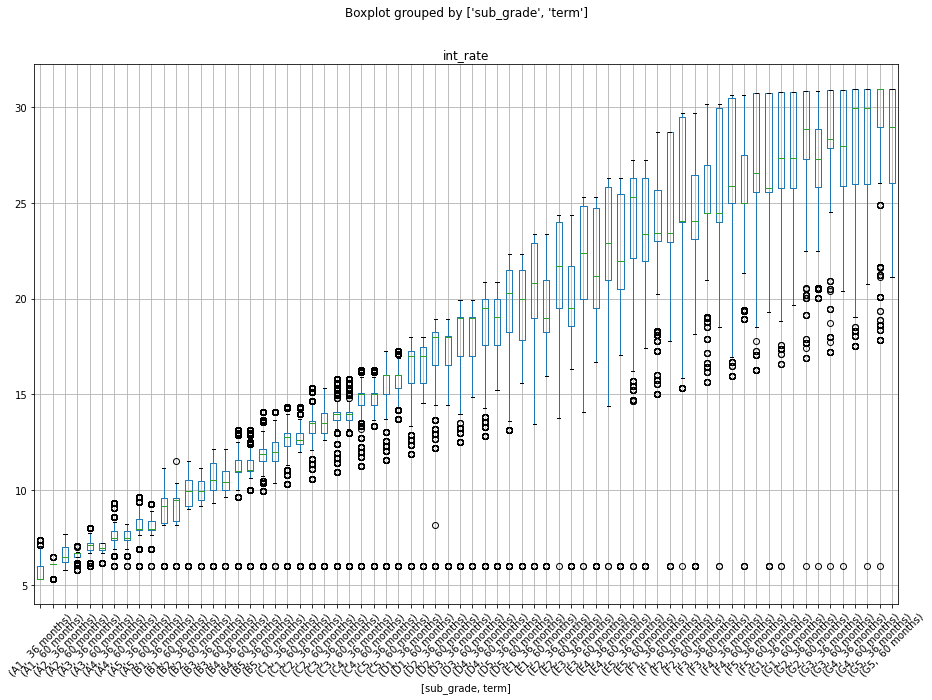

In [60]:
acc_ratehike.boxplot(by=['sub_grade', 'term'], column='int_rate', figsize=(15, 10))
plt.xticks(rotation=45)

(array([1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(1, 0, '(Charged Off,  36 months)'),
  Text(2, 0, '(Charged Off,  60 months)'),
  Text(3, 0, '(Default,  36 months)'),
  Text(4, 0, '(Default,  60 months)'),
  Text(5, 0, '(Does not meet the credit policy. Status:Charged Off,  36 months)'),
  Text(6, 0, '(Does not meet the credit policy. Status:Charged Off,  60 months)'),
  Text(7, 0, '(In Grace Period,  36 months)'),
  Text(8, 0, '(In Grace Period,  60 months)')])

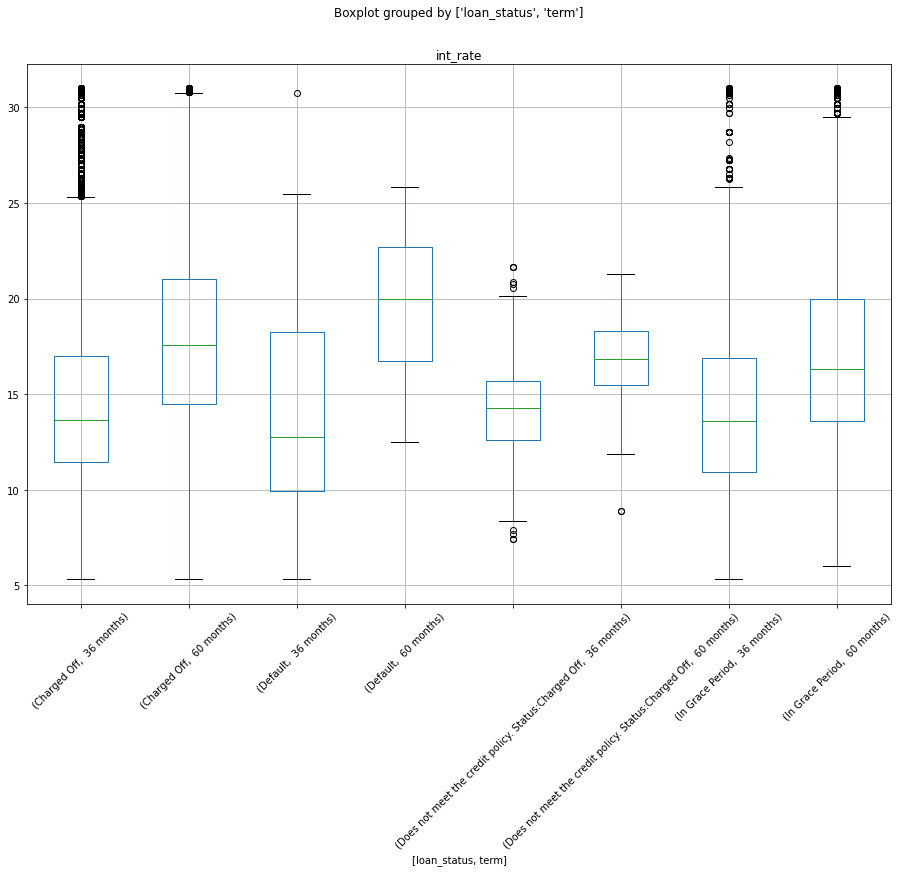

In [61]:
# acc_list_notfullypaid = list(acc[acc['loan_status'].str.contains('Fully Paid|Current|Late', na=False)].index)
# acc_notfullypaid = acc.drop(acc_list_notfullypaid)
# acc_sub_notfullypaid = acc_notfullypaid[['int_rate', 'grade', 'sub_grade', 'loan_status', 'term']]

acc_sub_notfullypaid.boxplot(by=['loan_status', 'term'], column='int_rate', figsize=(15,10))
plt.xticks(rotation=45)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(1, 0, '(Current,  36 months)'),
  Text(2, 0, '(Current,  60 months)'),
  Text(3, 0, '(Does not meet the credit policy. Status:Fully Paid,  36 months)'),
  Text(4, 0, '(Does not meet the credit policy. Status:Fully Paid,  60 months)'),
  Text(5, 0, '(Fully Paid,  36 months)'),
  Text(6, 0, '(Fully Paid,  60 months)'),
  Text(7, 0, '(Late (16-30 days),  36 months)'),
  Text(8, 0, '(Late (16-30 days),  60 months)'),
  Text(9, 0, '(Late (31-120 days),  36 months)'),
  Text(10, 0, '(Late (31-120 days),  60 months)')])

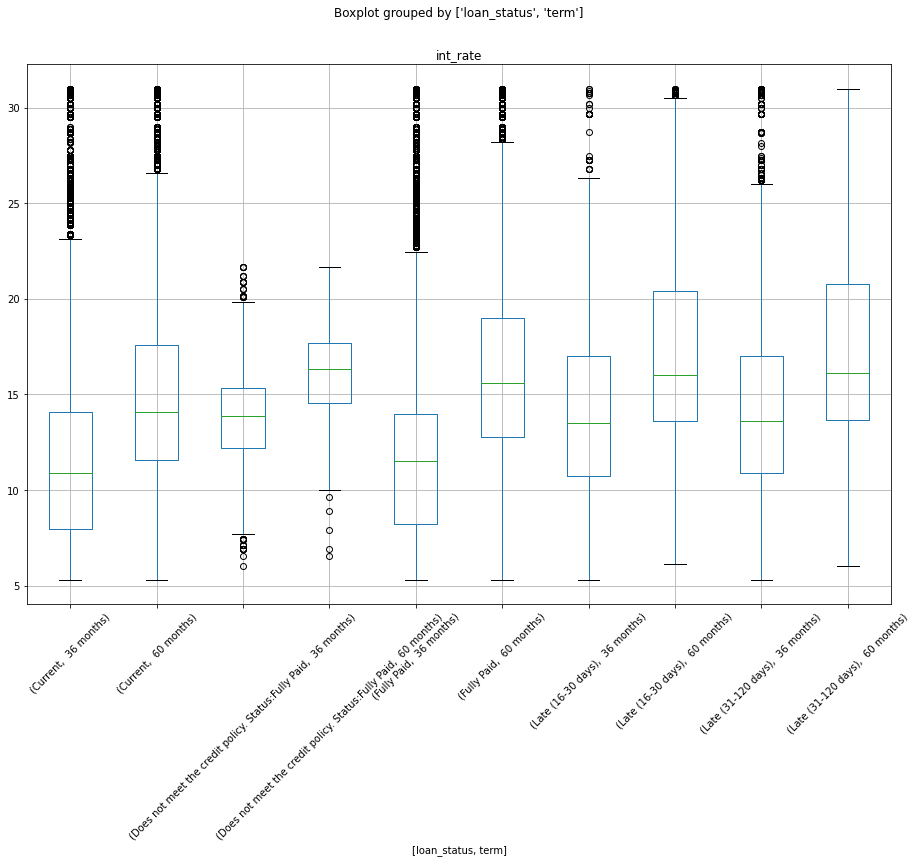

In [62]:
acc_sub_fullypaid.boxplot(by=['loan_status', 'term'], column='int_rate', figsize=(15,10))
plt.xticks(rotation=45)

In [63]:
acc_sub_interest = acc[['funded_amnt', 'last_pymnt_amnt', 'installment', 'term', 'total_pymnt',
                        'out_prncp', 'total_rec_int', 'int_rate', 'sub_grade', 'grade']]

acc_sub_interest['pos_profit'] = acc_sub_interest['total_pymnt'] - acc_sub_interest['funded_amnt']
acc_sub_interest.pos_profit = np.where(acc_sub_interest.pos_profit<0, 0, acc_sub_interest.pos_profit)

acc_sub_interest

<ipython-input-63-923a4eac34d7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  acc_sub_interest['pos_profit'] = acc_sub_interest['total_pymnt'] - acc_sub_interest['funded_amnt']
C:\Users\tdcho\anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


funded_amnt  last_pymnt_amnt  installment        term   total_pymnt  \
0             3600.0           122.67       123.03   36 months   4421.723917   
1            24700.0           926.35       820.28   36 months  25679.660000   
2            20000.0         15813.30       432.66   60 months  22705.924294   
3            35000.0           829.90       829.90   60 months  31464.010000   
4            10400.0         10128.96       289.91   60 months  11740.500000   
...              ...              ...          ...         ...           ...   
2260694      24000.0           543.50       543.50   60 months  15760.500000   
2260695      24000.0           515.74       515.74   60 months  15008.530000   
2260696      40000.0           859.56       859.56   60 months  24903.930000   
2260697      24000.0           564.56       564.56   60 months   6755.400000   
2260698      14000.0           329.33       329.33   60 months   9621.250000   

         out_prncp  total_rec_int  int_rate sub_grade grade   pos_profit  
0             0.00         821.72     13.99        C4     C   821.723917  
1             0.00         979.66     11.99        C1     C   979.660000  
2             0.00        2705.92     10.78        B4     B  2705.924294  
3         15897.65       12361.66     14.85        C5     C     0.000000  
4             0.00        1340.50     22.45        F1     F  1340.500000  
...            ...            ...       ...       ...   ...          ...  
2260694   14287.39        6047.89     12.79        C1     C     0.000000  
2260695   13951.42        4959.95     10.49        B3     B     0.000000  
2260696   23252.59        8156.52     10.49        B3     B     0.000000  
2260697       0.00        3233.49     14.49        C4     C     0.000000  
2260698    8456.12        4027.96     14.49        C4     C     0.000000  

[2260668 rows x 11 columns]

### Answer below

<AxesSubplot:xlabel='term'>

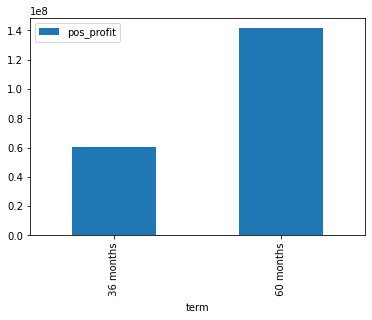

In [64]:
'''
by the even distribution, we can see that despite the higher likelihood of lower grades not paying in full,
the lender is able to recoup as much overall (because of the higher interest rate)
'''

acc_sub_interest[acc_sub_interest['out_prncp']>0].groupby(['term'])[['pos_profit']].sum().plot(kind='bar')

<AxesSubplot:xlabel='grade'>

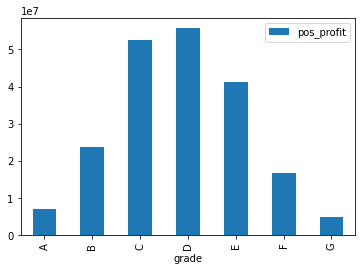

In [65]:
acc_sub_interest[acc_sub_interest['out_prncp']>0].groupby(['grade'])[['pos_profit']].sum().plot(kind='bar')

<AxesSubplot:xlabel='grade'>

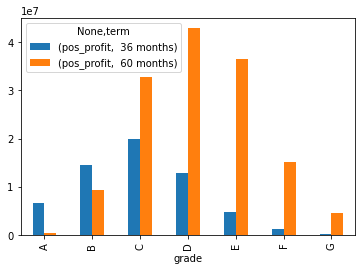

In [66]:
# we see that there is more profit for loans that cover 60 months even when there is an outstanding balance on the loan

acc_sub_interest[acc_sub_interest['out_prncp']>0].groupby(['term', 'grade'])\
[['pos_profit']].sum().unstack('term').plot(kind='bar')

<AxesSubplot:xlabel='term'>

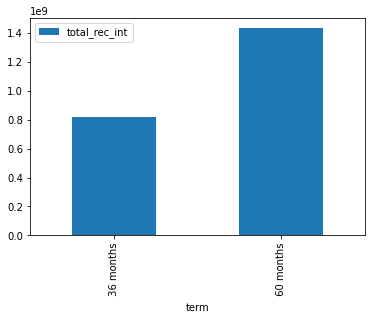

In [67]:
# here, we see a breakdown of specifically the total received interest based on grade

acc_sub_interest[acc_sub_interest['out_prncp']>0].groupby('term')[['total_rec_int']].sum().plot(kind='bar')

<AxesSubplot:xlabel='grade'>

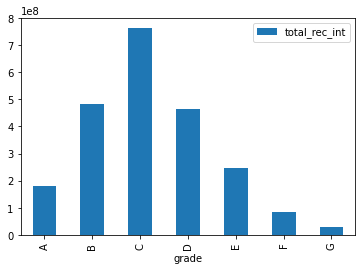

In [68]:
acc_sub_interest[acc_sub_interest['out_prncp']>0].groupby('grade')[['total_rec_int']].sum().plot(kind='bar')

<AxesSubplot:xlabel='grade'>

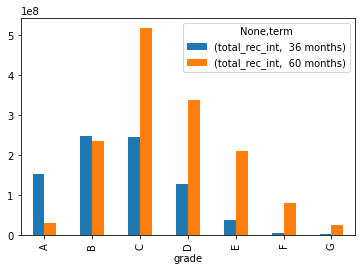

In [69]:
acc_sub_interest[acc_sub_interest['out_prncp']>0].groupby(['grade', 'term'])\
[['total_rec_int']].sum().unstack('term').plot(kind='bar')

## Bullet 4

In [70]:
acc[acc['settlement_percentage'].notnull()][['funded_amnt', 'out_prncp', 'total_pymnt',
                                             'settlement_amount', 'settlement_percentage',
                                             'settlement_status']]

funded_amnt  out_prncp  total_pymnt  settlement_amount  \
68           20000.0        0.0     15473.02            9915.00   
99            7200.0        0.0      3767.42            2761.00   
105          17475.0        0.0     15789.65            4382.00   
143          20000.0        0.0     17622.83            3513.00   
144          35000.0        0.0     25266.06           13403.00   
...              ...        ...          ...                ...   
2260500      36000.0        0.0     17943.70           11531.00   
2260552       7200.0        0.0      4858.99            2203.54   
2260567      16000.0        0.0     12972.13            6657.00   
2260578      19200.0        0.0     11312.36            6487.00   
2260697      24000.0        0.0      6755.40           10000.00   

         settlement_percentage settlement_status  
68                       55.00          COMPLETE  
99                       50.01            BROKEN  
105                      44.99          COMPLETE  
143                      45.01            ACTIVE  
144                      45.00          COMPLETE  
...                        ...               ...  
2260500                  45.00            ACTIVE  
2260552                  40.00          COMPLETE  
2260567                  50.00          COMPLETE  
2260578                  45.00            ACTIVE  
2260697                  44.82            ACTIVE  

[34246 rows x 6 columns]

In [71]:
acc['settlement_diff'] = acc['total_pymnt'] - acc['funded_amnt']

acc[acc['settlement_diff']<0]['grade'].value_counts().sort_index()

A    200833
B    297691
C    319636
D    160494
E     63814
F     19324
G      6271
Name: grade, dtype: int64

<AxesSubplot:xlabel='grade,grade'>

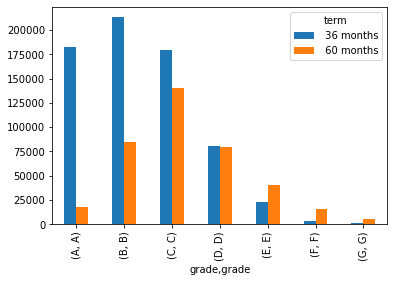

In [72]:
# we see more settlements for grades A, B, C for 36 month terms

acc[acc['settlement_diff']<0].groupby(['grade', 'term'])\
['grade'].value_counts().unstack('term').sort_index().plot(kind='bar')

# Question 5

In [73]:
acc['term'] = acc['term'].map(lambda x: x.rstrip(' months')).astype('int')
acc['term'] 

0          36
1          36
2          60
3          60
4          60
           ..
2260694    60
2260695    60
2260696    60
2260697    60
2260698    60
Name: term, Length: 2260668, dtype: int32

In [74]:
acc['actual_duration'] = (pd.DatetimeIndex(acc['last_pymnt_d']).year - pd.DatetimeIndex(acc['issue_d']).year)*12 +\
(pd.DatetimeIndex(acc['last_pymnt_d']).month - pd.DatetimeIndex(acc['issue_d']).month)

acc['duration_<_term'] = acc['term'] - acc['actual_duration']
acc['duration_<_term_simple'] = acc['duration_<_term']
acc.loc[acc['duration_<_term_simple']>0, 'duration_<_term_simple']=1
acc.loc[acc['duration_<_term_simple']<=0, 'duration_<_term_simple']=0

In [75]:
acc['loan_status'].unique()

array(['Fully Paid', 'Current', 'Charged Off', 'In Grace Period',
       'Late (31-120 days)', 'Late (16-30 days)', 'Default',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [76]:
acc_list_onlyfullypaid = list(acc[~acc['loan_status'].str.contains('Fully Paid', na=False)].index)
acc_list_onlynonfullypaid = list(acc[acc['loan_status'].str.contains('Fully Paid', na=False)].index)

acc_onlyfullypaid = acc.drop(acc_list_onlyfullypaid)
acc_onlynonfullypaid = acc.drop(acc_list_onlynonfullypaid)

acc_sub_onlyfullypaid = acc_onlyfullypaid[['duration_<_term_simple', 'grade', 'sub_grade', 'term']]
acc_sub_onlynonfullypaid = acc_onlynonfullypaid[['duration_<_term_simple', 'grade', 'sub_grade', 'term']]

In [77]:
acc_onlyfullypaid

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  term  \
0        68407277        NaN     3600.0       3600.0           3600.0    36   
1        68355089        NaN    24700.0      24700.0          24700.0    36   
2        68341763        NaN    20000.0      20000.0          20000.0    60   
4        68476807        NaN    10400.0      10400.0          10400.0    60   
5        68426831        NaN    11950.0      11950.0          11950.0    36   
...           ...        ...        ...          ...              ...   ...   
2260684  89846605        NaN    15000.0      15000.0          15000.0    36   
2260686  89867167        NaN    23800.0      23800.0          23800.0    60   
2260688  89905081        NaN    18000.0      18000.0          18000.0    60   
2260690  88948836        NaN    29400.0      29400.0          29400.0    60   
2260692  90006534        NaN    16000.0      16000.0          16000.0    60   

         int_rate  installment grade sub_grade                emp_title  \
0           13.99       123.03     C        C4                  leadman   
1           11.99       820.28     C        C1                 Engineer   
2           10.78       432.66     B        B4             truck driver   
4           22.45       289.91     F        F1      Contract Specialist   
5           13.44       405.18     C        C3     Veterinary Tecnician   
...           ...          ...   ...       ...                      ...   
2260684     10.49       487.47     B        B3            Billing clerk   
2260686     14.49       559.85     C        C4  Exec Dir Internal Audit   
2260688      9.49       377.95     B        B2                      NaN   
2260690     13.99       683.94     C        C3  Chief Operating Officer   
2260692     12.79       362.34     C        C1                  Manager   

        emp_length home_ownership  annual_inc verification_status   issue_d  \
0        10+ years       MORTGAGE     55000.0        Not Verified  Dec-2015   
1        10+ years       MORTGAGE     65000.0        Not Verified  Dec-2015   
2        10+ years       MORTGAGE     63000.0        Not Verified  Dec-2015   
4          3 years       MORTGAGE    104433.0     Source Verified  Dec-2015   
5          4 years           RENT     34000.0     Source Verified  Dec-2015   
...            ...            ...         ...                 ...       ...   
2260684    8 years       MORTGAGE     60000.0        Not Verified  Oct-2016   
2260686  10+ years       MORTGAGE    119000.0        Not Verified  Oct-2016   
2260688    5 years            OWN    130000.0        Not Verified  Oct-2016   
2260690    9 years       MORTGAGE    180792.0        Not Verified  Oct-2016   
2260692  10+ years           RENT    150000.0        Not Verified  Oct-2016   

        loan_status pymnt_plan  \
0        Fully Paid          n   
1        Fully Paid          n   
2        Fully Paid          n   
4        Fully Paid          n   
5        Fully Paid          n   
...             ...        ...   
2260684  Fully Paid          n   
2260686  Fully Paid          n   
2260688  Fully Paid          n   
2260690  Fully Paid          n   
2260692  Fully Paid          n   

                                                       url desc  \
0        https://lendingclub.com/browse/loanDetail.acti...  NaN   
1        https://lendingclub.com/browse/loanDetail.acti...  NaN   
2        https://lendingclub.com/browse/loanDetail.acti...  NaN   
4        https://lendingclub.com/browse/loanDetail.acti...  NaN   
5        https://lendingclub.com/browse/loanDetail.acti...  NaN   
...                                                    ...  ...   
2260684  https://lendingclub.com/browse/loanDetail.acti...  NaN   
2260686  https://lendingclub.com/browse/loanDetail.acti...  NaN   
2260688  https://lendingclub.com/browse/loanDetail.acti...  NaN   
2260690  https://lendingclub.com/browse/loanDetail.acti...  NaN   
2260692  https://lendingclub.com/browse/loanDetail.acti...  NaN   

  

In [78]:
acc_sub_onlyfullypaid[['duration_<_term_simple', 'grade']]

duration_<_term_simple grade
0                           0.0     C
1                           1.0     C
2                           1.0     B
4                           1.0     F
5                           1.0     C
...                         ...   ...
2260684                     1.0     B
2260686                     1.0     C
2260688                     1.0     B
2260690                     1.0     C
2260692                     1.0     C

[1078739 rows x 2 columns]

<AxesSubplot:xlabel='term,duration_<_term_simple'>

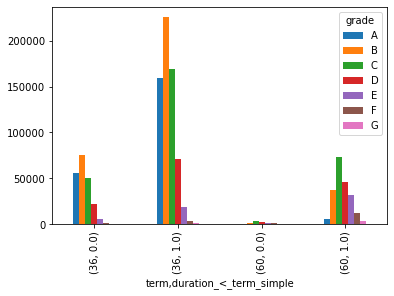

In [79]:
acc_sub_onlyfullypaid[['duration_<_term_simple', 'grade', 'term']].groupby(['grade', 'term'])\
['duration_<_term_simple'].value_counts().unstack('grade').plot(kind='bar')

# Question 6

## Bullet 1

In [83]:
acc['profitability'] = (acc['total_pymnt'] - acc['principal'])/(acc['principal'])
acc['profitability']

KeyError: 'principal'

## Because of the error above, we will investigate those columns

In [ ]:
acc_mixedtype = acc_w_totals.iloc[:,[0,19,49,59,118,129,130,131,134,135,136,139,145,146,147]]
acc_mixedtype

In [ ]:
# we see that there are rows with totals
acc_mixedtype.iloc[:,0]

In [ ]:
# we will remove those rows
rows_to_drop_id = list(acc_w_totals[acc_w_totals['id'].str.contains('Total|Loans', na=False)].index)
print('We will be dropping', len(rows_to_drop_id), 'rows')
print('\n')

acc_drop_rows_id = acc_w_totals.drop(rows_to_drop_id)
acc_drop_rows_id

In [ ]:
# looking at the mixed dtype columns after dropping the rows for totals
acc_mix_drop = acc_drop_rows_id.iloc[:,[0,19,49,59,118,129,130,131,134,135,136,139,145,146,147]]
acc_mix_drop.columns

In [7]:
# checking to see if there are any other string types in the column by converting to numeric
acc_id_numeric = pd.to_numeric(acc_mix_drop['id'])

# check for duplicate id numbers
acc_id_numeric.duplicated().sum()

0

In [9]:
# checking to see what the descriptions look like

num_rows = acc_mix_drop['id'].count()

for col_title in acc_mix_drop.columns:
    
    print('For '+col_title+':')
    print('\n')
    
    print('The non-null count is:')
    print(np.sum(acc_mix_drop[col_title].notnull()))
    print('\n')
    
    print('The non-null is:')
    print((np.sum(acc_mix_drop[col_title].notnull())/num_rows))
    print('\n')
    
    print('The unique values are:')
    print(acc_mix_drop[col_title].unique())
    print('\n')
    
    print('*'*10)
    print('\n')

The non-null count is:
2260668


The non-null ratio is:
1.0


The unique values for id are:
[68407277 68355089 68341763 ... '88985880' '88224441' '88215728']


**********


The non-null count is:
126067


The non-null ratio is:
0.0557653755438658


The unique values for desc are:
[nan
 'We knew that using our credit cards to finance an adoption would squeeze us, but then medical and other unexpected expenses made the situation almost impossible. We are a stable family in a stable community. We just need to break a cycle of debt that is getting worse.'
 "I had a bad year two years ago, with some late and missed payments. I'm doing much better now, but I've got fees and some higher interest bits that have added up on top of the other stuff, and it's a little crazy. I'm hoping doing it thru Lending Club will make it easier - and cheaper - to pay off."
 ...
 'This loan will be used solely to consolidate credit card debts accrued while wife was/is unemployed.'
 'I have recently purchased an

0.004829103610083391


The unique values for hardship_type are:
[nan 'INTEREST ONLY-3 MONTHS DEFERRAL']


**********


The non-null count is:
10917


The non-null ratio is:
0.004829103610083391


The unique values for hardship_reason are:
[nan 'NATURAL_DISASTER' 'DIVORCE' 'EXCESSIVE_OBLIGATIONS' 'DISABILITY'
 'UNEMPLOYMENT' 'INCOME_CURTAILMENT' 'REDUCED_HOURS' 'MEDICAL'
 'FAMILY_DEATH']


**********


The non-null count is:
10917


The non-null ratio is:
0.004829103610083391


The unique values for hardship_status are:
[nan 'BROKEN' 'COMPLETED' 'ACTIVE']


**********


The non-null count is:
10917


The non-null ratio is:
0.004829103610083391


The unique values for hardship_start_date are:
[nan 'Sep-2017' 'Jul-2017' 'Sep-2018' 'Dec-2017' 'Aug-2017' 'Mar-2019'
 'May-2017' 'Nov-2017' 'Jun-2017' 'Jul-2018' 'Oct-2017' 'Apr-2018'
 'Nov-2018' 'Aug-2018' 'Oct-2018' 'Mar-2017' 'Feb-2018' 'Jun-2018'
 'Feb-2019' 'Jan-2018' 'Mar-2018' 'May-2018' 'Dec-2018' 'Feb-2017'
 'Jan-2019' 'Apr-2017' 'Jan-

In [9]:
# starting list of columns to drop
cols_to_drop = ['id', 'desc', 'next_pymnt_d']

In [13]:
# changing nans to 'Not Verified'
acc_drop_rows_id.verification_status_joint =\
acc_drop_rows_id.verification_status_joint.fillna('Not Verified')

# changing nans to 'Not Recorded'
acc_drop_rows_id.hardship_type = acc_drop_rows_id.hardship_type.fillna('Not Recorded')

# changing nans to 'Not Recorded'
acc_drop_rows_id.hardship_reason = acc_drop_rows_id.hardship_reason.fillna('Not Recorded')

# changing nans to 'Not Recorded'
acc_drop_rows_id.hardship_status = acc_drop_rows_id.hardship_status.fillna('Not Recorded')

# extract month to separate column

- https://stackoverflow.com/questions/50663700/convert-year-and-month-name-into-datetime-column-for-pandas-dataframe

In [25]:
# checking if there are any missing values in the dates
acc_mix_drop[(acc_mix_drop['hardship_start_date'].notnull()) &\
             (acc_mix_drop['hardship_end_date'].isnull())][['hardship_start_date', 'hardship_end_date']]

Empty DataFrame
Columns: [hardship_start_date, hardship_end_date]
Index: []

In [26]:
# checking if there are any missing values in the dates
acc_mix_drop[(acc_mix_drop['hardship_start_date'].isnull()) &\
             (acc_mix_drop['hardship_end_date'].notnull())][['hardship_start_date', 'hardship_end_date']]

Empty DataFrame
Columns: [hardship_start_date, hardship_end_date]
Index: []

# WHY IS THE NAN NOT REGISTERING AS NULL?

- https://stackoverflow.com/questions/52943741/convert-string-nan-to-numpy-nan-in-pandas-dataframe-that-contains-strings?noredirect=1&lq=1

In [27]:
# acc_mix_drop['hardship_end_date'] =\
# pd.to_datetime(acc_mix_drop['hardship_end_date'])

acc_mix_drop['hardship_start_date'] =\
pd.to_datetime(acc_mix_drop['hardship_start_date'], format='%b-%Y', errors='ignore')

acc_mix_drop['hardship_end_date'] =\
pd.to_datetime(acc_mix_drop['hardship_end_date'], format='%b-%Y', errors='ignore')

# calculating actual hardship duration to compare to hardship length
acc_mix_drop['hardship_duration'] = \
(round(((acc_mix_drop['hardship_end_date'] - acc_mix_drop['hardship_start_date']).dt.days)/10)*10)/30

acc_drop_rows_id

<ipython-input-27-5f2bd5c75e34>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  acc_mix_drop['hardship_start_date'] =\
<ipython-input-27-5f2bd5c75e34>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  acc_mix_drop['hardship_end_date'] =\
<ipython-input-27-5f2bd5c75e34>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_g

In [30]:
acc_mix_drop.iloc[acc_mix_drop[acc_mix_drop['hardship_start_date'].notnull()].index, :]

id desc next_pymnt_d verification_status_joint  \
118      68426668  NaN          NaN                       NaN   
136      68616867  NaN     Apr-2019                       NaN   
182      68466830  NaN          NaN                       NaN   
335      68386814  NaN          NaN                       NaN   
373      68072793  NaN     Apr-2019                       NaN   
...           ...  ...          ...                       ...   
2260071  90621550  NaN     Apr-2019                       NaN   
2260177  90318045  NaN     Apr-2019                       NaN   
2260404  90118255  NaN          NaN                       NaN   
2260457  90130178  NaN          NaN                       NaN   
2260683  88878506  NaN     Apr-2019                       NaN   

        sec_app_earliest_cr_line                    hardship_type  \
118                          NaN  INTEREST ONLY-3 MONTHS DEFERRAL   
136                          NaN  INTEREST ONLY-3 MONTHS DEFERRAL   
182                          NaN  INTEREST ONLY-3 MONTHS DEFERRAL   
335                          NaN  INTEREST ONLY-3 MONTHS DEFERRAL   
373                          NaN  INTEREST ONLY-3 MONTHS DEFERRAL   
...                          ...                              ...   
2260071                      NaN                              NaN   
2260177                      NaN                              NaN   
2260404                      NaN                              NaN   
2260457                      NaN                              NaN   
2260683                      NaN                              NaN   

          hardship_reason hardship_status hardship_start_date  \
118      NATURAL_DISASTER          BROKEN          2017-09-01   
136      NATURAL_DISASTER       COMPLETED          2017-09-01   
182      NATURAL_DISASTER       COMPLETED          2017-09-01   
335               DIVORCE       COMPLETED          2017-07-01   
373      NATURAL_DISASTER       COMPLETED          2018-09-01   
...                   ...             ...                 ...   
2260071               NaN             NaN                 NaT   
2260177               NaN             NaN                 NaT   
2260404               NaN             NaN                 NaT   
2260457               NaN             NaN                 NaT   
2260683               NaN             NaN                 NaT   

        hardship_end_date payment_plan_start_date hardship_loan_status  \
118            2017-12-01                Oct-2017    Late (16-30 days)   
136            2017-11-01                Sep-2017              Current   
182            2017-12-01                Sep-2017    Late (16-30 days)   
335            2017-10-01                Aug-2017    Late (16-30 days)   
373            2018-12-01                Sep-2018              Current   
...                   ...                     ...                  ...   
2260071               NaT                     NaN                  NaN   
2260177               NaT                     NaN                  NaN   
2260404               NaT                     NaN                  NaN   
2260457               NaT                     NaN                  NaN   
2260683               NaT                     NaN                  NaN   

        debt_settlement_flag_date settlement_status settlement_date  \
118                           NaN               NaN             NaN   
136                           NaN               NaN             NaN   
182                           NaN               NaN             NaN   
335                           NaN               NaN             NaN   
373                           NaN               NaN             NaN   
...                           ...               ...             ...   
2260071                       NaN               NaN             NaN   
2260177                       NaN               NaN             NaN   
2260404                       NaN               NaN             NaN   
2260457                  

In [37]:
acc_drop_rows_id.iloc[hsd_notnull,:]['hardship_length']

118        3.0
136        3.0
182        3.0
335        3.0
373        3.0
          ... 
2260071    NaN
2260177    NaN
2260404    NaN
2260457    NaN
2260683    NaN
Name: hardship_length, Length: 10917, dtype: float64

In [44]:
# checking hardship_status data
acc_mix_drop['payment_plan_start_date'].unique()



array([nan, 'Oct-2017', 'Sep-2017', 'Aug-2017', 'Sep-2018', 'Dec-2017',
       'Apr-2019', 'Jun-2017', 'Oct-2018', 'Nov-2017', 'Jul-2017',
       'Jul-2018', 'Jan-2018', 'Apr-2018', 'Nov-2018', 'Aug-2018',
       'Mar-2019', 'Mar-2017', 'Feb-2018', 'May-2017', 'Feb-2019',
       'Jun-2018', 'Dec-2018', 'Feb-2017', 'Jan-2019', 'Mar-2018',
       'May-2018', 'Apr-2017'], dtype=object)

In [29]:
# # subtract the 2 date columns to get duration
# acc_mix_drop['hardship_duration'] = \
# acc_mix_drop['hardship_end_date'] - acc_mix_drop['hardship_start_date']
# acc_mix_drop['hardship_duration']